In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [108]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.1
c_reg2=0.01

<tf.Variable 'Shape/Variable:0' shape=(10,) dtype=float64, numpy=
array([ 0.80702382,  2.27640504, -0.14694632,  1.48781524,  0.81484597,
        3.64011787,  1.86431813,  4.16184224,  5.26260074, 10.51104031])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


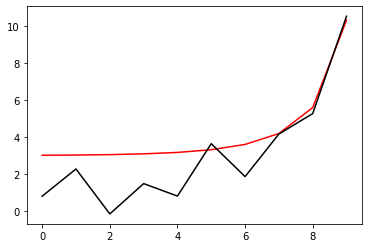

In [109]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [110]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

<tf.Variable 'Shape/Variable:0' shape=() dtype=float64, numpy=-0.642537429269171>


In [57]:
phi=tf.Variable(tf.zeros(1))
pi=tf.Variable(tf.zeros(1))

def F_func(m, a,b):
    return 2*b/n_fin-m*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [58]:
def LP2(hh, m, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh, m):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [59]:
for i in range (10):
    Positive[i]=NN_func_p(h_real, m2)
    Negative[i]=NN_func_n(h_real, m2)

In [111]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, Negative[i])

In [24]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (10):
    Positive0.insert(i, NN_func_01(h, m2_2, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2_2, Negative[i])[0])
    Negative0.insert(i, NN_func_01(h, m2_2, Positive[i])[1])
    Negative1.insert(i, NN_func_01(h, m2_2, Negative[i])[1])

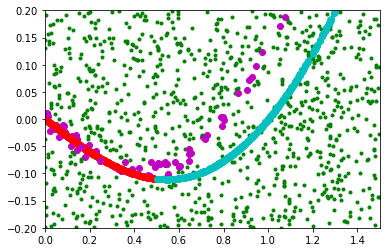

In [112]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (10):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [62]:
def Error_func(hh, m, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, m, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [63]:
for i in range (10):
    print(Error_func(h_real, m2, Positive[i], Negative[i]))
for i in range (10):
    print(Error_func(h, m2_2, Positive[i], Negative[i]))

tf.Tensor(1.3506230587878472, shape=(), dtype=float64)
tf.Tensor(4.998984686366347, shape=(), dtype=float64)
tf.Tensor(6.71367079117224, shape=(), dtype=float64)
tf.Tensor(3.125250227455065, shape=(), dtype=float64)
tf.Tensor(1.1514908747671715, shape=(), dtype=float64)
tf.Tensor(3.4242477412954977, shape=(), dtype=float64)
tf.Tensor(2.000721951117032, shape=(), dtype=float64)
tf.Tensor(1.021606455007302, shape=(), dtype=float64)
tf.Tensor(0.0007228498718775458, shape=(), dtype=float64)
tf.Tensor(3.2458238559388723, shape=(), dtype=float64)
tf.Tensor(84.04726570849762, shape=(), dtype=float64)
tf.Tensor(89.39620821817624, shape=(), dtype=float64)
tf.Tensor(87.47008723737699, shape=(), dtype=float64)
tf.Tensor(98.8501186239331, shape=(), dtype=float64)
tf.Tensor(95.98784237250241, shape=(), dtype=float64)
tf.Tensor(96.52062867239277, shape=(), dtype=float64)
tf.Tensor(93.29024384160316, shape=(), dtype=float64)
tf.Tensor(96.73246998171977, shape=(), dtype=float64)
tf.Tensor(90.517357005

In [87]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h, m2_2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2]))

201 41.162938829282844 -0.7192161402038563
[ 0.76777388  2.21145011 -0.17263653  1.43545941  0.77556866  3.57441907
  1.80217537  4.07478644  5.16155122 10.32506299]


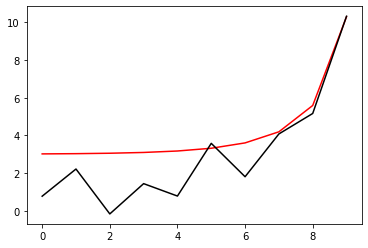

402 37.73533394350687 -0.7404574127572996
[ 0.88573091  2.28775775 -0.04120322  1.52052982  0.86372309  3.58497731
  1.76458778  3.92981676  4.94865754 10.1766269 ]


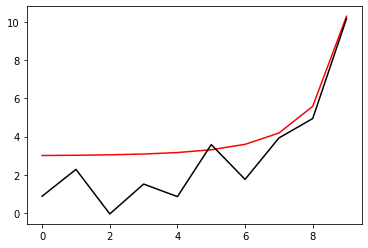

603 40.47351662971586 -0.7558232598811683
[ 1.00038783  2.36496446  0.08525833  1.60123883  0.93893201  3.55616155
  1.65671793  3.71715878  4.70072079 10.06671404]


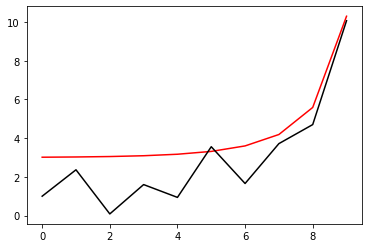

804 43.88324424748558 -0.7679088398103794
[1.09534234 2.42278527 0.19416434 1.66275853 0.99296853 3.49302549
 1.51423102 3.50208253 4.46918829 9.99269487]


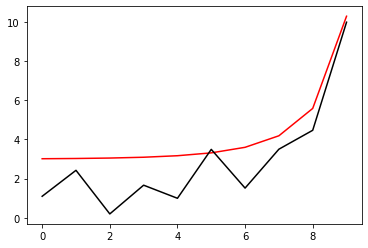

1005 55.35246265475787 -0.7731462057171702
[1.14187755 2.43148336 0.26570459 1.6864457  1.01834885 3.4107743
 1.37693569 3.31826661 4.27850604 9.94813446]


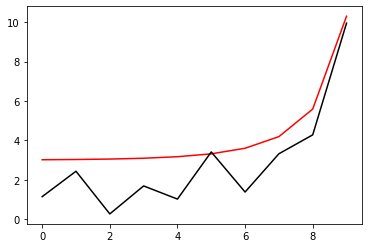

1206 39.84491558911612 -0.7759141269420341
[1.17648484 2.42284161 0.32496175 1.69714396 1.04000101 3.3413853
 1.2773384  3.18085772 4.13542528 9.92419129]


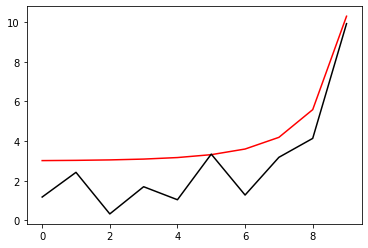

1407 38.77035880497715 -0.7784873450689527
[1.20441345 2.40432856 0.38001519 1.7035901  1.06437967 3.28746455
 1.20857139 3.07422962 4.0208317  9.91257874]


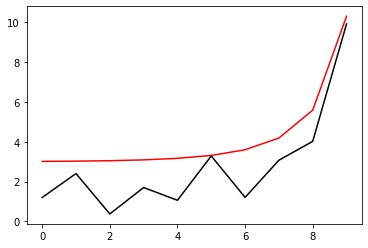

1608 36.12169032619786 -0.7811622655756957
[1.22770755 2.38012542 0.43324881 1.70896286 1.09216402 3.24590074
 1.16113211 2.98747225 3.92371905 9.90715502]


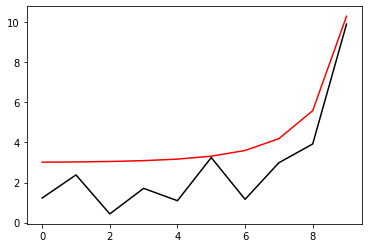

1809 50.382694908015054 -0.8059648514051276
[1.37838276 2.49255429 0.59773693 1.83297746 1.21969576 3.27695691
 1.13650052 2.8671115  3.76173038 9.90389784]


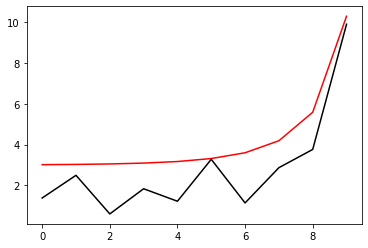

2010 35.09869894461245 -0.8309902262505938
[1.53205026 2.6115708  0.75891557 1.95610688 1.34222902 3.3044793
 1.10150286 2.7306787  3.58478118 9.90105657]


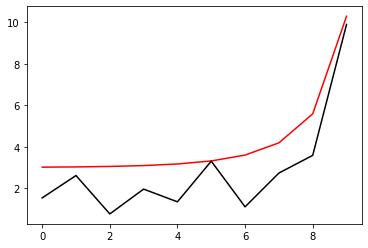

2211 28.207988224737626 -0.8417524772853107
[1.621007   2.67446272 0.86864197 2.02897885 1.41253534 3.28093271
 1.00998351 2.54496617 3.36762762 9.89743351]


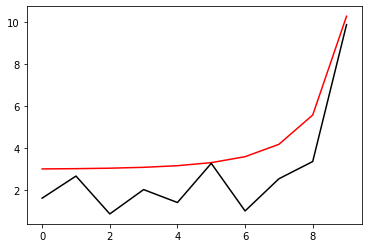

2412 31.017612621682044 -0.8604574484405089
[1.7386468  2.76762657 0.9995745  2.12171762 1.49369637 3.26276532
 0.91175941 2.34006482 3.11927497 9.89375644]


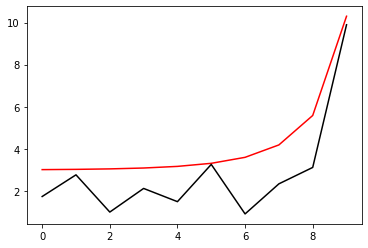

2613 25.634025334889106 -0.8707264287798531
[1.81679188 2.82397789 1.09862255 2.18865741 1.56019442 3.25297355
 0.84975822 2.19602353 2.94215382 9.89016712]


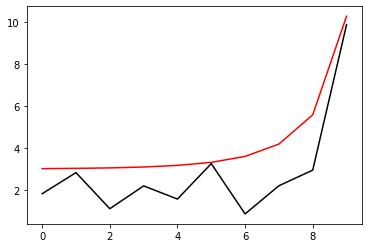

2814 34.07777153601221 -0.8853023374349759
[1.92400855 2.90792603 1.21783625 2.2806624  1.65706234 3.2926546
 0.85520335 2.12194752 2.82929916 9.88783463]


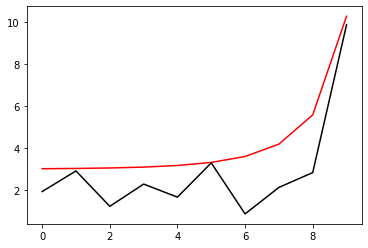

3015 42.107986456068616 -0.89199368062381
[1.95694484 2.91656801 1.2739262  2.30717463 1.69497279 3.28153812
 0.82989407 2.04497387 2.73024036 9.88616064]


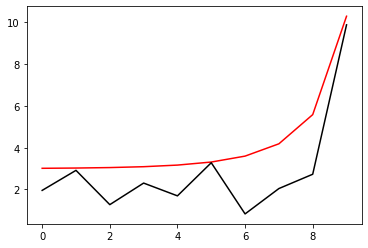

3216 22.68734633462281 -0.9252011949967474
[2.1638091  3.10572693 1.47962951 2.48626277 1.86080573 3.36663103
 0.83656033 1.91571379 2.5275244  9.88344645]


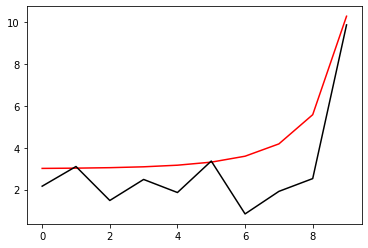

3417 24.715382140691382 -0.9612005090555269
[2.4044563  3.33504016 1.71670602 2.70912906 2.0775676  3.53024443
 0.93473888 1.86226782 2.38265235 9.88067779]


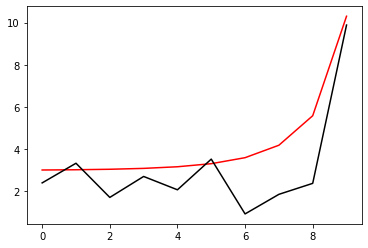

3618 4.4281485399586895 -1.0057708035721373
[2.7862144  3.70515449 2.06337981 3.04697706 2.3993177  3.81765602
 1.1511322  1.87402203 2.24797239 9.87823661]


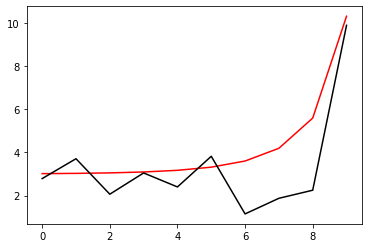

3819 3.725907151608002 -1.0042466821888294
[2.79833328 3.69924051 2.08961839 3.05947172 2.4373588  3.85986121
 1.24558973 1.97993905 2.336578   9.87895037]


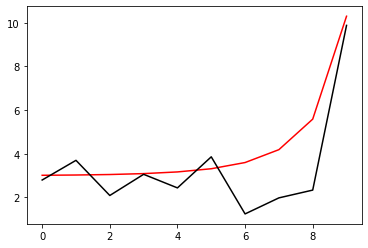

4020 6.304653009862565 -1.0033673696998024
[2.8022874  3.68439731 2.11048005 3.06638    2.47323375 3.90229775
 1.34553269 2.0965285  2.43903011 9.88056749]


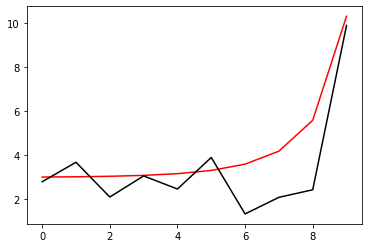

4221 6.373865568342737 -1.001901339332627
[2.8101877  3.67297838 2.13627815 3.07794153 2.51514506 3.95091202
 1.45068103 2.21615893 2.54497913 9.88226857]


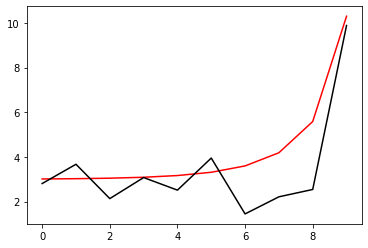

4422 11.616031622850873 -0.999270323749882
[2.8267764  3.66919081 2.17012045 3.09657882 2.56399134 4.0042923
 1.55600828 2.33147007 2.64748463 9.88392067]


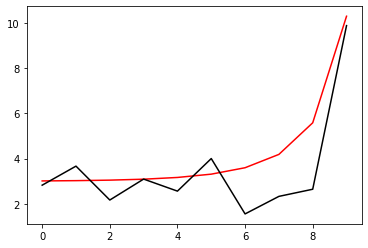

4623 3.5455648301301674 -0.9931979572137078
[2.87546442 3.70038415 2.23951783 3.15622915 2.6572074  4.11114679
 1.71330533 2.49325033 2.78449446 9.88597812]


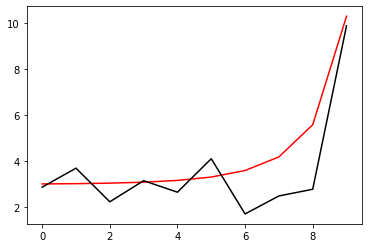

4824 2.303625344222162 -0.9914595704765138
[2.89259892 3.69678878 2.27763308 3.17925408 2.71311475 4.17164181
 1.82192437 2.61099199 2.89440824 9.88788016]


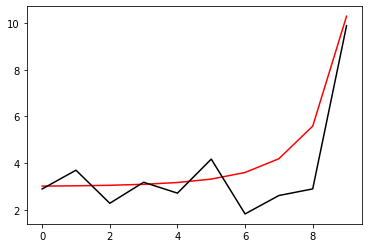

5025 4.410514800204653 -0.991291459585949
[2.89127358 3.6730057  2.29795982 3.18092058 2.74766479 4.20464253
 1.90371383 2.70286599 2.98544667 9.88935262]


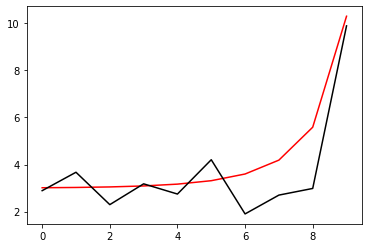

5226 2.422606112402306 -0.9911828993755885
[2.89040402 3.64898621 2.31771363 3.18047927 2.77949395 4.23188601
 1.97966115 2.78789789 3.07088835 9.89072534]


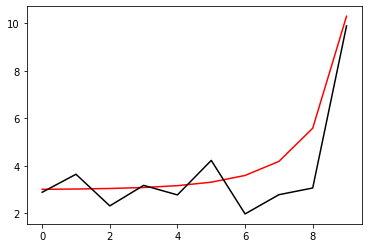

5427 2.253258385830018 -0.9917671298680746
[2.88484786 3.61973558 2.33209942 3.17337808 2.80449377 4.24998499
 2.04809734 2.86659719 3.15280099 9.89203193]


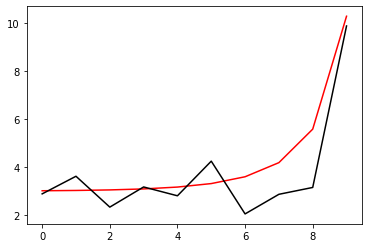

5628 0.9329956779498858 -0.9939219352230575
[2.86653591 3.57845886 2.33588937 3.15627277 2.82185456 4.26229987
 2.11683029 2.95128138 3.24441499 9.89345212]


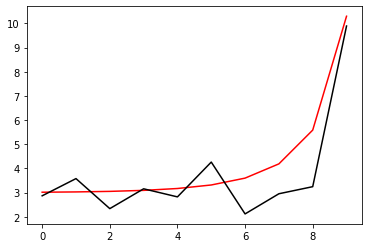

5829 4.237605692634287 -0.9967303361000841
[2.83414098 3.52445376 2.32857459 3.12990535 2.83374473 4.27391441
 2.19340444 3.05159729 3.35498004 9.89520483]


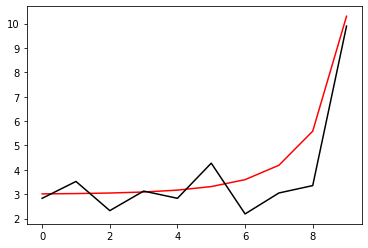

6030 2.1550178492846777 -0.9970545886892774
[2.8265382  3.49526488 2.34500892 3.1272468  2.86799447 4.30591436
 2.28494887 3.15749145 3.46324095 9.89692251]


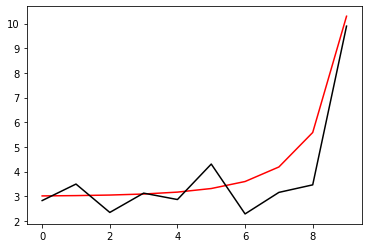

6231 5.970920771757878 -0.996775015933209
[2.82701377 3.47488274 2.37121047 3.13556531 2.91478465 4.35246268
 2.39133554 3.27692042 3.58254095 9.89878801]


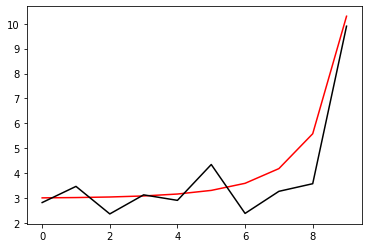

6432 7.737893601760167 -0.997245762600303
[2.82637455 3.4567077  2.39961977 3.15041814 2.97081485 4.41512086
 2.51702272 3.42112256 3.72777976 9.90108547]


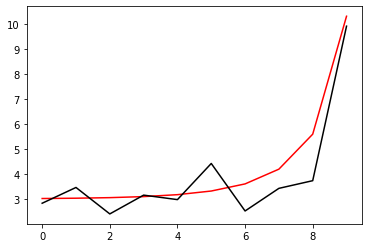

6633 2.5811559656848972 -0.997341643913997
[2.81164061 3.42496195 2.41046082 3.14673706 3.00497639 4.45129152
 2.61561132 3.53967666 3.85431153 9.90311036]


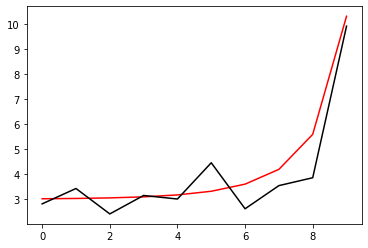

6834 1.2216535152834576 -0.9975129206358488
[2.80202908 3.39782295 2.42232321 3.14231372 3.03419773 4.47659605
 2.69904767 3.63826277 3.96109688 9.90481721]


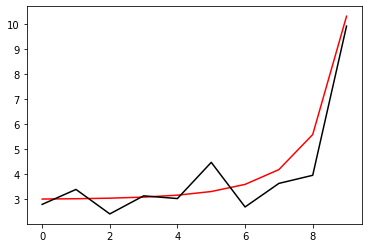

7035 3.048090416016508 -0.9976949343693309
[2.79607897 3.37302361 2.43483566 3.13635933 3.05925423 4.49257307
 2.77109838 3.72164077 4.05287437 9.90627951]


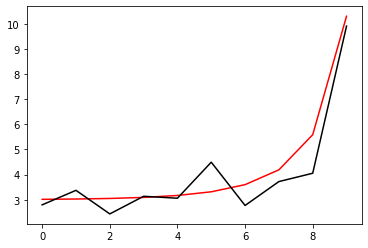

7236 2.1586506114694473 -0.9978893218070366
[2.79255843 3.34916812 2.44792278 3.1289563  3.08156904 4.50174951
 2.83622987 3.79539395 4.13520863 9.90758775]


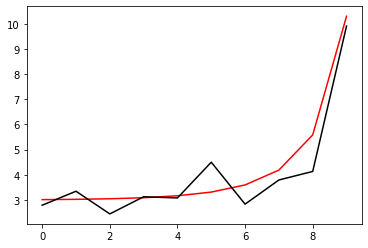

7437 1.2990859406625097 -0.9980148147344772
[2.79072468 3.32553863 2.46161712 3.12039915 3.10230259 4.50616721
 2.89782736 3.86375894 4.21233325 9.90880943]


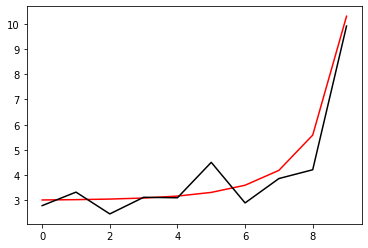

7638 0.15114704347201688 -0.9981857686366208
[2.78999475 3.30166193 2.47587422 3.11092902 3.12224588 4.50729661
 2.9582629  3.92971383 4.28722531 9.90999384]


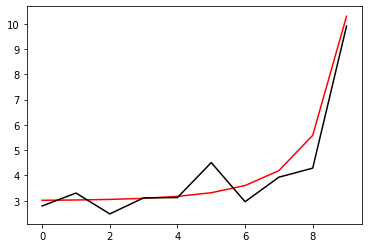

7839 4.107705234481357 -0.9984342485479686
[2.78980046 3.27716297 2.49059061 3.10080256 3.14207821 4.50651369
 3.01958837 3.99585055 4.36246242 9.91118224]


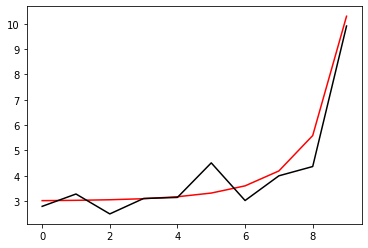

8040 1.3666354656657986 -0.998793482493787
[2.78938633 3.25159292 2.5055256  3.09028776 3.16250891 4.50546402
 3.08406959 4.06509923 4.44096084 9.91241912]


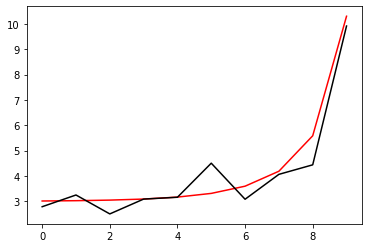

8241 5.1120653647551295 -0.9992925806115914
[2.78763197 3.22439445 2.52033307 3.07992263 3.18474098 4.50701094
 3.15528526 4.14214247 4.52736642 9.91377869]


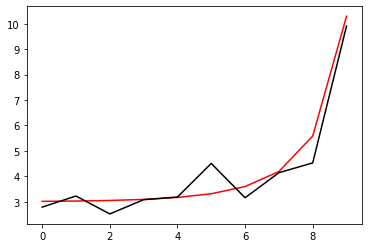

8442 6.739309598302162 -1.0006895559396498
[2.78012138 3.19261121 2.53229949 3.06943824 3.21060091 4.51843236
 3.2432272  4.24156642 4.63703922 9.91549352]


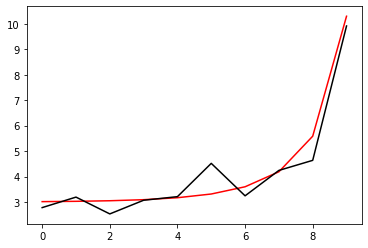

8643 0.6239615588164614 -1.0078036619298216
[2.72529752 3.11523956 2.49450721 3.01406746 3.19627816 4.50552712
 3.33105207 4.36929096 4.79005511 9.91791447]


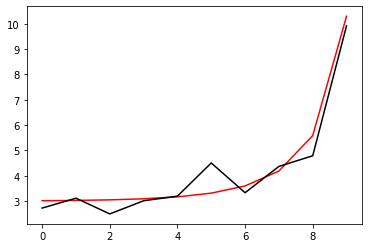

8844 1.0957694113229792 -1.0068934149760647
[2.72704943 3.09695808 2.50817465 3.01046967 3.22122974 4.52034541
 3.41897392 4.46999094 4.89898089 9.919637  ]


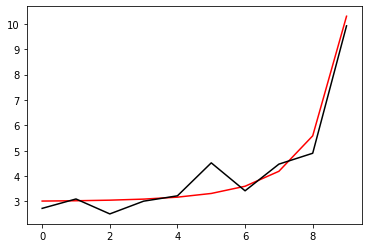

9045 1.5221744243462347 -1.0049666812441904
[2.72780928 3.08071803 2.51949241 3.00778679 3.24493434 4.53776045
 3.51005969 4.57785858 5.0146916  9.92145529]


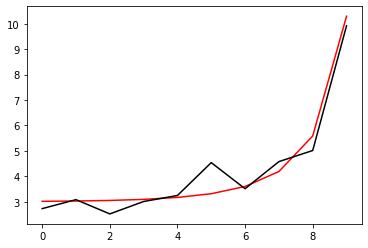

9246 2.08304130072787 -1.0053268007247609
[2.72695952 3.06430868 2.52760148 3.00399722 3.26556961 4.55533133
 3.60025163 4.68997044 5.13665069 9.92338294]


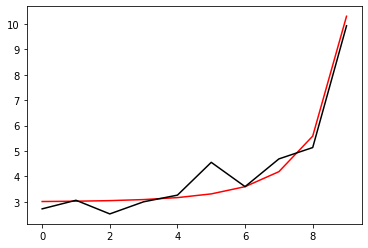

9447 2.040870831451897 -1.005593181919211
[2.7265532  3.04871601 2.53445017 2.99897952 3.28185177 4.56631096
 3.67873676 4.78803659 5.2452676  9.92510015]


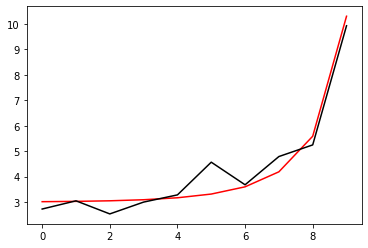

9648 0.21295906671704512 -1.005850231028663
[2.72779186 3.03507845 2.54160068 2.99400825 3.29559832 4.57204464
 3.74831367 4.87371898 5.34082888 9.92660879]


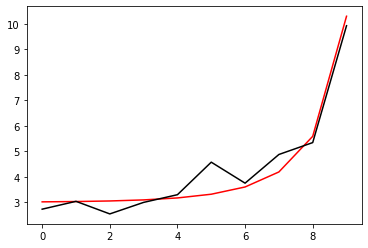

9849 3.0377701508105277 -1.0060685836452348
[2.72976418 3.02245317 2.54840459 2.98851096 3.30699333 4.57343306
 3.81226229 4.95176602 5.42824813 9.92798869]


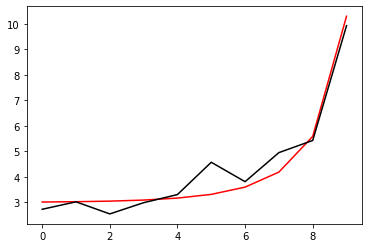

In [113]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 5.035327785714991 -1.005559674878593
[2.73281129 3.00378252 2.55789913 2.97899443 3.32306257 4.57177682
 3.94449865 5.10965932 5.57882354 9.93035044]


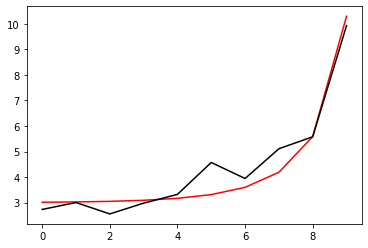

402 5.46961874046445 -1.0053480221752102
[2.73469422 2.99377554 2.56430771 2.9754495  3.33561259 4.57697799
 4.0413001  5.21847797 5.67318381 9.93186336]


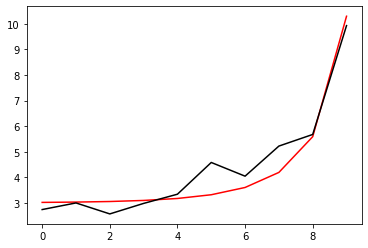

603 0.10323186345213597 -1.0050853088850842
[2.73591979 2.9841005  2.57246864 2.97598426 3.35484859 4.5959872
 4.14534318 5.34021053 5.7839001  9.93358553]


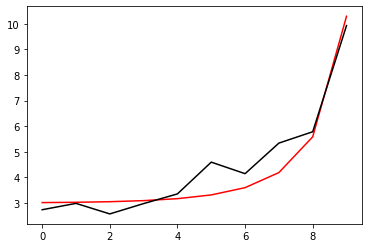

804 1.0573975438893863 -1.0049024616913187
[2.7348879  2.97374846 2.58097122 2.98018069 3.37993781 4.62832316
 4.24999152 5.46977995 5.91343921 9.93565676]


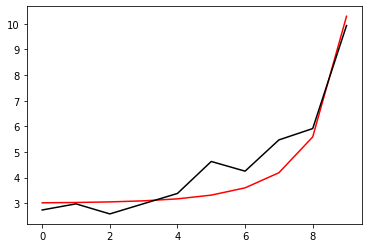

1005 0.9687017711048465 -1.0051388559094119
[2.73080618 2.96094808 2.5863676  2.98244169 3.4021138  4.65868825
 4.34160074 5.58638518 6.03867337 9.93760369]


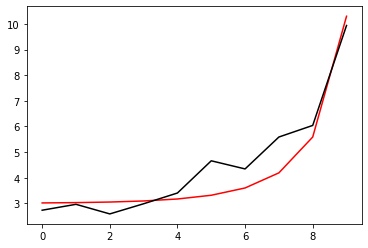

1206 2.0550602939456786 -1.0053747690454842
[2.72700718 2.94823568 2.59108442 2.98376045 3.42190791 4.68512055
 4.42337319 5.68917649 6.15135673 9.93940639]


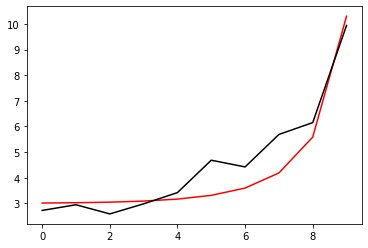

1407 1.3288193874105085 -1.0053760169480708
[2.72414057 2.93600886 2.59593301 2.98469155 3.44043096 4.70872405
 4.499262   5.78235623 6.25402242 9.94099349]


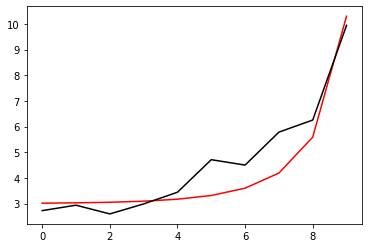

1608 0.0517133456494002 -1.005394786693102
[2.72196253 2.92402201 2.60099267 2.98531934 3.45807429 4.72992185
 4.57072943 5.8679435  6.34862969 9.9425108 ]


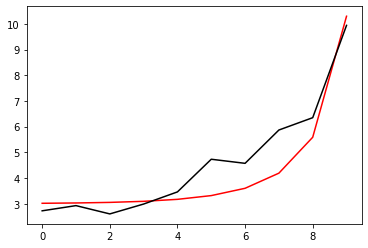

1809 2.0784610810577995 -1.0054336789269986
[2.72031332 2.91215386 2.60633387 2.98574712 3.47506281 4.74891997
 4.63851403 5.94720895 6.43658098 9.94386987]


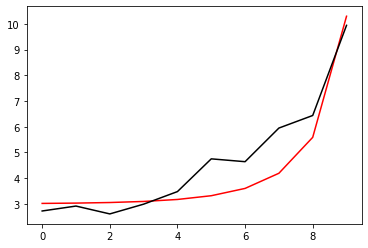

2010 1.0503122273067964 -1.0054862384425902
[2.71906005 2.90029784 2.61195102 2.98598868 3.49144514 4.76573287
 4.70307897 6.02105989 6.51889439 9.94519278]


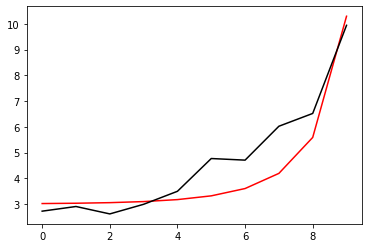

2211 4.620133111177847 -1.0055627263213616
[2.71811896 2.88840883 2.61787056 2.98612476 3.50735402 4.78055192
 4.76505687 6.0904802  6.59660121 9.94638683]


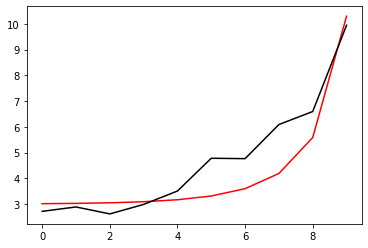

2412 5.124840959058547 -1.0056740732598335
[2.71734609 2.87640442 2.62405851 2.98619176 3.52285047 4.7934832
 4.82487634 6.15612198 6.67038101 9.94758186]


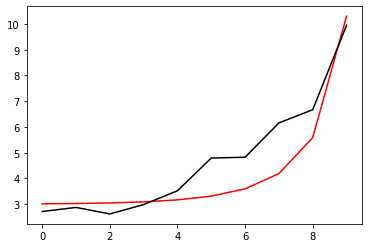

2613 0.06148359045794246 -1.0057729474886254
[2.71674727 2.86438656 2.63065425 2.98643487 3.53819654 4.80485595
 4.88305073 6.21862179 6.74084964 9.94866185]


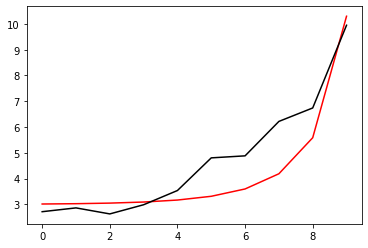

2814 1.0176750526431022 -1.0059043103571748
[2.71627599 2.85245027 2.63778703 2.98714048 3.55370805 4.81511628
 4.94014953 6.27867353 6.80868438 9.94976082]


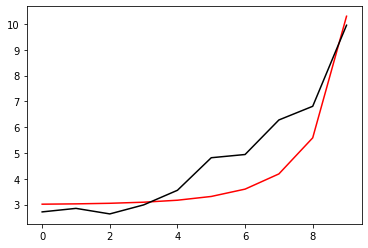

3015 0.16508067805566556 -1.0061315407689855
[2.71580522 2.84067334 2.64556753 2.98865518 3.56980465 4.82495016
 4.9969614  6.33724238 6.87483805 9.95077128]


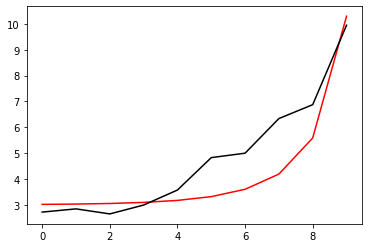

3216 2.0519259931624982 -1.0064226964979262
[2.7152677  2.82936315 2.65436828 2.99176865 3.58746473 4.83588498
 5.05499901 6.39604624 6.94094703 9.9518314 ]


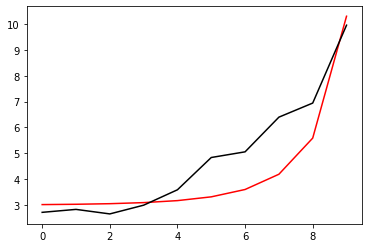

3417 1.1532513378844542 -1.0067802585161385
[2.71506178 2.81974886 2.66557033 2.99892707 3.60997507 4.85318721
 5.11947189 6.46089806 7.01252167 9.95294732]


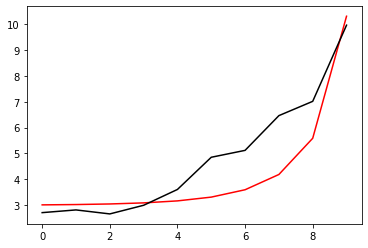

3618 0.05690230516123978 -1.007089959683067
[2.71091182 2.80948804 2.67664887 3.0096559  3.63828699 4.88198677
 5.1964581  6.54063057 7.09881615 9.95430332]


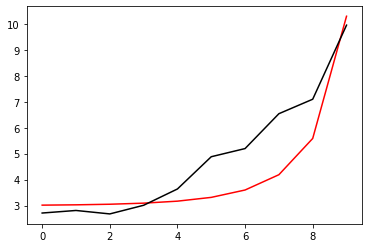

3819 2.0620178332070886 -1.007170242150497
[2.70375541 2.79926853 2.68559573 3.02055977 3.66570982 4.91246281
 5.27359704 6.62355973 7.18942562 9.95574496]


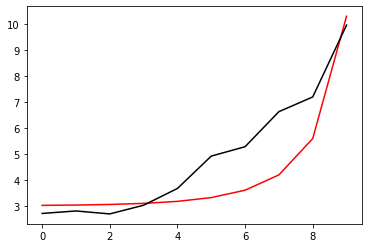

4020 1.0731494272267643 -1.007103731984338
[2.69764734 2.79085144 2.69300068 3.02959742 3.68772937 4.93562079
 5.33939356 6.69605788 7.27099185 9.95701371]


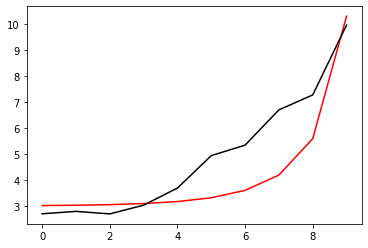

4221 4.051024111747505 -1.0070004988812493
[2.69302573 2.78379481 2.69938418 3.03678214 3.70502555 4.95175274
 5.39478041 6.75788077 7.34277738 9.95816131]


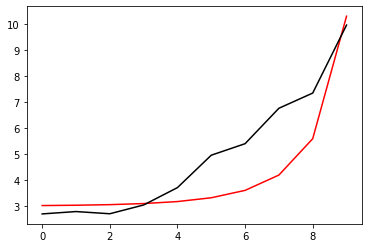

4422 4.9984637772618 -1.0069511528160928
[2.6894872  2.77758427 2.7051212  3.04269727 3.71914546 4.96306613
 5.44325545 6.81240917 7.40786384 9.95918417]


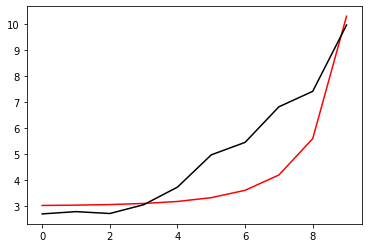

4623 0.09217826472177583 -1.0068586029435376
[2.68657114 2.77178983 2.71031068 3.04766815 3.7310474  4.9710877
 5.48733256 6.86234746 7.46886312 9.9601411 ]


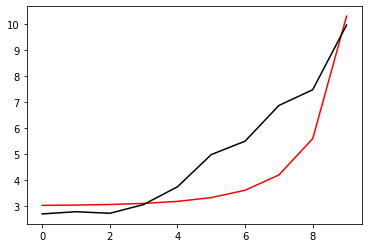

4824 0.17669566965007538 -1.006934834917973
[2.68433805 2.76652077 2.71537363 3.05229186 3.74172831 4.97723118
 5.52901624 6.90984483 7.52781404 9.96106874]


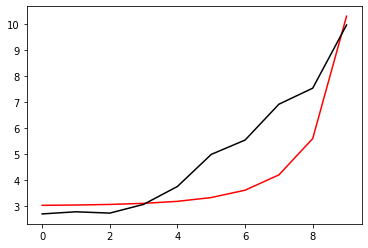

5025 0.14457728356591387 -1.0069862821125928
[2.68236009 2.76141092 2.72015535 3.05657279 3.75149863 4.98219166
 5.56950407 6.95635791 7.58617431 9.96198604]


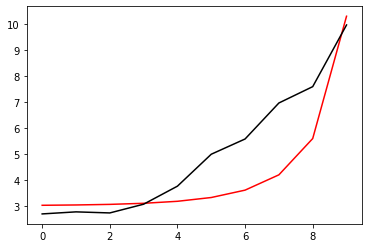

5226 2.069455711738657 -1.0069948402866
[2.68054936 2.75648908 2.72488016 3.06093245 3.76107126 4.98708826
 5.6101992  7.00344629 7.64538275 9.96292006]


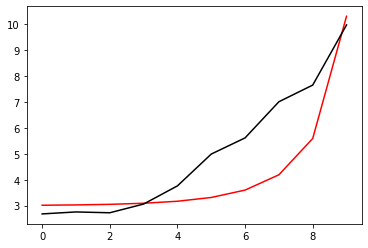

5427 1.0729036812907258 -1.0069522187323094
[2.67867995 2.75171033 2.72971988 3.0658215  3.77126973 4.99332701
 5.652757   7.05300889 7.70719805 9.96388391]


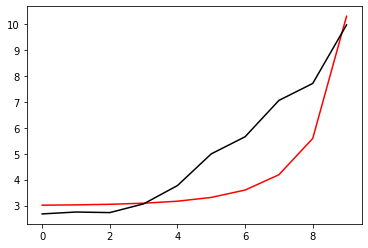

5628 0.0648002484615582 -1.0068756490143684
[2.67639991 2.74707988 2.73501472 3.07206831 3.7835207  5.00330159
 5.69974434 7.10800261 7.77437796 9.96495537]


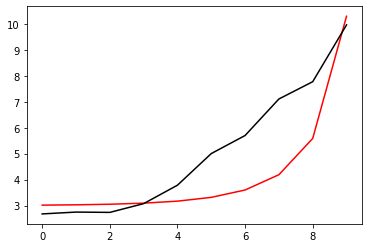

5829 2.0663702762773886 -1.0067603415125865
[2.67306598 2.74278765 2.74159035 3.08149707 3.80077999 5.02182822
 5.7560547  7.17431158 7.8526935  9.9661623 ]


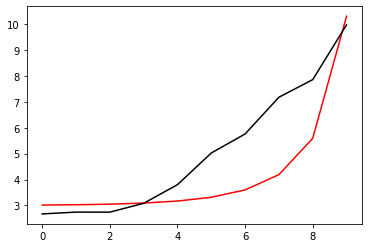

6030 1.0755445723319912 -1.0066042506569015
[2.6672402  2.73897853 2.75029418 3.09639939 3.826752   5.05528018
 5.82794452 7.26128163 7.95289508 9.96777106]


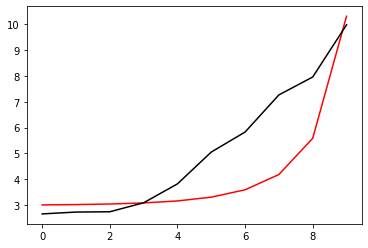

6231 3.159561001375338 -1.0063801833803452
[2.65870238 2.73437734 2.75772142 3.11146627 3.8537087  5.09324914
 5.90221155 7.35645439 8.06545955 9.9695199 ]


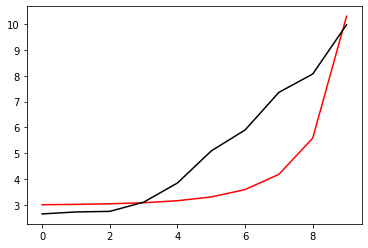

6432 4.720034244151638 -1.0064681034534846
[2.65105594 2.72941686 2.76215296 3.12191811 3.87378047 5.12275397
 5.96326339 7.43791751 8.16525035 9.97112206]


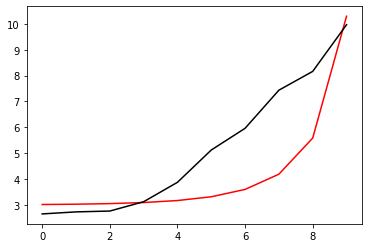

6633 0.11914401820355004 -1.0065013819685766
[2.64523735 2.72492734 2.76523109 3.12970165 3.88961717 5.14668749
 6.01618499 7.50977764 8.25439188 9.97249469]


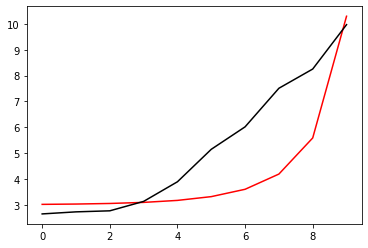

6834 0.07828481463725658 -1.0065029053146768
[2.64100181 2.7214397  2.76848233 3.13725852 3.90486124 5.17017273
 6.06858304 7.58130014 8.34239872 9.97391026]


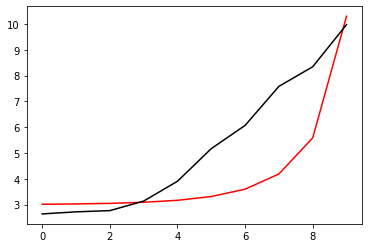

7035 0.4421602681651807 -1.0064766290475433
[2.63795776 2.71965171 2.77356142 3.14742181 3.92386684 5.19994811
 6.13015522 7.66572543 8.44385329 9.97548008]


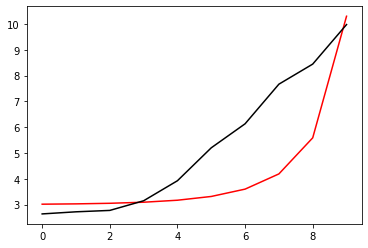

7236 2.0687634782222224 -1.006282171144738
[2.63438397 2.71836682 2.77954308 3.15984304 3.94714381 5.23828642
 6.20536617 7.7720774  8.57086547 9.97750564]


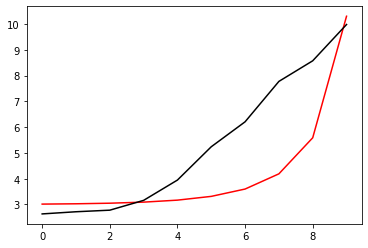

7437 0.18113922169081587 -1.0061562262179216
[2.62924528 2.71485783 2.78217665 3.16841807 3.96619126 5.27284469
 6.2766595  7.87707533 8.69879986 9.97950198]


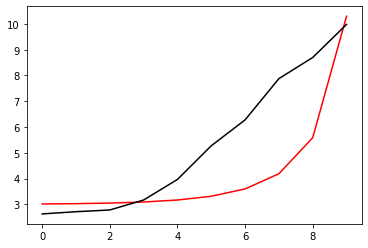

7638 0.0846977002434171 -1.0061347629664892
[2.62356119 2.70988976 2.78212307 3.17327643 3.98014502 5.30053341
 6.3374897  7.96865945 8.81237127 9.9813166 ]


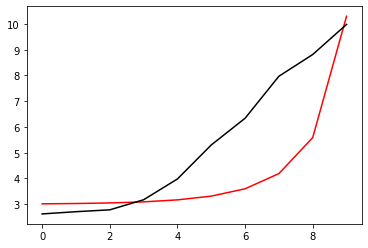

7839 1.5432133621997899 -1.0060105249735911
[2.61806481 2.70445459 2.78070093 3.17588792 3.99056163 5.32280479
 6.38945746 8.04809637 8.91224724 9.98283807]


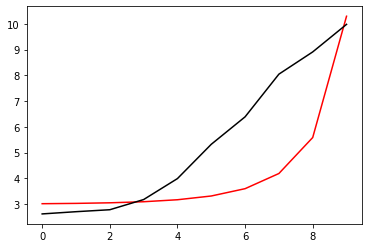

8040 1.0968555519665244 -1.005806592455994
[2.61292785 2.69901049 2.77868074 3.17727334 3.99876189 5.34137398
 6.4351625  8.11883654 9.0021327  9.98430784]


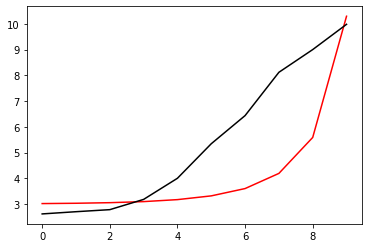

8241 2.3423432949712137 -1.0056044827366868
[2.60833527 2.69391027 2.77660619 3.17814325 4.00566957 5.35745527
 6.47641305 8.18325626 9.08462017 9.985591  ]


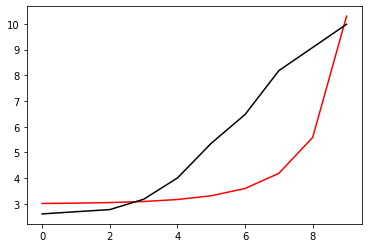

8442 3.6485170777402622 -1.0055927087739065
[2.60455705 2.68946837 2.77487306 3.17896102 4.01184555 5.37172965
 6.51416411 8.24250363 9.16093902 9.98681233]


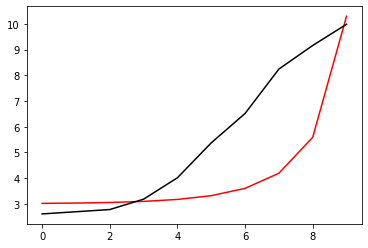

8643 0.11586325149850207 -1.00558676017941
[2.60145518 2.68552368 2.77334632 3.17961107 4.01722151 5.38418359
 6.5485805  8.29685334 9.23149232 9.98789996]


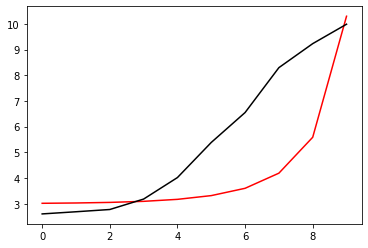

8844 0.08538445465212581 -1.0055692921784105
[2.59912487 2.68209253 2.77202323 3.18007937 4.02181151 5.3948831
 6.5799031  8.34665501 9.29675563 9.98891749]


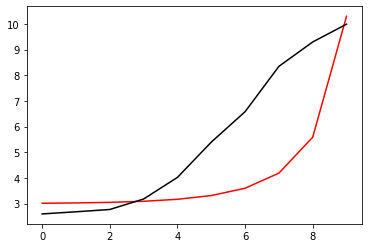

9045 0.37987212675176124 -1.0056576081995243
[2.59748188 2.67897848 2.77066071 3.18009621 4.02536981 5.40365489
 6.60819331 8.39219512 9.35723863 9.98987152]


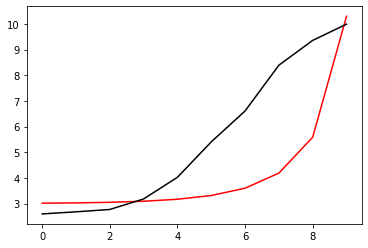

9246 2.089654415862822 -1.0057207272837263
[2.59674029 2.67629059 2.76931855 3.17968751 4.02792466 5.41055848
 6.63365754 8.43379006 9.41336434 9.99075598]


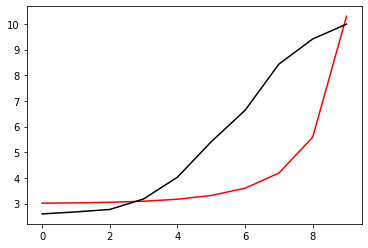

9447 0.11440378254213562 -1.0057353047084965
[2.59688186 2.6739325  2.76787098 3.17871567 4.02936485 5.41555318
 6.6564631  8.47181557 9.46567668 9.99158686]


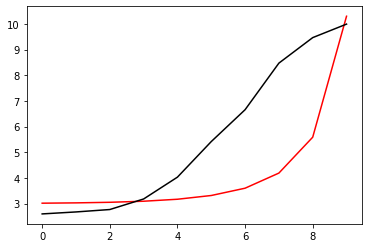

9648 0.10671476650683792 -1.005707707657672
[2.59785077 2.67180474 2.76621237 3.17708341 4.02963325 5.41866468
 6.67684232 8.50671227 9.51476341 9.99238051]


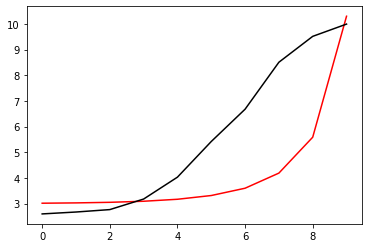

9849 1.2171772778951468 -1.0056126216226704
[2.59963472 2.66988457 2.76433673 3.17481355 4.02880812 5.42006804
 6.69517008 8.53904285 9.5612902  9.99308964]


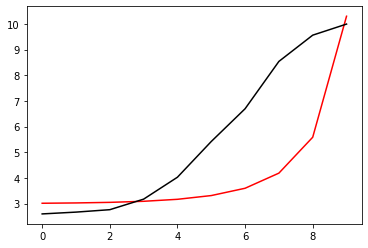

In [114]:
optimizer=tf.optimizers.Adam(learning_rate=0.00075)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.1793839766661476 -1.005365770066467
[2.60301759 2.66694183 2.76113936 3.17050249 4.02623211 5.41997989
 6.72378299 8.58831833 9.63170646 9.99419467]


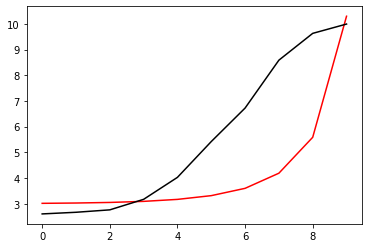

402 3.343343848391929 -1.0053646499435243
[2.60626841 2.66525948 2.7586936  3.16685804 4.02312091 5.41783407
 6.73769256 8.61353757 9.66836212 9.99478132]


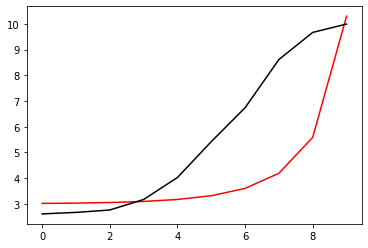

603 0.10937820696728251 -1.0053456543970314
[2.61011438 2.66339858 2.75584848 3.16263283 4.01926937 5.4147422
 6.75060372 8.63751136 9.70379591 9.99532904]


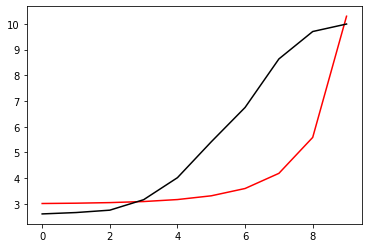

804 0.09399210521480385 -1.0053132738160353
[2.61438012 2.66144007 2.75273152 3.15801041 4.01489779 5.41098934
 6.76281545 8.66056234 9.73826964 9.99587829]


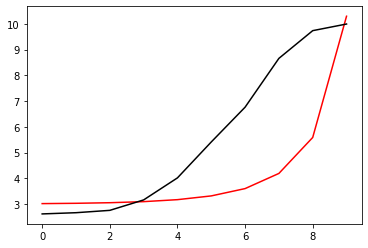

1005 0.3161543408682055 -1.005372306037128
[2.61888348 2.65932378 2.74930875 3.15299646 4.0100553  5.40670427
 6.77453422 8.68297362 9.77206872 9.99641254]


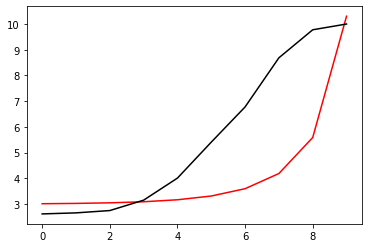

1206 2.0914360347049166 -1.0054112165847644
[2.62362923 2.65717021 2.74573739 3.14778372 4.00496337 5.40214451
 6.78601223 8.70495468 9.80533664 9.99694217]


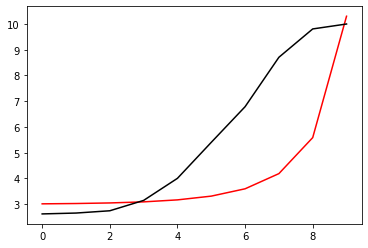

1407 0.10605596889168714 -1.0054181013779289
[2.62855919 2.65498888 2.74204336 3.14242183 3.99969904 5.39743338
 6.79740406 8.72666959 9.83821565 9.99745972]


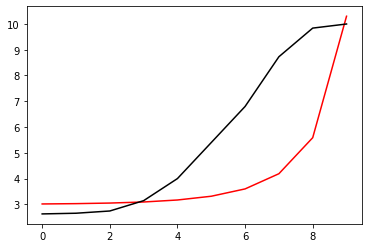

1608 0.10202242377130737 -1.0053981000114942
[2.6336278  2.65278263 2.73823676 3.13693767 3.99431217 5.39266242
 6.80882995 8.74824502 9.87081402 9.99796053]


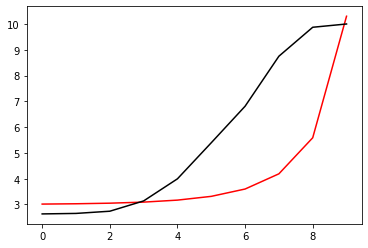

1809 1.1673204863818034 -1.005341669955332
[2.63888879 2.65063212 2.7343913  3.13141323 3.98890418 5.38797215
 6.82045134 8.76983207 9.90325261 9.99848699]


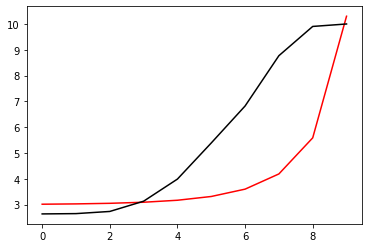

2010 1.1160073054156796 -1.005244755719454
[2.6442574  2.64848465 2.7304462  3.12579277 3.9834333  5.38335242
 6.83227934 8.79144901 9.93554503 9.99898355]


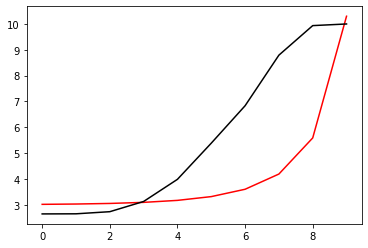

2211 2.142395302787122 -1.0051436097520374
[2.64968999 2.64632946 2.72637637 3.12005609 3.97790088 5.37885143
 6.84439744 8.81318741 9.96777125 9.99949423]


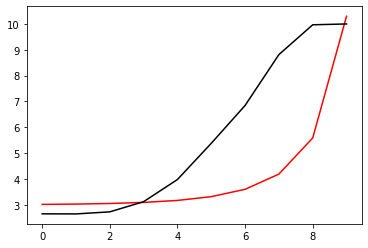

2412 3.256928443853714 -1.005127280944394
[ 2.65515719  2.64419326  2.72219607  3.11422845  3.97236833  5.37460039
  6.85698743  8.83523571 10.00010126  9.99999673]


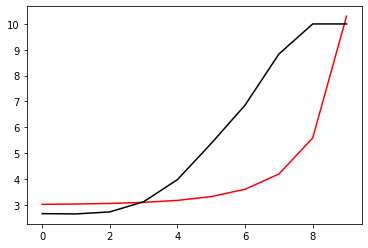

2613 0.10198904206560175 -1.00508767132311
[ 2.6606002   2.6420692   2.71785458  3.10823439  3.96674966  5.37051525
  6.8699403   8.85745616 10.03238505 10.00052336]


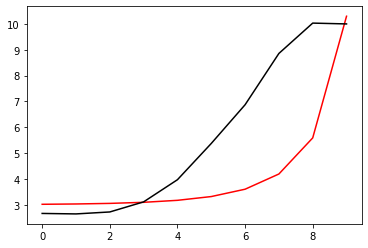

2814 0.0937740063065778 -1.0050324569707156
[ 2.6660201   2.64003688  2.7133796   3.10207473  3.96104949  5.36663477
  6.88330007  8.87987661 10.06463333 10.00101601]


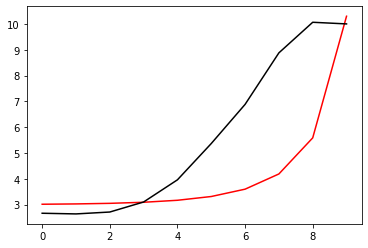

3015 0.2427817550959976 -1.0050776890369195
[ 2.67147382  2.63820225  2.7087797   3.09569638  3.95520673  5.36294425
  6.89708153  8.90252337 10.09687273 10.00153785]


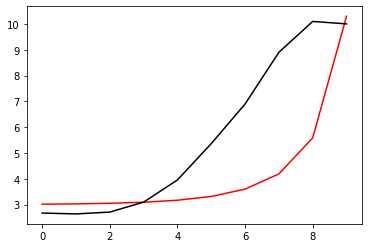

3216 2.0906760787834955 -1.005107317918739
[ 2.6768514   2.63666246  2.70414195  3.08914581  3.94925783  5.35950195
  6.91131175  8.92538114 10.12906135 10.00202902]


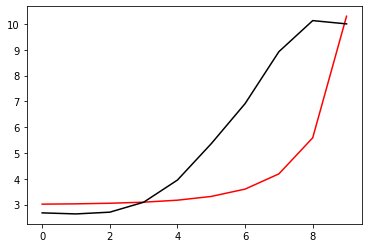

3417 0.10044768532638756 -1.0051127312403116
[ 2.6820858   2.63548419  2.6995205   3.08240471  3.94315627  5.35629622
  6.92597798  8.94843292 10.16117867 10.00255135]


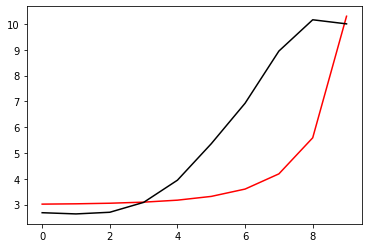

3618 0.09866470887236552 -1.0050989848687528
[ 2.6871199   2.63469122  2.69497868  3.07545788  3.93683754  5.35329664
  6.94105047  8.97165239 10.19319994 10.00303355]


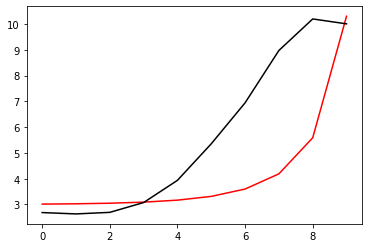

3819 1.127040168128778 -1.0047608520968179
[ 2.6944384   2.63653256  2.6923511   3.06937368  3.93043488  5.34978697
  6.95531352  8.993738   10.2238597  10.00352721]


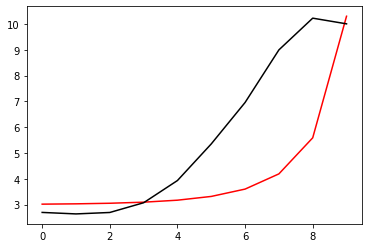

4020 1.10243057528808 -1.004836934151033
[ 2.69865427  2.63575778  2.68675472  3.05928315  3.91839581  5.34010417
  6.96462561  9.01247912 10.25189903 10.00395946]


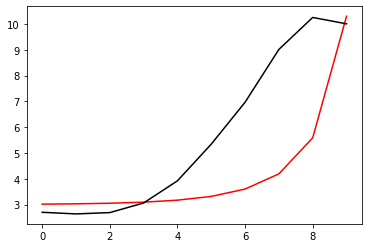

4221 2.121008924191552 -1.004738671258792
[ 2.70192483  2.63597362  2.68402286  3.05367393  3.91186394  5.33621777
  6.97853895  9.0345118  10.28224077 10.00445079]


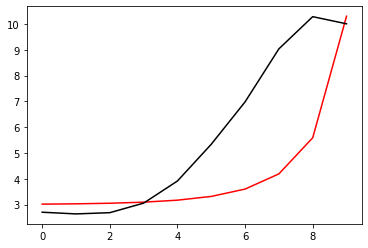

4422 3.127526173031819 -1.004638718008974
[ 2.70489788  2.63613982  2.68139051  3.04822236  3.90531775  5.33228051
  6.99238015  9.05651716 10.31240424 10.00491381]


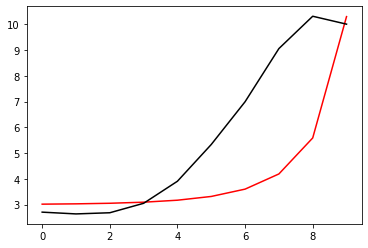

4623 0.09641156606364154 -1.0045357718855983
[ 2.70772271  2.63634521  2.67891285  3.04297199  3.89879471  5.32821563
  7.00596467  9.07829476 10.34219432 10.00539577]


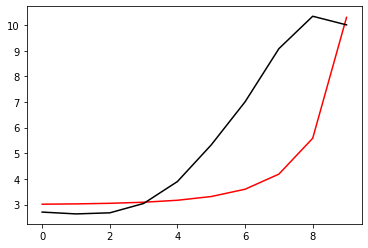

4824 0.09615647834967044 -1.004440490186524
[ 2.71043183  2.63658499  2.67657135  3.03791788  3.89234105  5.32406372
  7.01929447  9.09985174 10.37162348 10.0058442 ]


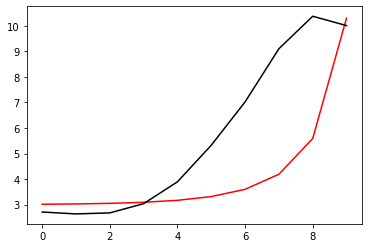

5025 0.24389930135049415 -1.0045767919821942
[ 2.71329574  2.63710044  2.67459172  3.03328803  3.88621914  5.32005054
  7.03245801  9.12121605 10.40070043 10.00631931]


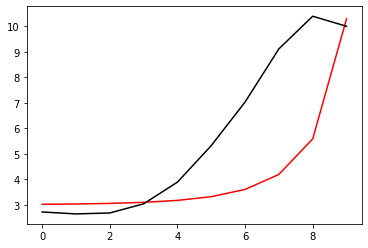

5226 2.0916648154783415 -1.004700084911961
[ 2.71603633  2.63760036  2.67268061  3.02879784  3.88018358  5.31597692
  7.0453114   9.14231148 10.42938515 10.00675236]


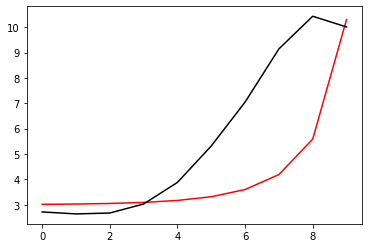

5427 0.09868731470079355 -1.0048062300216463
[ 2.71866557  2.63808391  2.67082877  3.02443319  3.87423268  5.31183202
  7.0577971   9.16308258 10.45763483 10.00721677]


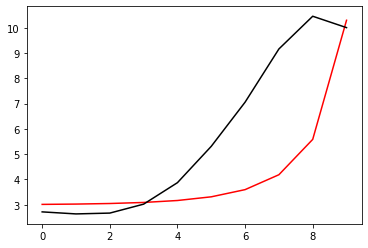

5628 0.10084834667386892 -1.0048973472223144
[ 2.72119227  2.63855159  2.66903026  3.02018124  3.86835671  5.30758985
  7.06983841  9.18345231 10.48538827 10.00763408]


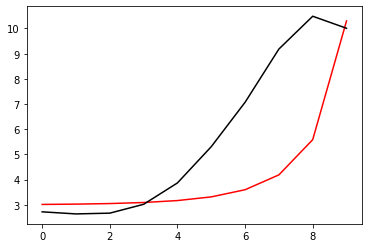

5829 1.1346803319654566 -1.0049656712612007
[ 2.72363973  2.6390263   2.66730869  3.01606469  3.86258369  5.30326389
  7.08138258  9.2033485  10.51258454 10.00808156]


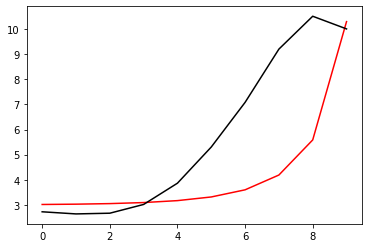

6030 1.1253216592377382 -1.0049973441799214
[ 2.72600303  2.63949716  2.66564463  3.01204801  3.856857    5.29875588
  7.09228364  9.22263378 10.53911648 10.00848151]


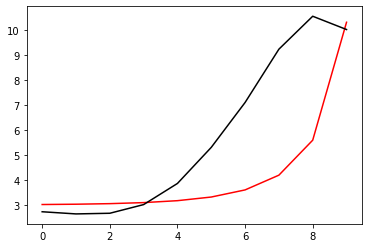

6231 2.12339811990876 -1.0050101417081985
[ 2.72828848  2.63996897  2.6640391   3.00812191  3.85115316  5.29401302
  7.10244509  9.24120909 10.56491176 10.0089038 ]


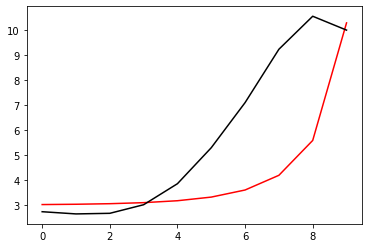

6432 3.0003425077575963 -1.004924839285818
[ 2.73044559  2.64038788  2.66243414  3.00422237  3.84541023  5.28900069
  7.11187046  9.25909779 10.59002508 10.00928339]


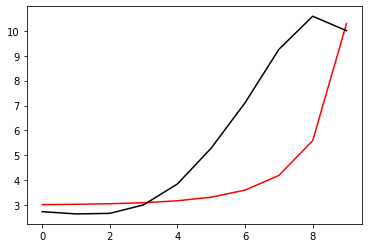

6633 0.10661875086257883 -1.0048079399060914
[ 2.73255461  2.64083276  2.66090126  3.00040033  3.83963693  5.28363971
  7.12039007  9.27611346 10.61429952 10.00968297]


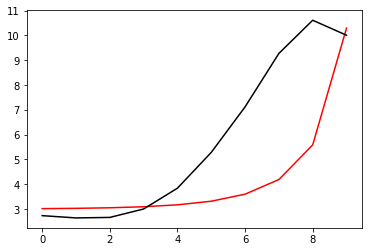

6834 0.10120586833877403 -1.0046765582241792
[ 2.73463435  2.64131687  2.65944599  2.99665005  3.83381845  5.27792274
  7.12801989  9.29228032 10.63778622 10.01003468]


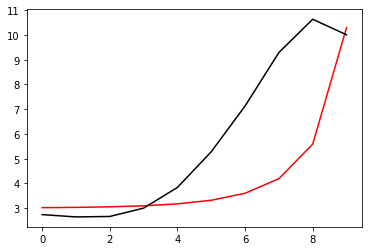

7035 0.18145099047400615 -1.004586808101978
[ 2.73671359  2.64185553  2.65806877  2.99295659  3.827934    5.27186128
  7.13483551  9.3076952  10.66060742 10.01041243]


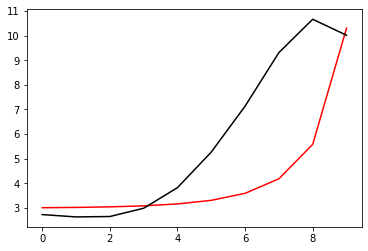

7236 2.094840086823995 -1.0044956024034792
[ 2.73878524  2.64244303  2.65676631  2.98932161  3.82200286  5.26552878
  7.14096319  9.32248406 10.68289898 10.01074542]


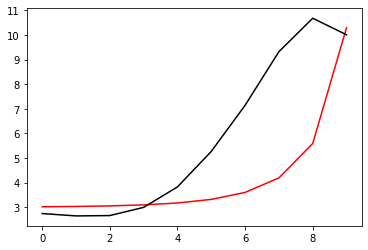

7437 0.09715039274231699 -1.0044032131682274
[ 2.74084479  2.64307028  2.65552615  2.98573306  3.81602845  5.25898686
  7.1465305   9.33678601 10.70480974 10.01110794]


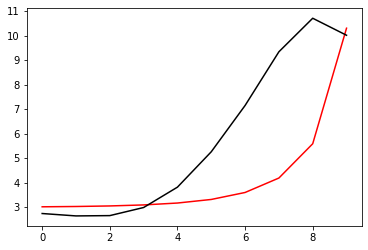

7638 0.097156627608476 -1.0043143433947694
[ 2.74288283  2.64372515  2.65433511  2.98218119  3.81001931  5.25229936
  7.15165518  9.35072755 10.7264714  10.01143245]


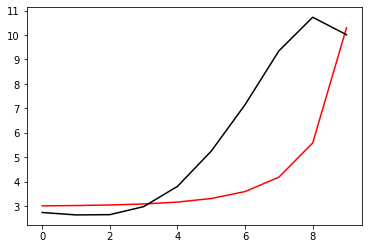

7839 1.118507855189104 -1.0042313326592873
[ 2.74491053  2.64442177  2.65321354  2.97869914  3.8040382   5.24558584
  7.15647806  9.36443609 10.74800447 10.01178693]


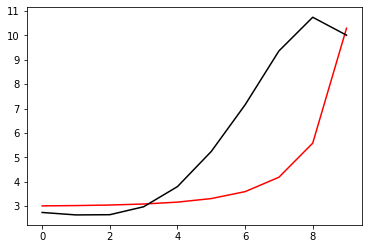

8040 1.0993254267179389 -1.0041510853084485
[ 2.74689882  2.64512793  2.65212745  2.97525446  3.79806398  5.23885748
  7.16104746  9.37797714 10.76947999 10.01211135]


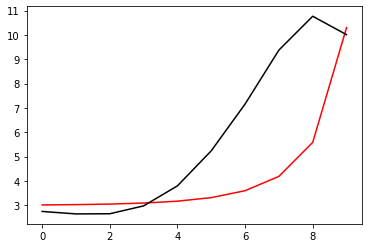

8241 2.114949495733187 -1.0040886297017206
[ 2.74885185  2.64584817  2.65108452  2.97186334  3.79213347  5.23218485
  7.16544277  9.39142433 10.79096573 10.01246168]


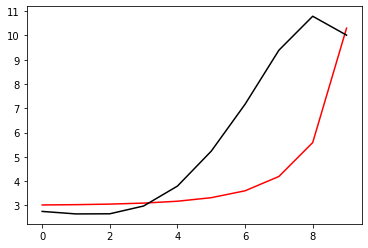

8442 2.869976743161501 -1.0041494807896318
[ 2.75073633  2.64655341  2.65006656  2.96853216  3.78630982  5.2257375
  7.16988816  9.4049902  10.81265812 10.01279075]


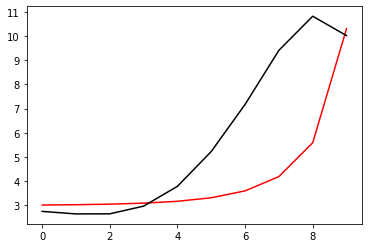

8643 0.0992975007550129 -1.004211058074977
[ 2.75256774  2.64725545  2.64907948  2.96525454  3.78055591  5.21940025
  7.17421578  9.41851592 10.83440578 10.01314847]


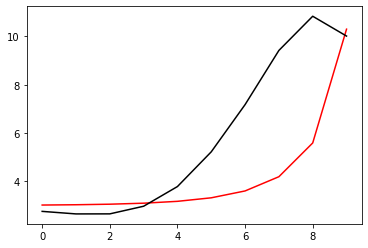

8844 0.1011521192633793 -1.0042747010764754
[ 2.75434741  2.64795544  2.64812661  2.96203977  3.77489316  5.21320413
  7.1784533   9.4320229  10.85622259 10.01347484]


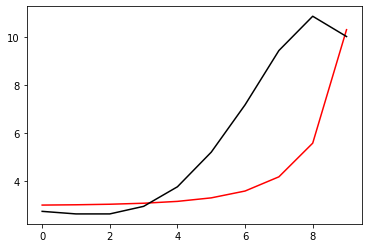

9045 0.16469813404627884 -1.004438898291119
[ 2.75623763  2.64881436  2.64737149  2.95906047  3.76951205  5.20733291
  7.18270148  9.44555036 10.87811902 10.01383805]


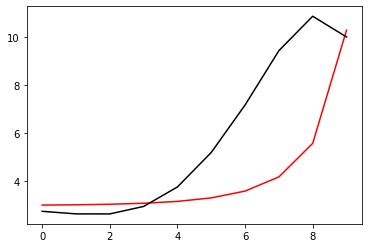

9246 2.0967003615874464 -1.0045816774902756
[ 2.7580582   2.64965195  2.64663446  2.95613717  3.76423302  5.20162406
  7.18688316  9.45907509 10.90008684 10.01416515]


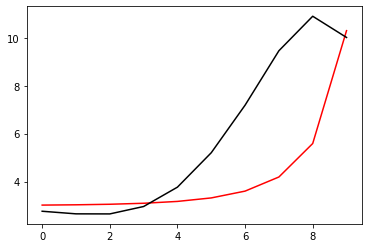

9447 0.10453964591536738 -1.0046987374781386
[ 2.75980962  2.65046729  2.64591512  2.95327239  3.75906391  5.19608477
  7.19100295  9.47259482 10.92211598 10.0145308 ]


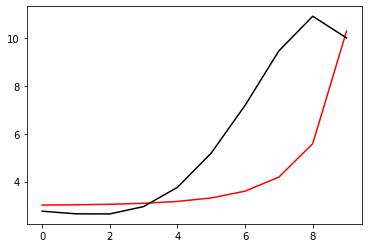

9648 0.10654504229194202 -1.0047915255352513
[ 2.76149164  2.65125807  2.64521076  2.95046477  3.75400623  5.19071375
  7.19505921  9.48610214 10.94419204 10.01486041]


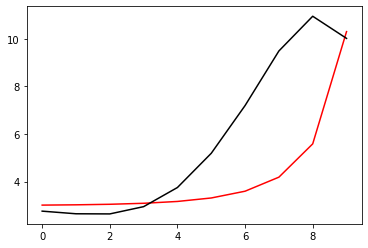

9849 1.1336383447032943 -1.0048534222654562
[ 2.76312073  2.65204282  2.64454453  2.94774529  3.74910246  5.18555818
  7.19908477  9.49960764 10.96631149 10.01522542]


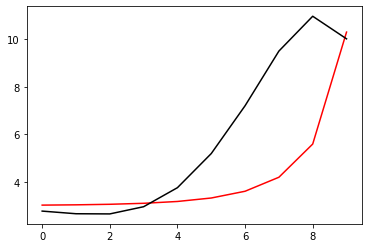

In [115]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.1136218304842562 -1.003966442971885
[ 2.76472904  2.6524956   2.64297908  2.94335498  3.74084965  5.17929353
  7.20781734  9.52395951 11.00454495 10.01582008]


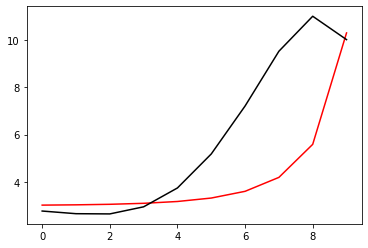

402 2.8150669643630857 -1.0040603263140506
[ 2.7658309   2.65294919  2.64225491  2.9409746   3.73691294  5.17556065
  7.21246374  9.53776325 11.0266706  10.01616675]


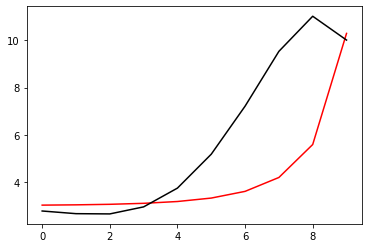

603 0.10085124575951425 -1.004141451593359
[ 2.76705092  2.65349908  2.64157501  2.9385538   3.73281863  5.17157585
  7.21676304  9.55138568 11.04879791 10.01651881]


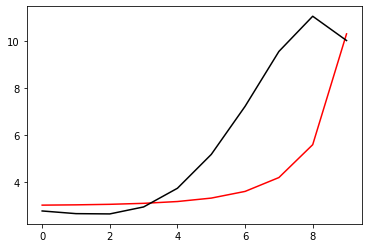

804 0.10323556220885652 -1.0042201490944933
[ 2.7682845   2.65406431  2.64089657  2.93610433  3.72864183  5.16743757
  7.22072669  9.56477658 11.07080114 10.01686113]


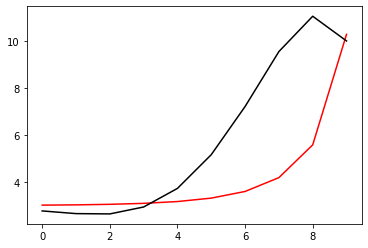

1005 0.15362323056110333 -1.0043650126549917
[ 2.76966922  2.65479393  2.64038816  2.93382511  3.72462308  5.1633992
  7.22449557  9.57797543 11.09266258 10.01721066]


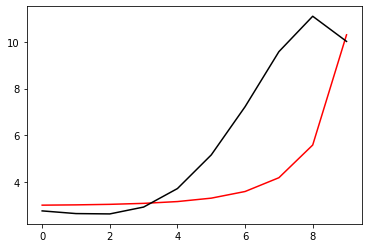

1206 2.0988503922098105 -1.0044927428374144
[ 2.77101603  2.65550872  2.63988199  2.93156051  3.72062015  5.15934807
  7.22802697  9.59097268 11.11437733 10.01753899]


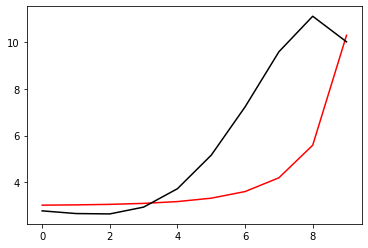

1407 0.10608437295773455 -1.00459971394886
[ 2.77231892  2.65620632  2.63938126  2.9293213   3.71665413  5.15531457
  7.23134755  9.60377711 11.13594383 10.01789903]


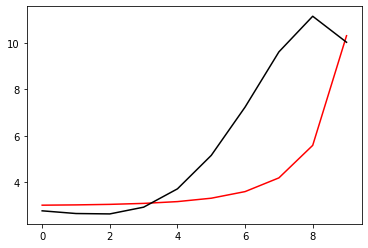

1608 0.10793436014806398 -1.0046869551831765
[ 2.77357441  2.65688469  2.63888641  2.92711143  3.71273408  5.15131275
  7.23447292  9.61639278 11.15736065 10.01822057]


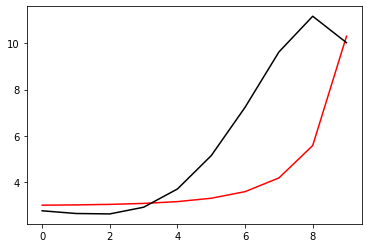

1809 1.1300547458958758 -1.0047492135478717
[ 2.77479556  2.65756065  2.63841948  2.92495984  3.70889884  5.14739065
  7.23744385  9.62883861 11.17863746 10.01857026]


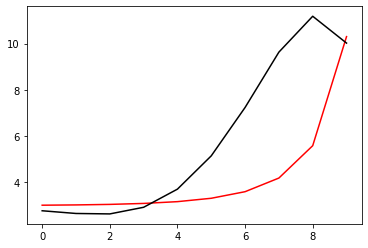

2010 1.130848717353199 -1.0047759598006858
[ 2.775974    2.65822305  2.6379661   2.92284752  3.70512219  5.14351283
  7.24023326  9.64109089 11.19975435 10.01888844]


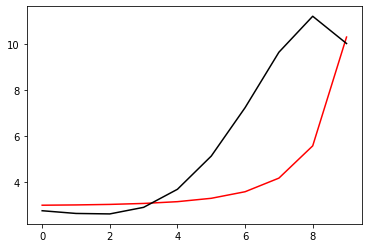

2211 2.1178930875364608 -1.004784998327371
[ 2.77710602  2.65886709  2.63752075  2.92076855  3.70139912  5.13967847
  7.24285136  9.65315697 11.22071883 10.01922928]


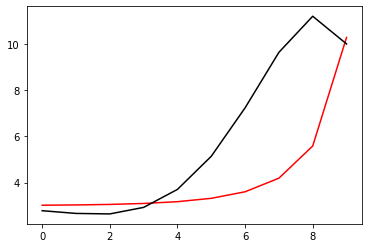

2412 2.6637329570929973 -1.004636186197697
[ 2.77804499  2.65934323  2.63693452  2.91858202  3.69761772  5.1358668
  7.24541436  9.66520016 11.24170568 10.01954768]


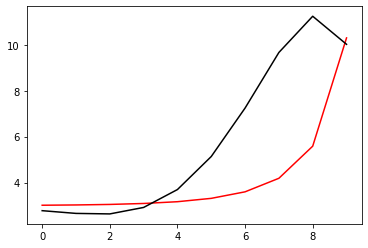

2613 0.10801693763200683 -1.004490055999527
[ 2.77895119  2.65981438  2.63636942  2.91644049  3.69389767  5.132095
  7.2477977   9.67703559 11.2625187  10.01989004]


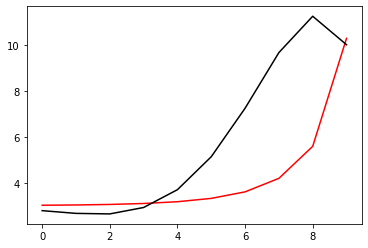

2814 0.105988648320169 -1.0043557899514928
[ 2.77982793  2.66028305  2.6358273   2.91434508  3.69023982  5.12836461
  7.25000837  9.68866593 11.28316111 10.02019842]


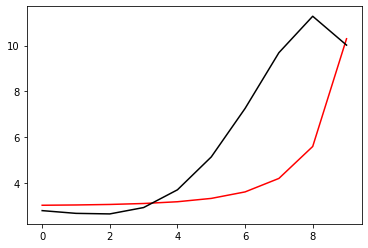

3015 0.15064186967683438 -1.004257612523391
[ 2.7807318   2.66080243  2.63535855  2.91234416  3.6866917   5.12471898
  7.25207508  9.70010072 11.30363732 10.0205391 ]


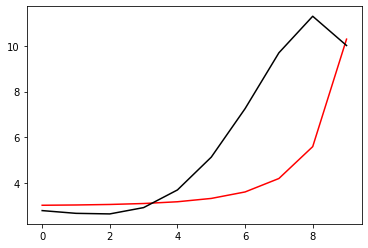

3216 2.100400124393854 -1.0041687865856546
[ 2.78160478  2.66131725  2.6349103   2.91038617  3.68320217  5.12111235
  7.253979    9.71133355 11.32394791 10.02083999]


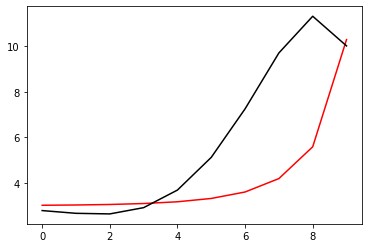

3417 0.10254424824420928 -1.004086754360796
[ 2.78244687  2.66182676  2.63448107  2.90846864  3.67976769  5.11754077
  7.25572224  9.72236424 11.34409414 10.02117641]


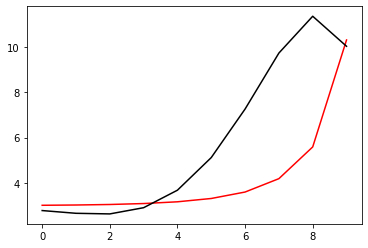

3618 0.10322297023806706 -1.0040123143559523
[ 2.78325661  2.66232827  2.63406691  2.90658606  3.67638109  5.11399654
  7.25730477  9.73319218 11.36407752 10.02147234]


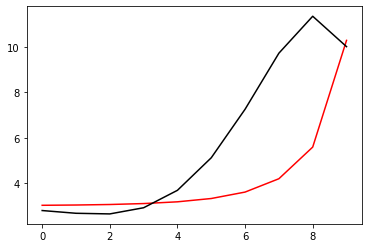

3819 1.1168020811916526 -1.0039463938743798
[ 2.78405639  2.66284569  2.63369396  2.9047676   3.67307599  5.11051641
  7.25875762  9.74383309 11.38390898 10.02180238]


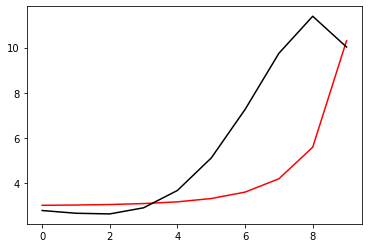

4020 1.1052543683838545 -1.0038850627638018
[ 2.78482481  2.6633545   2.63333393  2.90297989  3.66981234  5.10705617
  7.2600542   9.75427191 11.40358095 10.02209604]


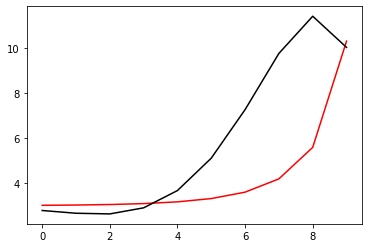

4221 2.1138205891433683 -1.00383875766077
[ 2.78558131  2.6638726   2.63300344  2.90123853  3.66660516  5.10362988
  7.26120811  9.76451476 11.42309835 10.02241759]


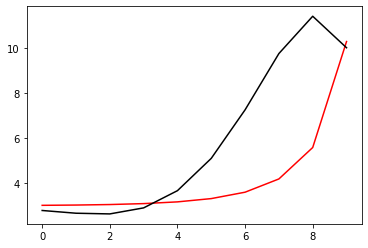

4422 2.714105374383161 -1.0039568252813635
[ 2.78637422  2.66445818  2.63277478  2.8996382   3.66358926  5.10043254
  7.26242862  9.77473301 11.44261015 10.02271054]


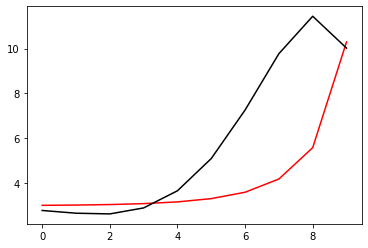

4623 0.10504875945094375 -1.0040647898900683
[ 2.78713321  2.66502994  2.63255103  2.89805658  3.66059675  5.09723026
  7.2634846   9.78473928 11.46195757 10.0230316 ]


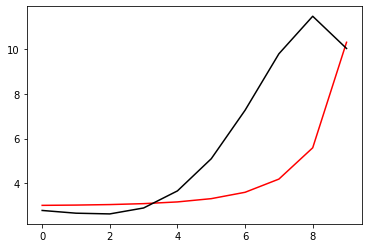

4824 0.10759008621647546 -1.0041652648693988
[ 2.78786254  2.66559145  2.6323352   2.8964961   3.65762968  5.09402535
  7.26438236  9.79453668 11.48114382 10.02331598]


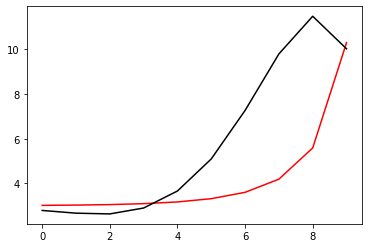

5025 0.14055459694545913 -1.0042992936381396
[ 2.78869666  2.66627437  2.63225748  2.89508703  3.65481879  5.09093489
  7.26519016  9.80414738 11.50017296 10.02363419]


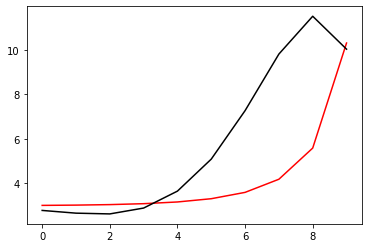

5226 2.1029734959461743 -1.004417913938847
[ 2.78949138  2.6669377   2.6321791   2.89369125  3.65202662  5.08783899
  7.26585169  9.81355869 11.51905096 10.02391271]


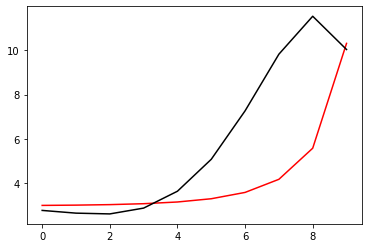

5427 0.11085605355633413 -1.0045174223119755
[ 2.7902494   2.66758385  2.63210228  2.89231079  3.64925505  5.08473959
  7.26637215  9.82277273 11.53777956 10.02422615]


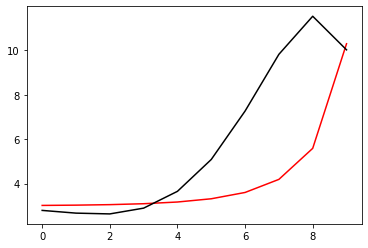

5628 0.11263042066089124 -1.004598524535371
[ 2.79097189  2.6682132   2.63202682  2.8909448   3.64650272  5.08163567
  7.26675539  9.83179177 11.55636104 10.02450104]


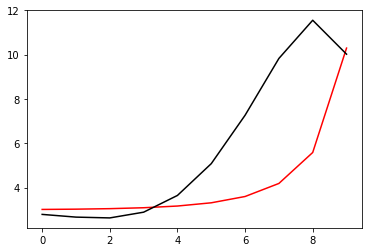

5829 1.1298006070092184 -1.004656312058899
[ 2.79167244  2.66884113  2.63197045  2.88961412  3.64379441  5.07855498
  7.26702708  9.84063114 11.57480607 10.02480794]


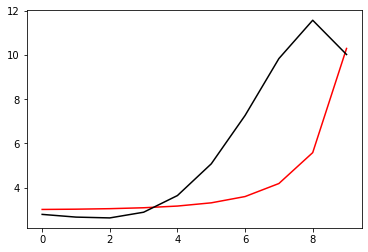

6030 1.135951373423329 -1.0046788813254646
[ 2.79234707  2.66946107  2.63192361  2.88830517  3.64111089  5.07547244
  7.26716736  9.84927461 11.59310143 10.02508151]


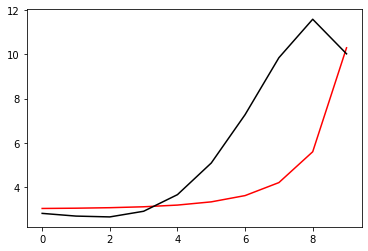

6231 2.1183977653782917 -1.0046836380598896
[ 2.79299073  2.67006645  2.63187853  2.88700946  3.63844428  5.07238473
  7.26718416  9.85773258 11.61125834 10.02537978]


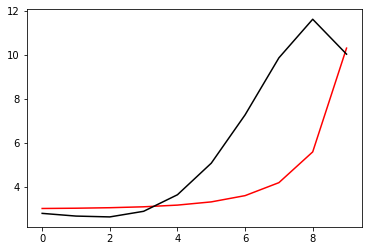

6432 2.5088586419393994 -1.0045513667420152
[ 2.79345848  2.67051288  2.63169544  2.88560026  3.63570181  5.06928196
  7.26718141  9.86616107 11.6294469  10.02565358]


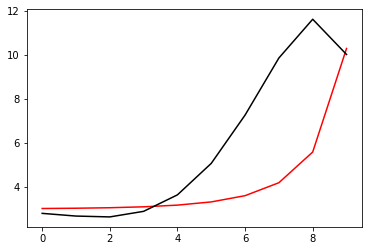

6633 0.11225575801024547 -1.0044200053759134
[ 2.79390925  2.67095853  2.63152785  2.88421745  3.63298688  5.06617684
  7.26705237  9.87439249 11.64748281 10.0259528 ]


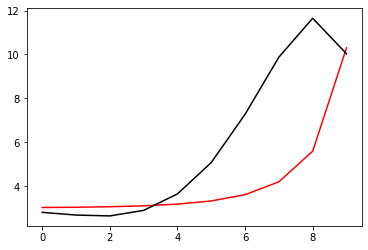

6834 0.10991856388946039 -1.0042985562597493
[ 2.79434534  2.67140499  2.63137688  2.88286202  3.63030097  5.06307293
  7.26680594  9.88243444 11.66537262 10.02621746]


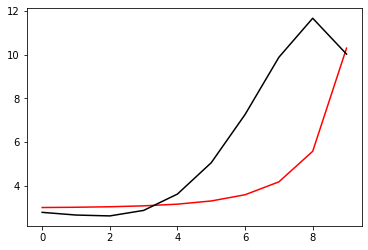

7035 0.14190732768535264 -1.0042029606188672
[ 2.79482475  2.67190734  2.63129535  2.8815851   3.62769334  5.06001303
  7.26647064  9.89029906 11.68312077 10.02651519]


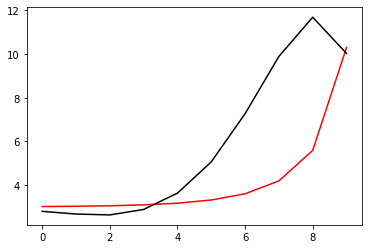

7236 2.1034506651240954 -1.004116299934979
[ 2.79528534  2.6724061   2.63122634  2.88033224  3.62511295  5.05695681
  7.26603167  9.89798657 11.70073307 10.02677379]


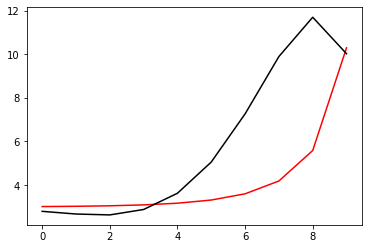

7437 0.10605355007160949 -1.0040360160189508
[ 2.79572637  2.67290004  2.6311684   2.8791019   3.62255836  5.05390376
  7.2654928   9.90550012 11.71821173 10.02706773]


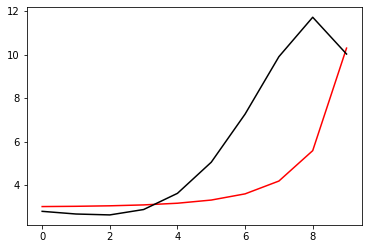

7638 0.10660515348577868 -1.003962965824822
[ 2.7961454   2.67338579  2.63111742  2.87788941  3.62002467  5.05085025
  7.264856    9.91284249 11.73555913 10.02732288]


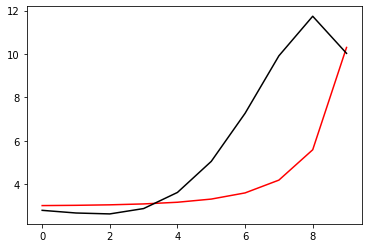

7839 1.1166532339777142 -1.0038976614201458
[ 2.79656258  2.67388469  2.63109657  2.87672038  3.6175402   5.04782533
  7.26414628  9.92002928 11.75278506 10.02761094]


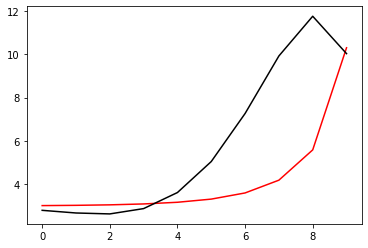

8040 1.1086043714645917 -1.003836539085548
[ 2.79695807  2.67437465  2.63108133  2.87556758  3.61507499  5.0447997
  7.26334586  9.92705118 11.76988367 10.02786519]


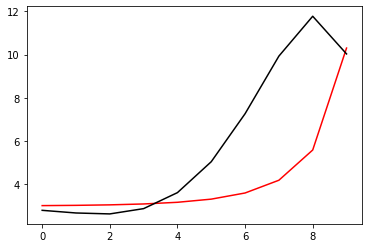

8241 2.113104505865872 -1.0037892920204918
[ 2.79734904  2.67487087  2.63108529  2.8744434   3.6126405   5.04178384
  7.2624652   9.9339152  11.78685933 10.02814546]


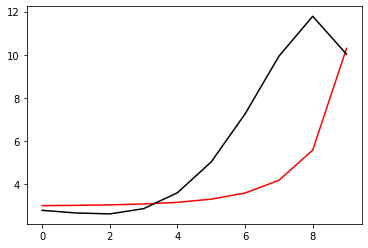

8442 2.6278585624697155 -1.0039238090336045
[ 2.79782996  2.67548043  2.63123221  2.87349545  3.61041959  5.03899937
  7.26172667  9.94081015 11.80387523 10.02840023]


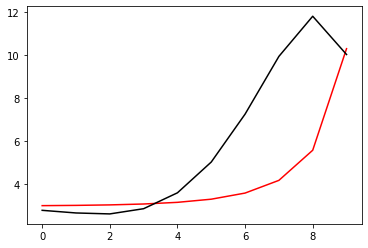

8643 0.10814357821325446 -1.0040457215447904
[ 2.79828076  2.67607027  2.63137194  2.87254867  3.60819954  5.03619351
  7.26088791  9.94753422 11.82075661 10.0286817 ]


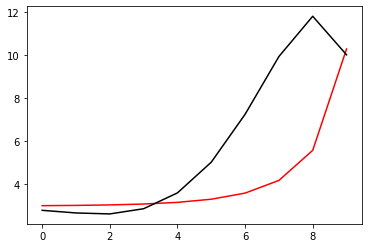

8844 0.11055232667140032 -1.0041575612168543
[ 2.79870502  2.67664327  2.63150689  2.87160533  3.60598271  5.03336932
  7.2599542   9.95409152 11.83750581 10.02892809]


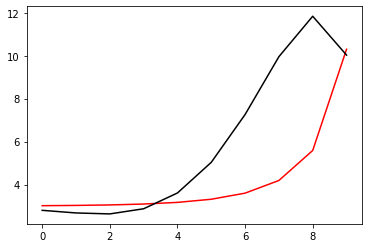

9045 0.1347631789146872 -1.0042851226327214
[ 2.79921457  2.67730738  2.63174181  2.87076714  3.60386543  5.03060662
  7.25897302  9.96049985 11.85412516 10.02920832]


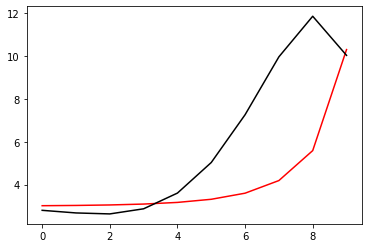

9246 2.1057760150519638 -1.0043977695428998
[ 2.79969239  2.6779503   2.63196901  2.86993142  3.60175302  5.02783154
  7.25791028  9.96675399 11.87062118 10.029449  ]


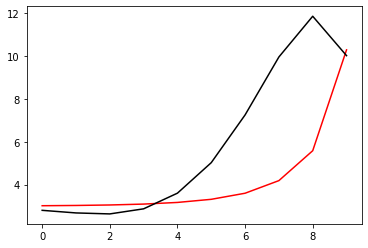

9447 0.1149635178983147 -1.0044909219274236
[ 2.80014107  2.67857435  2.63219078  2.86910057  3.59964798  5.02504657
  7.25676952  9.97285613 11.886994   10.02972599]


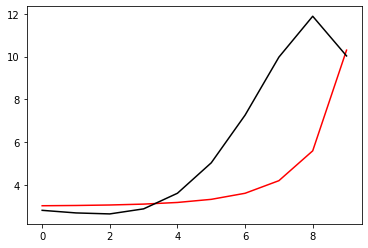

9648 0.11663717768080284 -1.0045651471565389
[ 2.80056149  2.67917973  2.63240684  2.86827411  3.59754988  5.02225202
  7.25555362  9.97880911 11.90324499 10.02996327]


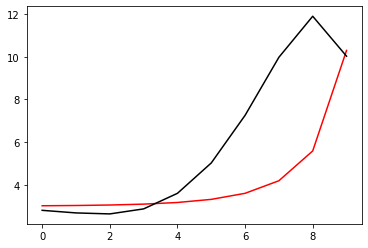

9849 1.1314527225090452 -1.0046151830729275
[ 2.80096656  2.67978082  2.63263345  2.8674706   3.59547953  5.01946936
  7.25428164  9.98462612 11.91938236 10.03023497]


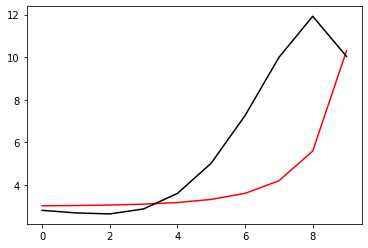

In [116]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.118572315713911 -1.0046205099561962
[ 2.80224829  2.68120553  2.63215401  2.86582395  3.59159847  5.01399791
  7.25101105  9.9933468  11.94618164 10.03064862]


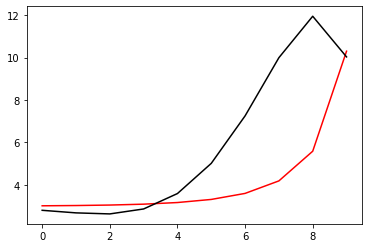

402 2.4224043745524386 -1.0044992144624674
[ 2.80243363  2.68155576  2.63218459  2.86484693  3.58945269  5.0111939
  7.24956475  9.99882545 11.96228879 10.03090131]


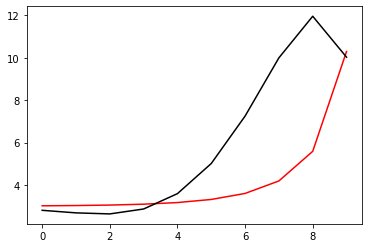

603 0.11510430696423775 -1.004375910582421
[ 2.8026108   2.68194245  2.63228635  2.8639611   3.58740709  5.0084908
  7.24817274 10.00426506 11.97833972 10.03115798]


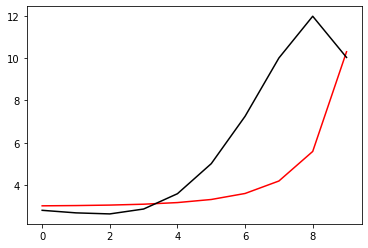

804 0.11230014340192714 -1.004261578103806
[ 2.80276957  2.68233151  2.63240829  2.86310672  3.58539183  5.00580449
  7.24675198 10.0095973  11.99427369 10.03139289]


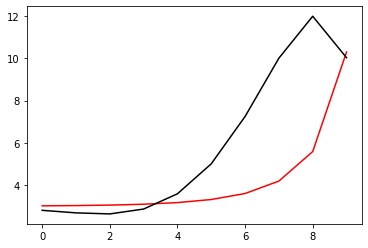

1005 0.13656595127933863 -1.0041667554127967
[ 2.80296952  2.68277109  2.63258994  2.86231753  3.58343306  5.00314695
  7.2452983  10.01480875 12.01007396 10.03166731]


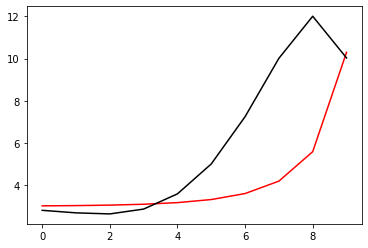

1206 2.1050984515049427 -1.0040808011277005
[ 2.80315693  2.68320739  2.63277896  2.86154468  3.58148727  5.00048355
  7.24379166 10.01989244 12.02574085 10.03188903]


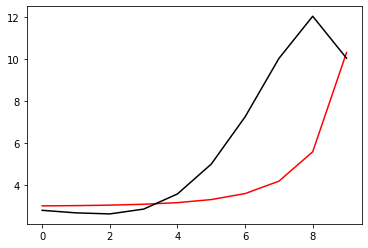

1407 0.1081632600454871 -1.0040010230147651
[ 2.8033322   2.68363877  2.63297255  2.86078525  3.57955182  4.99781165
  7.2422298  10.02484693 12.041274   10.03215566]


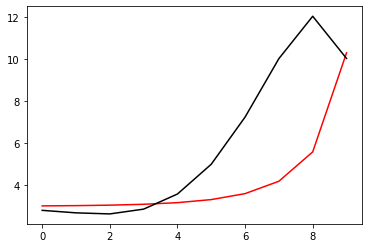

1608 0.10862479231713736 -1.0039284179008479
[ 2.80349301  2.68406123  2.63316566  2.86003399  3.57762208  4.99512791
  7.24061165 10.02967312 12.05667568 10.03238238]


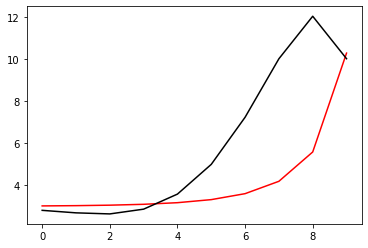

1809 1.1164967843930078 -1.0038630744781047
[ 2.80365833  2.68449409  2.63337855  2.8593126   3.57572116  4.99245483
  7.23895544 10.03438397 12.07195568 10.03263706]


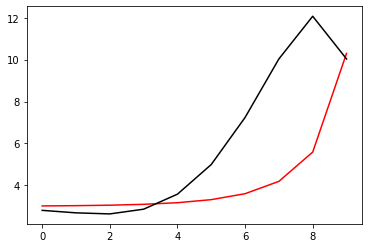

2010 1.1106182688834154 -1.0038017112183597
[ 2.8038099   2.68491725  2.6335895   2.8585982   3.57382616  4.98977202
  7.23724719 10.03897189 12.08711012 10.0328615 ]


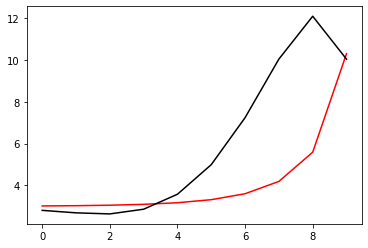

2211 2.111900234818253 -1.003753632868057
[ 2.80396111  2.6853415   2.63380709  2.85789777  3.57194331  4.98708559
  7.23549322 10.04344308 12.10214485 10.03310973]


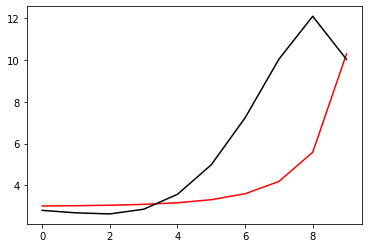

2412 2.566389985118578 -1.0039000998670506
[ 2.80425427  2.68592202  2.63420193  2.85740131  3.57028631  4.98462838
  7.23392024 10.04799845 12.11723883 10.03333559]


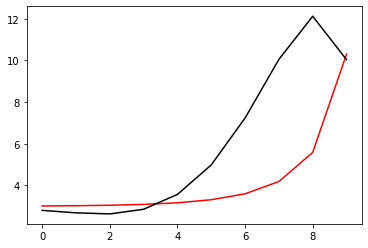

2613 0.11018084570238347 -1.004031997835079
[ 2.80451976  2.68647678  2.63457704  2.85689283  3.568616    4.98214355
  7.23228262 10.0524236  12.13220215 10.03358601]


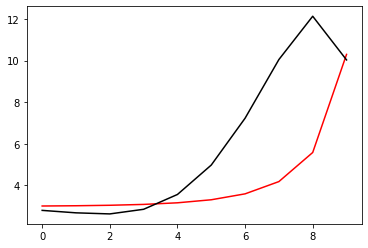

2814 0.11246597498813682 -1.004151890466813
[ 2.80476101  2.68700853  2.63493472  2.85637445  3.56693485  4.97963435
  7.23058445 10.05672273 12.14703844 10.03380276]


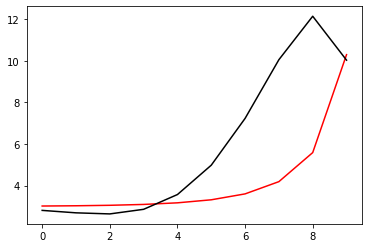

3015 0.13208760910758538 -1.0042762002301413
[ 2.80506806  2.68760249  2.63535546  2.85592142  3.5653106   4.97715451
  7.22885827 10.06090978 12.161751   10.03405287]


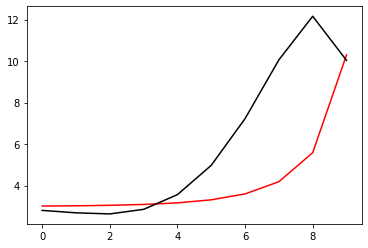

3216 2.107451322132711 -1.0043853910131346
[ 2.8053501   2.68817402  2.63576101  2.85546289  3.56368295  4.97466114
  7.22708507 10.06498446 12.17634816 10.0342634 ]


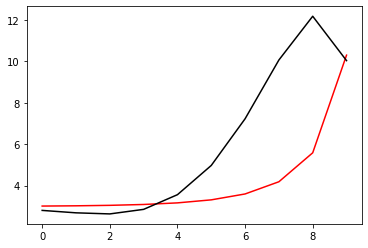

3417 0.1178197049688651 -1.0044739845285708
[ 2.8056098   2.68872566  2.63615385  2.8550013   3.56205445  4.97215674
  7.22526706 10.06894843 12.19083044 10.03451116]


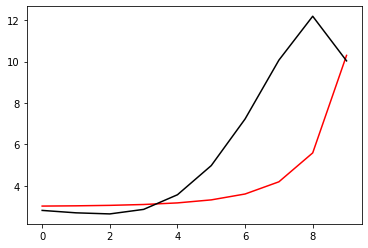

3618 0.11937085454646885 -1.0045425873758618
[ 2.80584793  2.68925765  2.63653381  2.85453635  3.56042513  4.96964212
  7.22340636 10.07280459 12.20520018 10.03471802]


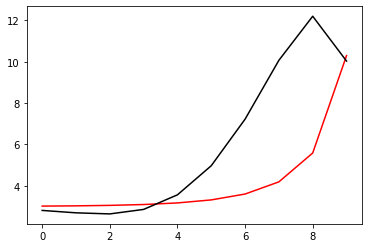

3819 1.1327340580454117 -1.0045855638845984
[ 2.80607681  2.68978357  2.63691584  2.85408436  3.55881247  4.96713457
  7.22151787 10.07656434 12.21946543 10.03496126]


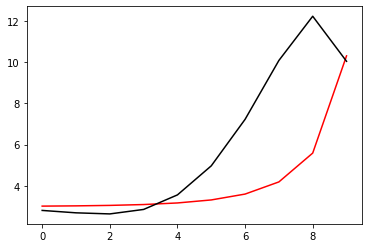

4020 1.1438792380565606 -1.0045872769629896
[ 2.80629585  2.69030095  2.63729536  2.8536383   3.55720679  4.96462192
  7.2195886  10.08021535 12.23361382 10.03516701]


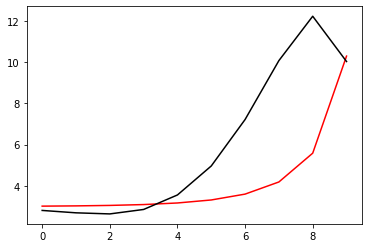

4221 2.1180608988730336 -1.0045710120632134
[ 2.80649319  2.69079629  2.63765778  2.85318377  3.55559623  4.96209861
  7.21762242 10.08376895 12.24765933 10.03540322]


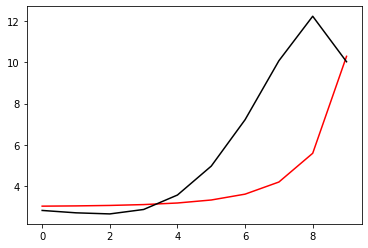

4422 2.365929864100522 -1.0044618058778445
[ 2.80655778  2.69116686  2.63791295  2.85265074  3.55394487  4.95958283
  7.21570091 10.0873508  12.26174541 10.03561009]


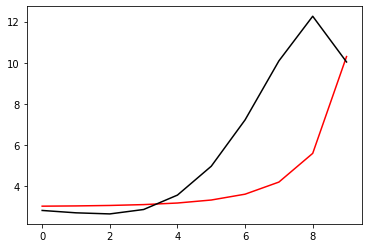

4623 0.1173405936388373 -1.004348284810231
[ 2.80661471  2.69152974  2.63816532  2.85212266  3.55229958  4.95706154
  7.2137402  10.09082758 12.27571648 10.0358468 ]


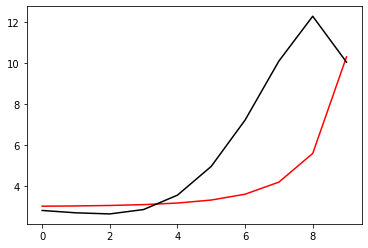

4824 0.11405825218644823 -1.0042415358940666
[ 2.80666712  2.69188742  2.63841689  2.8516014   3.55066278  4.95453865
  7.21174628 10.09420666 12.2895793  10.03604734]


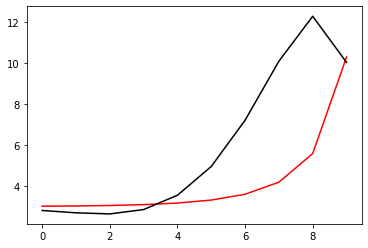

5025 0.13340236804368327 -1.004148596385909
[ 2.80676114  2.69228237  2.63870654  2.85112211  3.54906514  4.95203814
  7.2097345  10.09749589 12.30333636 10.03628219]


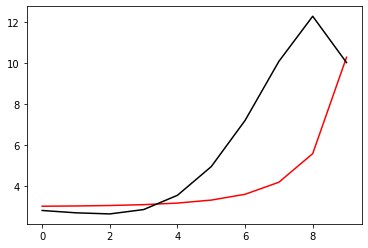

5226 2.1061179142146726 -1.0040640004324697
[ 2.80684718  2.69266912  2.63899308  2.85064854  3.54747718  4.94954072
  7.20769858 10.10069925 12.3169957  10.03647921]


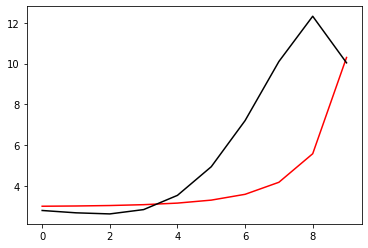

5427 0.10965663866974523 -1.0039849974125818
[ 2.80692468  2.69304695  2.63927569  2.85017988  3.54589835  4.9470464
  7.20563957 10.10381864 12.33055845 10.03671022]


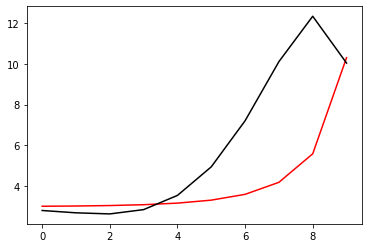

5628 0.11003929066778229 -1.0039128278834573
[ 2.80699061  2.69341229  2.63955031  2.84971188  3.54432484  4.94455271
  7.20355739 10.10685616 12.34402672 10.03690605]


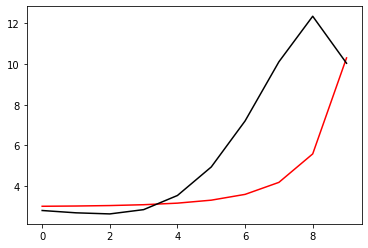

5829 1.1163252648724795 -1.0038472425883922
[ 2.80706174  2.69378251  2.63983497  2.84926311  3.54277538  4.94207727
  7.20146687 10.10982331 12.35740853 10.03713141]


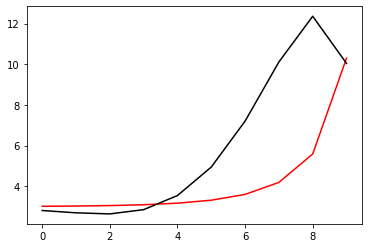

6030 1.112076997008363 -1.0037852765010962
[ 2.80712223  2.69414073  2.64011173  2.8488149   3.5412315   4.93960369
  7.1993563  10.11271341 12.37069917 10.03732814]


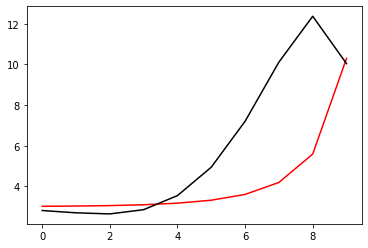

6231 2.110489542252517 -1.0037358569984325
[ 2.80717988  2.69449214  2.64038344  2.84836831  3.53969341  4.93713267
  7.19722828 10.11553109 12.38390327 10.03754638]


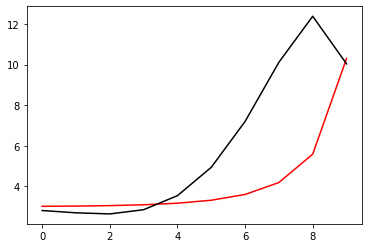

6432 2.514276710276555 -1.0038883796751124
[ 2.80741753  2.69503067  2.64085593  2.84814228  3.53839338  4.93490368
  7.19531286 10.11848456 12.39720854 10.03774503]


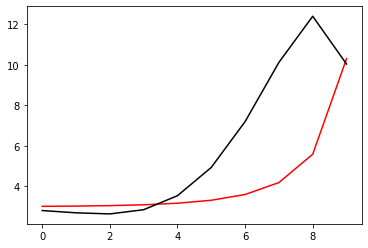

6633 0.1117191840378818 -1.0040252015698812
[ 2.80762687  2.69553817  2.64130003  2.84789497  3.53707639  4.93265494
  7.19336025 10.12134958 12.41041151 10.037967  ]


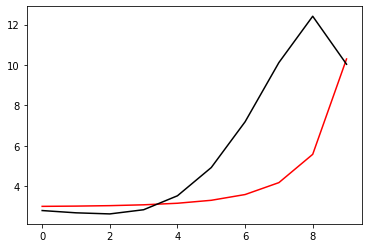

6834 0.11388528114074535 -1.004148936400524
[ 2.80781134  2.69601757  2.64171815  2.8476284   3.5357444   4.93038865
  7.19137315 10.12412936 12.42351457 10.03815684]


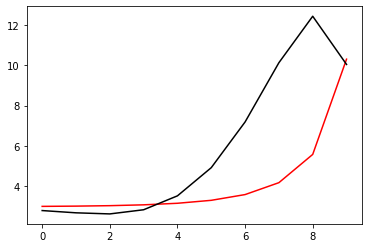

7035 0.1309321957224076 -1.0042694093743338
[ 2.80804013  2.69653332  2.64216991  2.84739682  3.53444458  4.9281413
  7.18937404 10.12683413 12.43651973 10.03837995]


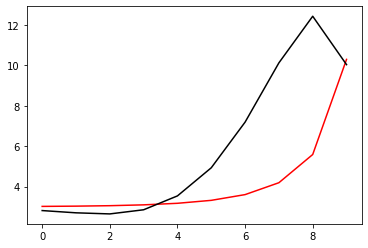

7236 2.1085136023657025 -1.0043748138070272
[ 2.80824761  2.69702609  2.6426023   2.84715415  3.53313968  4.92588783
  7.18735278 10.12946608 12.44943471 10.03856384]


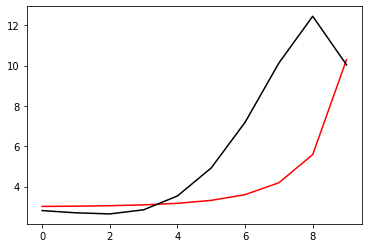

7437 0.11984094808755125 -1.0044587814501031
[ 2.80843658  2.69749866  2.64301797  2.8469028   3.53183178  4.92362977
  7.18531021 10.13202563 12.46225862 10.03878588]


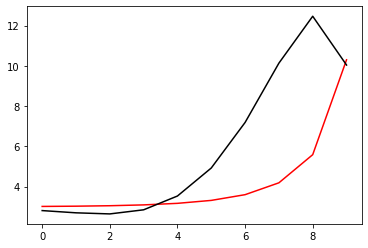

7638 0.1212321585743298 -1.0045219960025447
[ 2.80860782  2.69795146  2.64341697  2.8466426   3.53052076  4.92136741
  7.1832475  10.13451491 12.47499304 10.03896638]


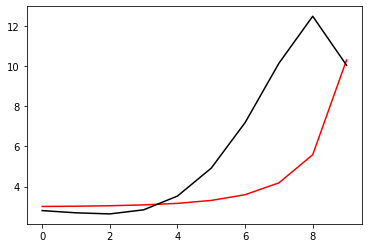

7839 1.133434856100491 -1.004558507309359
[ 2.80877274  2.69839692  2.64381266  2.84638764  3.52922106  4.91911447
  7.18117635 10.13694324 12.4876445  10.03918499]


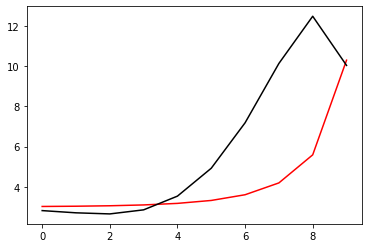

8040 1.1453717248051094 -1.0045514457052047
[ 2.80893181  2.69883396  2.64420207  2.84613279  3.52792514  4.91686101
  7.1790852  10.13929881 12.50020053 10.03936474]


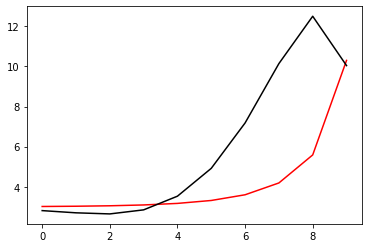

8241 2.1169201612824473 -1.0045268342704492
[ 2.80907064  2.69924677  2.6445686   2.84586189  3.52661971  4.91460004
  7.17697637 10.14159242 12.51267561 10.03957723]


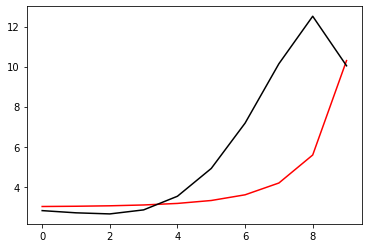

8442 2.329262597473562 -1.004426523641703
[ 2.80910649  2.69956261  2.64485265  2.84553408  3.5252921   4.91236005
  7.1749264  10.1439379  12.52520084 10.03975864]


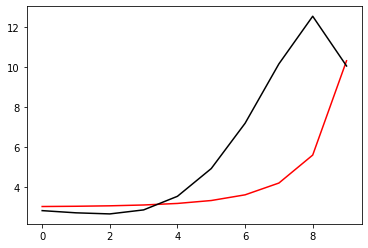

8643 0.11875555107728787 -1.004319822874382
[ 2.80913566  2.6998683   2.64512777  2.84520304  3.52396497  4.91011709
  7.17285622 10.14621365 12.53763281 10.03997166]


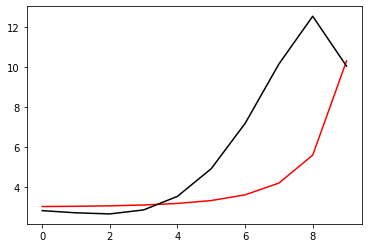

8844 0.11524882156570479 -1.0042187535052478
[ 2.80916144  2.70016656  2.64539612  2.84487067  3.52264052  4.90787437
  7.17077065 10.14842603 12.54997777 10.04014806]


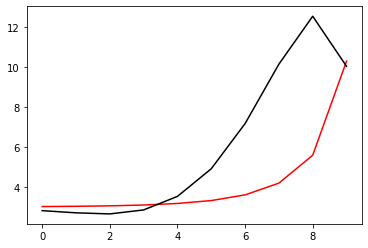

9045 0.13106570101231746 -1.0041274803922928
[ 2.80922021  2.70049035  2.64568728  2.84456305  3.52134083  4.90564885
  7.16868054 10.15058077 12.56223746 10.04035927]


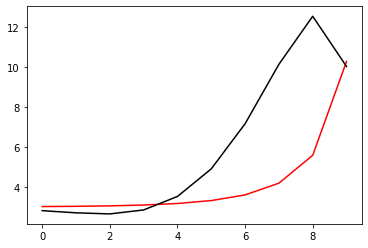

9246 2.106790665638136 -1.0040442818618849
[ 2.80927342  2.7008053   2.64597104  2.84425452  3.52004598  4.9034283
  7.16658281 10.15268257 12.57441991 10.04053335]


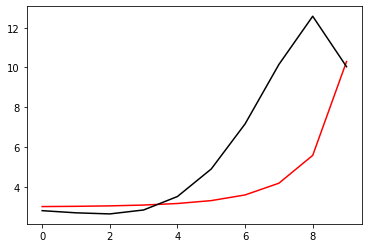

9447 0.11073460378677502 -1.0039662747893408
[ 2.80932083  2.70111118  2.64624709  2.84394471  3.51875565  4.90121259
  7.16447782 10.15473243 12.58652561 10.04074089]


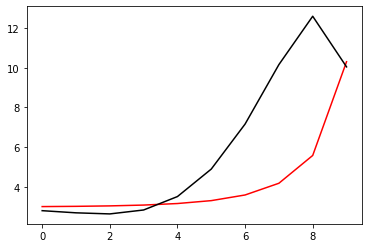

9648 0.11112891017604395 -1.0038949013436607
[ 2.80935941  2.70140457  2.64651166  2.8436297   3.5174663   4.89899925
  7.1623649  10.15673172 12.59855629 10.04091479]


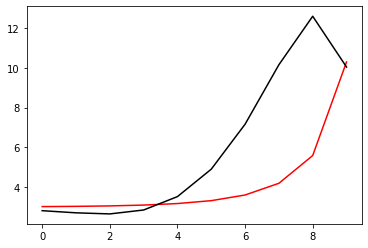

9849 1.1162402748223192 -1.0038296009552667
[ 2.80940347  2.70170028  2.64677994  2.84332487  3.51619306  4.8968024
  7.16025607 10.15869015 12.61051911 10.04111696]


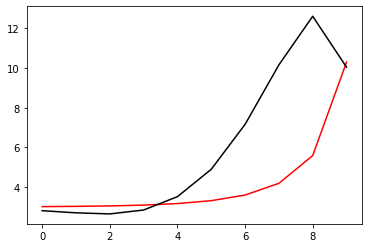

In [117]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.108391977071415 -1.003807889102454
[ 2.81031735  2.70277594  2.64750401  2.84274453  3.51366388  4.89248564
  7.15593914 10.161127   12.63003782 10.04141854]


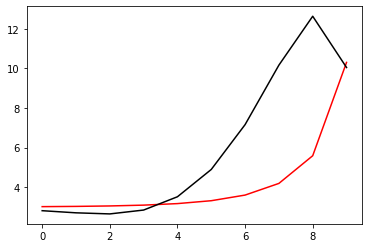

402 2.3970059895037275 -1.0040212246527058
[ 2.81091806  2.70337559  2.64785371  2.84236557  3.51222736  4.89008364
  7.15357453 10.162679   12.6415923  10.04159773]


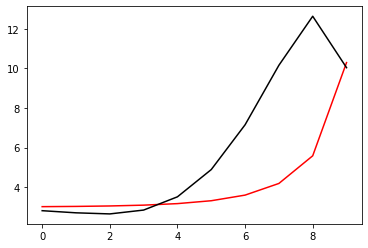

603 0.11443232237819331 -1.0041066458274508
[ 2.81117556  2.70369033  2.64797618  2.8418213   3.51068606  4.8876296
  7.1511957  10.1642226  12.65314874 10.0417906 ]


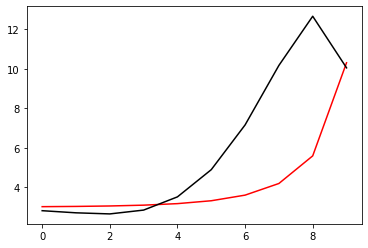

804 0.1170871188934522 -1.0043080532736217
[ 2.81167581  2.70425804  2.64836215  2.84155247  3.50942443  4.88544012
  7.14903841 10.16591153 12.66479307 10.04196386]


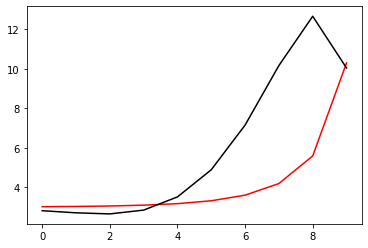

1005 0.13209780569198476 -1.0043527266049137
[ 2.81182055  2.70452151  2.64849447  2.84108248  3.50801327  4.88315065
  7.14682357 10.16754911 12.67637925 10.04215197]


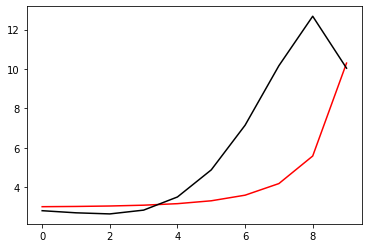

1206 2.1115344464560644 -1.004495274172637
[ 2.81221225  2.70502486  2.64886161  2.84084443  3.50682594  4.88106305
  7.14476835 10.16927393 12.68799402 10.04232517]


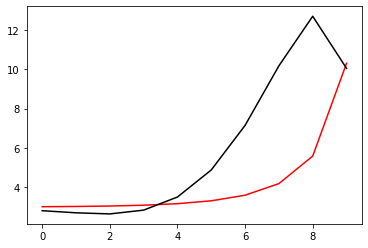

1407 0.12543724139810092 -1.0045304783822704
[ 2.81234315  2.70530706  2.64904702  2.84046526  3.50553636  4.87890873
  7.14267401 10.17095264 12.69954559 10.0425224 ]


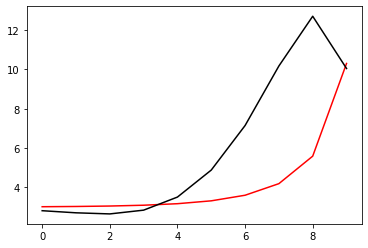

1608 0.12624821459605873 -1.0045788495416914
[ 2.81264461  2.70574617  2.64937873  2.84022481  3.50437495  4.87686271
  7.14065412 10.172645   12.71106034 10.0426835 ]


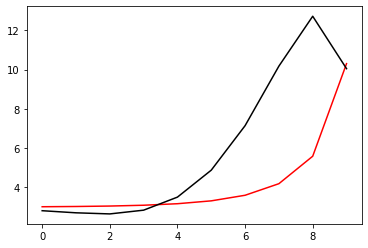

1809 1.1376957848834914 -1.00459002964191
[ 2.81276524  2.70603649  2.64959406  2.83990165  3.50316284  4.87479412
  7.1386308  10.17431908 12.72253376 10.04288331]


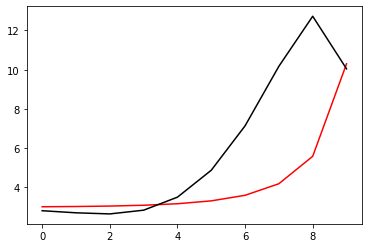

2010 1.1456882843189182 -1.0045207232447717
[ 2.81300102  2.70642699  2.64989806  2.83965913  3.50202175  4.87278024
  7.1366352  10.17596842 12.73393792 10.04304589]


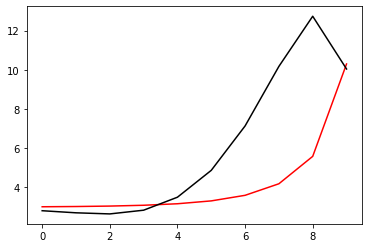

2211 2.1154508167197776 -1.004486364735217
[ 2.81312482  2.70672658  2.65013352  2.83937286  3.50086146  4.87076919
  7.13465656 10.17761637 12.74531508 10.04324084]


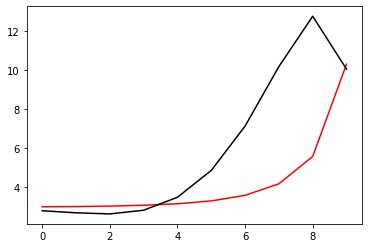

2412 2.3056698189936866 -1.0043400116516767
[ 2.81323073  2.70700423  2.65034928  2.8390777   3.49971087  4.86879374
  7.13274035 10.17932344 12.75673557 10.04340507]


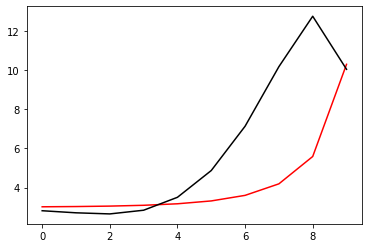

2613 0.11759732313239758 -1.004218147439997
[ 2.81329079  2.70724718  2.65054335  2.83877646  3.49856933  4.86683888
  7.13084763 10.18102689 12.76812192 10.04360142]


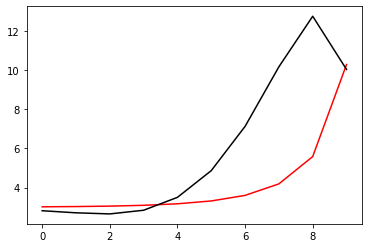

2814 0.11554350296093013 -1.0040992075916089
[ 2.81336165  2.70749271  2.65073535  2.83847286  3.49742625  4.86488122
  7.12894462 10.18268685 12.7794318  10.04376151]


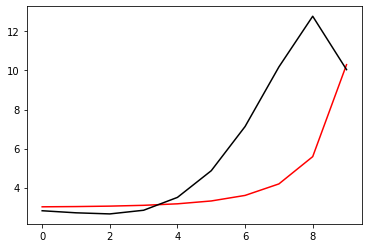

3015 0.13012197106747186 -1.0039914411201463
[ 2.81344566  2.70775354  2.65094732  2.83819694  3.49631792  4.86296063
  7.12707092 10.18433961 12.7906971  10.04395715]


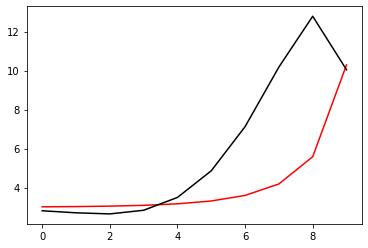

3216 2.1075209443247243 -1.003916952725265
[ 2.81354898  2.7080211   2.65115723  2.83791484  3.49520074  4.86102658
  7.12517314 10.18593311 12.80186855 10.04411512]


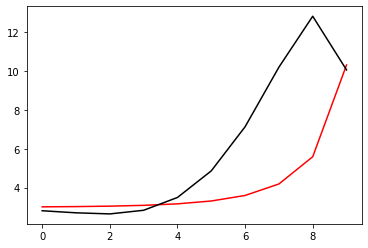

3417 0.11124266592838561 -1.0038207216773065
[ 2.8136063   2.70825564  2.6513497   2.8376349   3.49410726  4.85913713
  7.1233338  10.18756739 12.81305351 10.04430852]


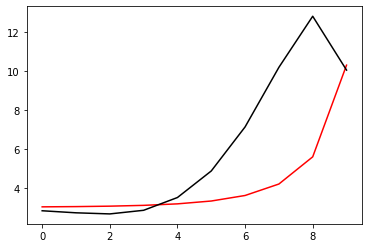

3618 0.11225544907474207 -1.003753981975207
[ 2.81367005  2.70848362  2.65152633  2.83733449  3.49299022  4.8572191
  7.12145491 10.1891272  12.824129   10.04446676]


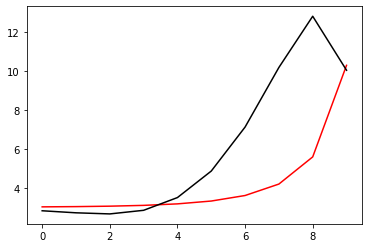

3819 1.1165753463903199 -1.0036636419870617
[ 2.81372712  2.70870966  2.65170853  2.83705117  3.49190326  4.85534237
  7.11962079 10.19070605 12.8351912  10.04465547]


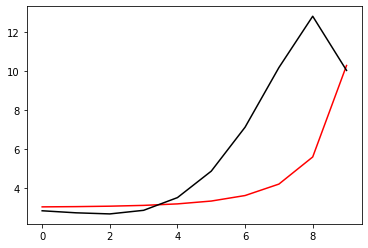

4020 1.1138550688691686 -1.0036360563105335
[ 2.8138018   2.70893993  2.65188507  2.83675688  3.4908016   4.85344529
  7.11775457 10.19221743 12.84614999 10.04481535]


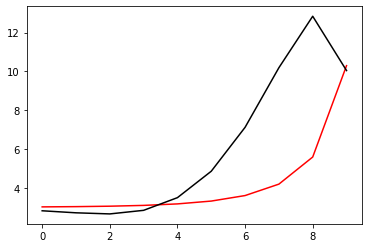

4221 2.1112549708908315 -1.0035590907419734
[ 2.81384254  2.70914088  2.65204037  2.83645503  3.48971043  4.85157929
  7.11593638 10.19376487 12.85712048 10.04499866]


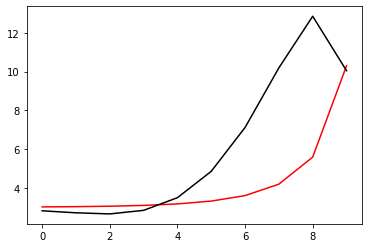

4422 2.5036418218256244 -1.00374087871542
[ 2.81414936  2.70959824  2.6524451   2.83639925  3.48886164  4.84994529
  7.11432526 10.19546486 12.86818921 10.04516141]


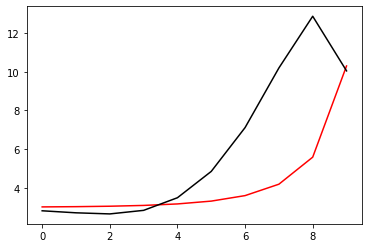

4623 0.11336385892811641 -1.003839723192471
[ 2.81442764  2.71002827  2.65282671  2.83632941  3.48801096  4.84832237
  7.11273356 10.19716572 12.87923038 10.0453507 ]


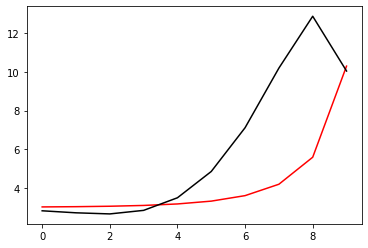

4824 0.11590425148573597 -1.004015367935582
[ 2.81466215  2.7104038   2.65314656  2.83619571  3.48709748  4.84663838
  7.11107927 10.19877984 12.89015499 10.04550419]


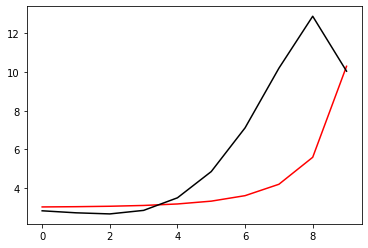

5025 0.127833968256216 -1.0040887655484743
[ 2.81494207  2.71081969  2.65350467  2.83610281  3.48622967  4.84500393
  7.10947176 10.20041198 12.90106165 10.04569679]


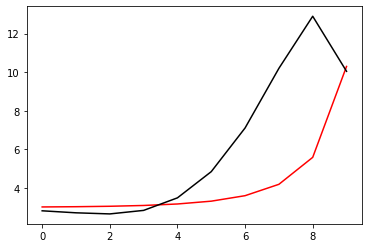

5226 2.108924993163024 -1.004246470193719
[ 2.81515534  2.71116249  2.65378638  2.83593526  3.48529226  4.84330598
  7.10780371 10.20196344 12.91185931 10.04584439]


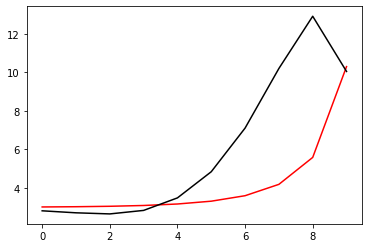

5427 0.11791867567591793 -1.0042895869519883
[ 2.81541348  2.71154599  2.65410722  2.83580975  3.48440222  4.84165983
  7.10618532 10.20353675 12.92264265 10.04603751]


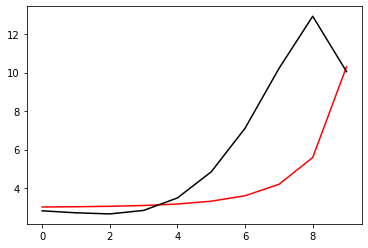

5628 0.12070620499722322 -1.0044017784959351
[ 2.81558454  2.71183953  2.65433793  2.83559875  3.48343473  4.83994558
  7.10450526 10.20503162 12.93332051 10.04618228]


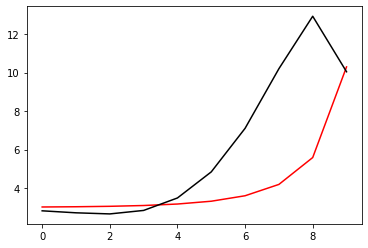

5829 1.1286149655767161 -1.0044090691932206
[ 2.81582765  2.71219791  2.65462894  2.83544821  3.48253044  4.83829641
  7.10288553 10.20655708 12.94399073 10.04637306]


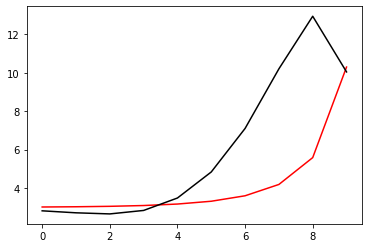

6030 1.1414775660360514 -1.0044409063628228
[ 2.81598514  2.71246963  2.65483431  2.8352172   3.48155341  4.83658241
  7.10120473 10.20800212 12.95455091 10.04651814]


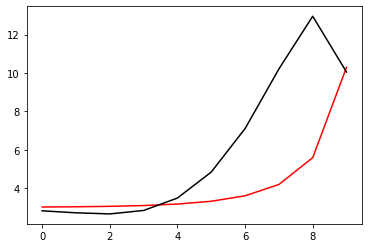

6231 2.1132840050233415 -1.0044065605515222
[ 2.81620362  2.71279099  2.65508134  2.83502593  3.48061922  4.83491697
  7.09957541 10.20947822 12.96510979 10.04670351]


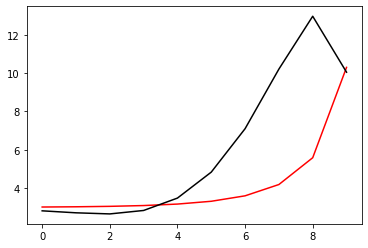

6432 2.282549408717252 -1.0043547281683765
[ 2.81630968  2.7130071   2.65523364  2.83475739  3.47963284  4.83323205
  7.09796159 10.21097975 12.9756813  10.04685178]


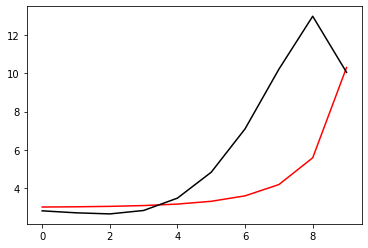

6633 0.12233844766148895 -1.004286587793631
[ 2.81649312  2.71328823  2.6554416   2.8345407   3.47869865  4.83160105
  7.09639948 10.21250825 12.98624406 10.04703685]


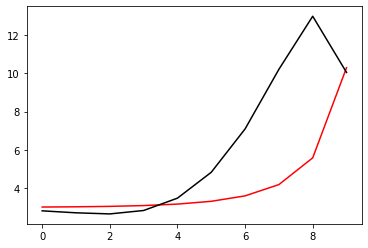

6834 0.11807678078863056 -1.004197268209731
[ 2.81658245  2.71347546  2.65555738  2.83423745  3.4776861   4.82990013
  7.09477195 10.21395363 12.99669383 10.04718295]


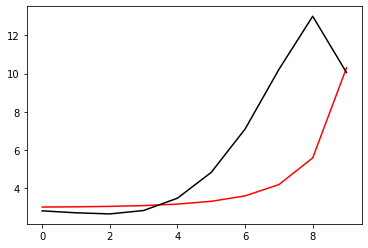

7035 0.12817865739517253 -1.004146812065361
[ 2.81677179  2.71374742  2.65574574  2.83400051  3.47673832  4.82826445
  7.09320682 10.21543683 13.00714512 10.04736522]


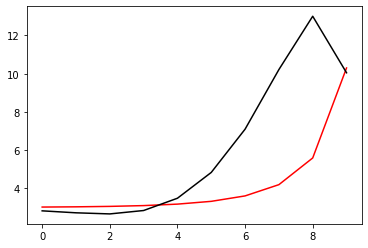

7236 2.1086502074834765 -1.0040482061934866
[ 2.81686658  2.71392576  2.65584288  2.83367877  3.4757151   4.82656341
  7.09158283 10.21684559 13.01749251 10.04751185]


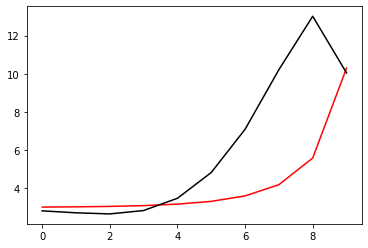

7437 0.11396481305980712 -1.0040141795642528
[ 2.81705359  2.71418297  2.65600836  2.83342071  3.47475586  4.82492916
  7.09002559 10.21829946 13.02784979 10.04768958]


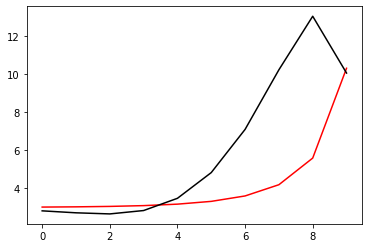

7638 0.11406774482809165 -1.0039163549238972
[ 2.81714513  2.71434498  2.65608039  2.8330752   3.47371865  4.8232279
  7.08840949 10.21968114 13.03810629 10.04783861]


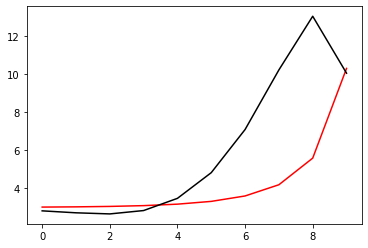

7839 1.1174481275848205 -1.0038928393673083
[ 2.81733443  2.71459182  2.65622697  2.83279974  3.47275198  4.8216002
  7.0868671  10.22111531 13.04837943 10.04801049]


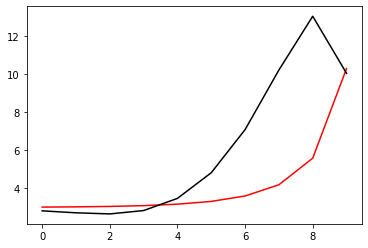

8040 1.1166062410834354 -1.0037974356951447
[ 2.81742995  2.71474437  2.65628022  2.83243642  3.47170687  4.81990565
  7.0852674  10.22248085 13.05855603 10.04816329]


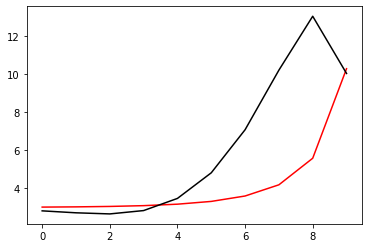

8241 2.107655825739717 -1.0037837637704699
[ 2.81760898  2.71496601  2.65639101  2.83212548  3.47071529  4.81827034
  7.08373209 10.22389578 13.06875003 10.04832863]


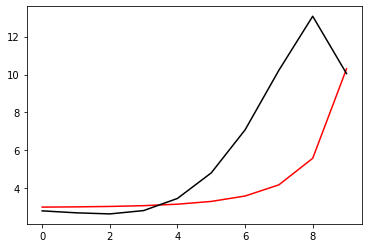

8442 2.3656534737154606 -1.003917946462726
[ 2.81790321  2.71530279  2.65661852  2.83193783  3.46985818  4.81678291
  7.08235415 10.22545358 13.07905252 10.04848553]


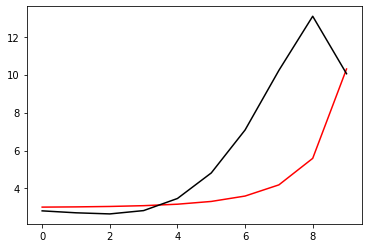

8643 0.11797125162018425 -1.0040956682250595
[ 2.81825385  2.71568334  2.6568795   2.83177919  3.46903126  4.81533063
  7.0810153  10.22703486 13.08934578 10.04865633]


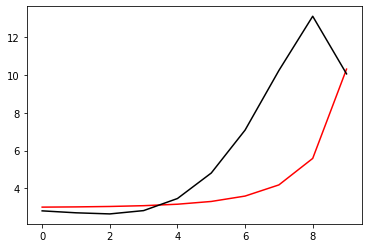

8844 0.11888358187220624 -1.0042002849208838
[ 2.81852712  2.71598377  2.6570589   2.8315421   3.46813332  4.81381746
  7.07962427 10.2285531  13.09954717 10.04880541]


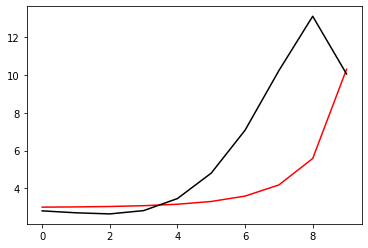

9045 0.13426756319852132 -1.004329585173002
[ 2.81884319  2.71631366  2.6572568   2.83131862  3.46725025  4.81232494
  7.07825965 10.23008477 13.10973062 10.04897953]


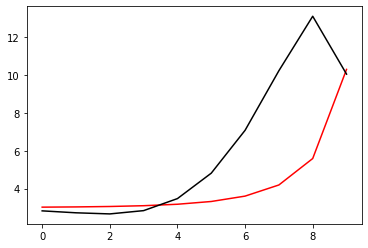

9246 2.1121746137521997 -1.0044022231492393
[ 2.81912009  2.71660127  2.65741035  2.83105301  3.46633119  4.8108045
  7.07687266 10.23157979 13.11984503 10.04912329]


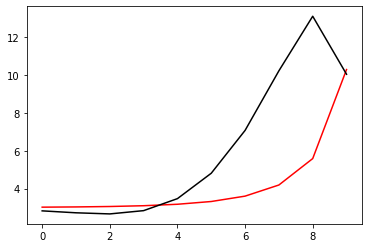

9447 0.1278871066298434 -1.0044769154481528
[ 2.81941476  2.71689559  2.65756167  2.83078229  3.46541052  4.80929108
  7.075502   10.23308205 13.12993732 10.0492989 ]


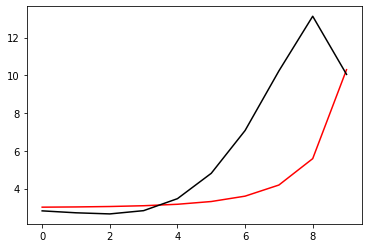

9648 0.12767334756137866 -1.0045055188484406
[ 2.81969588  2.71717201  2.65769162  2.83049093  3.4644738   4.80776794
  7.07412507 10.23456191 13.13997263 10.0494396 ]


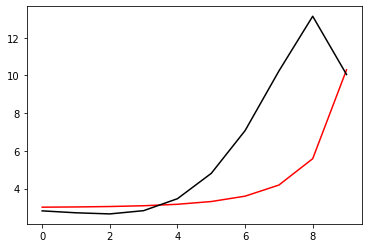

9849 1.136539366382387 -1.0045061497714938
[ 2.81997925  2.71744042  2.65780535  2.83018121  3.46352327  4.80624117
  7.07275599 10.23604313 13.14998106 10.04961456]


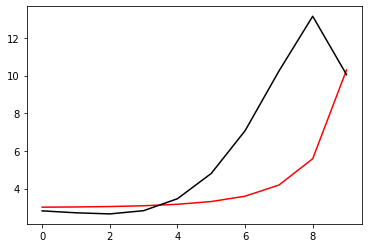

In [118]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.1103679619446005 -1.0042294658378734
[ 2.82118277  2.71830909  2.65815423  2.82961014  3.4617018   4.80324054
  7.06965482 10.23735125 13.16583674 10.04985756]


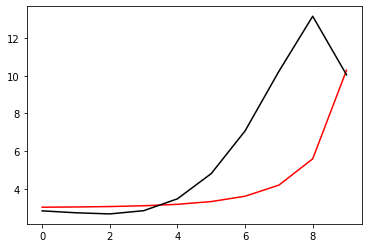

402 2.2611755603255648 -1.0042653953158982
[ 2.82186681  2.71873157  2.65819001  2.82903963  3.46036824  4.80126607
  7.0678145  10.23833493 13.17540189 10.0500021 ]


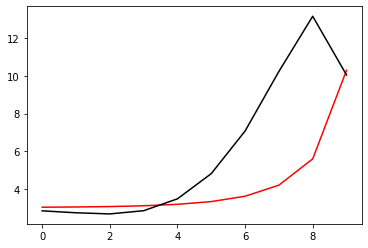

603 0.11945505051729755 -1.004063142355451
[ 2.82228116  2.71894655  2.65808248  2.82840107  3.45905333  4.79940225
  7.06616255 10.23951167 13.18503542 10.05016481]


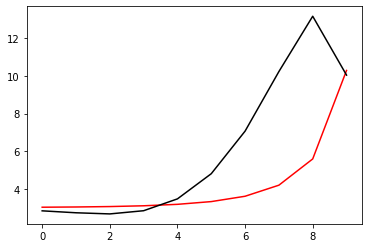

804 0.12166603449111635 -1.0042718778373596
[ 2.82290094  2.71940588  2.65823756  2.8280064   3.45789939  4.79751895
  7.06420071 10.24004481 13.19378512 10.05028365]


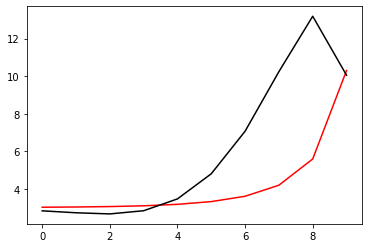

1005 0.128271810517811 -1.0041466458437658
[ 2.82250179  2.71888737  2.65745831  2.82673684  3.45596573  4.79501572
  7.06186079 10.24047169 13.20263568 10.05044839]


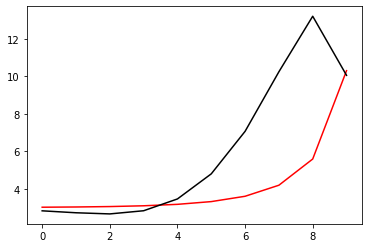

1206 2.1106992499703723 -1.0041964491414894
[ 2.82358446  2.71983712  2.65811542  2.82683625  3.45527262  4.79353258
  7.06021837 10.24124358 13.21159216 10.05056508]


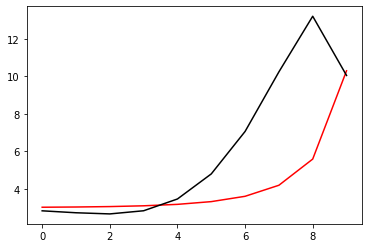

1407 0.11663659320412831 -1.004033692680804
[ 2.82459286  2.72054487  2.65838033  2.82642749  3.45400959  4.79149812
  7.05814088 10.24175099 13.22042367 10.05072311]


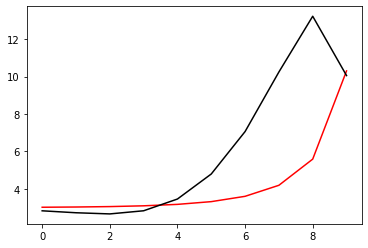

1608 0.11838071232159912 -1.0035565790276564
[ 2.82507653  2.72071232  2.65810562  2.8255234   3.45236709  4.78930205
  7.05622485 10.24274445 13.22990792 10.05085738]


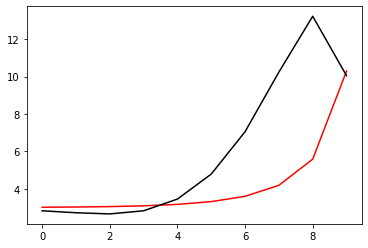

1809 1.1193530724575729 -1.0034854946427578
[ 2.82529887  2.72072484  2.65777694  2.82467     3.45088734  4.78738877
  7.05470923 10.24420788 13.23983632 10.05102575]


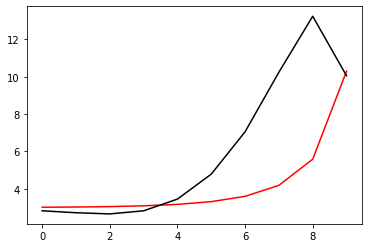

2010 1.1194235804350656 -1.0033837805321373
[ 2.82561995  2.72091606  2.65769213  2.8241008   3.44968776  4.78568028
  7.05323356 10.24548277 13.2493633  10.05116851]


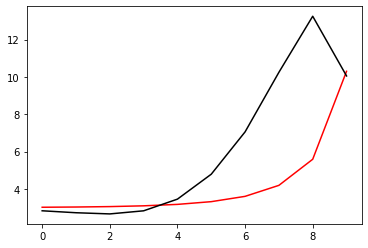

2211 2.114124315197305 -1.00357909662283
[ 2.82725569  2.72195554  2.65802804  2.82358655  3.44826054  4.78356723
  7.05129935 10.24633476 13.25850477 10.05131641]


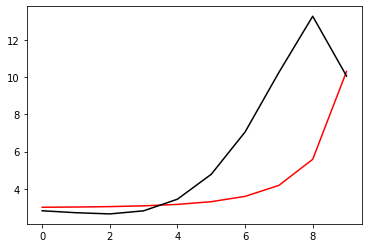

2412 2.3981520584304303 -1.0037179787842136
[ 2.82755159  2.72186231  2.65743582  2.82237182  3.44640846  4.78138175
  7.04972442 10.24795037 13.26861901 10.05147064]


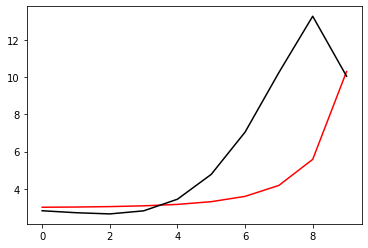

2613 0.11961286901254933 -1.004001498697571
[ 2.82811764  2.72224008  2.6574966   2.82196495  3.44547398  4.78015064
  7.04903882 10.25028535 13.27922669 10.05164882]


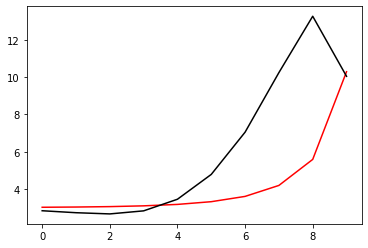

2814 0.12370375174385763 -1.0043337415609663
[ 2.82879872  2.72270654  2.65761027  2.82155614  3.44444548  4.77867041
  7.04787167 10.25186684 13.2888612  10.05178539]


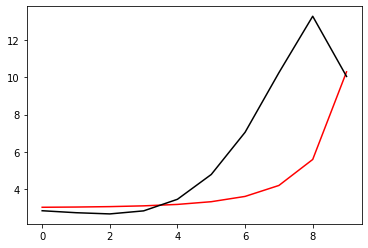

3015 0.12852554185980375 -1.0039474018081342
[ 2.83018986  2.72348759  2.65768083  2.82081597  3.44290323  4.77664391
  7.04630689 10.25331524 13.29857465 10.05195419]


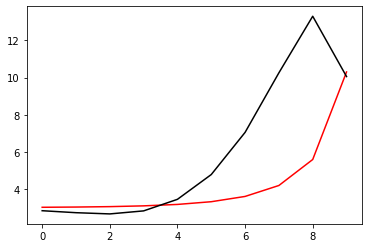

3216 2.11250016490929 -1.0038247258429374
[ 2.8304965   2.72344623  2.65717395  2.81973128  3.44123549  4.77469173
  7.04498137 10.25508825 13.30857741 10.05209474]


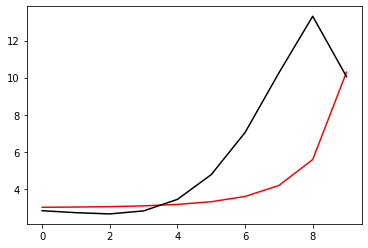

3417 0.11794208239290772 -1.0035907401923527
[ 2.83156112  2.7240284   2.65716562  2.81903679  3.439869    4.77297058
  7.04383247 10.25698414 13.31862578 10.05226863]


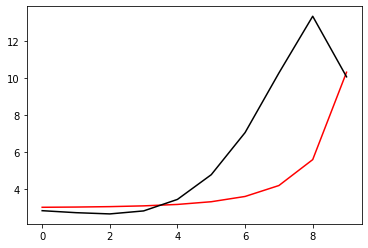

3618 0.13078735179015166 -1.0045037397217598
[ 2.83236246  2.72452652  2.65722919  2.81853623  3.4387629   4.77148958
  7.04279031 10.25876035 13.32832529 10.0524055 ]


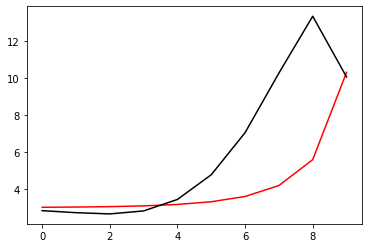

3819 1.1227016407352448 -1.0033296092272999
[ 2.83307353  2.72461957  2.65660457  2.81712887  3.4366339   4.76901937
  7.04097715 10.26009809 13.33784186 10.05256904]


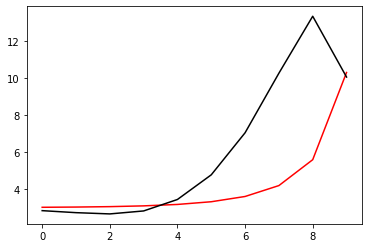

4020 1.1333112058806263 -1.0042446523985822
[ 2.83386283  2.72497259  2.65641213  2.81632185  3.43526968  4.76747197
  7.04022543 10.26257259 13.34845591 10.05272072]


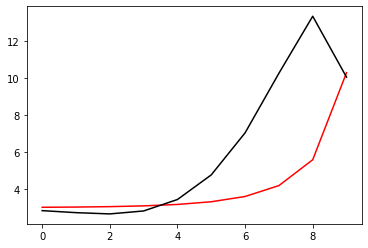

4221 2.115207460144003 -1.0043313956956006
[ 2.83498664  2.72563226  2.65649459  2.81575184  3.43408979  4.7660263
  7.0394495  10.26485989 13.35871639 10.05290081]


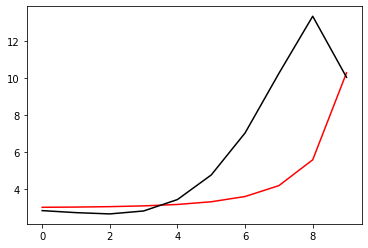

4422 2.2729040070239286 -1.0039604255116523
[ 2.83538339  2.725482    2.65569629  2.8142609   3.43199925  4.7637554
  7.03802615 10.26672192 13.36869546 10.05304625]


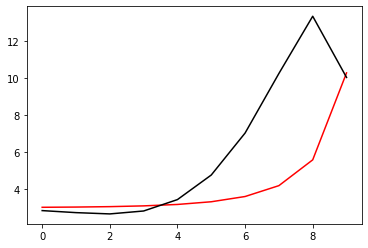

4623 0.12363424748623811 -1.0040869901611804
[ 2.8362487   2.72594353  2.65563278  2.8135968   3.43077507  4.76230505
  7.03726109 10.26897908 13.37879503 10.05321657]


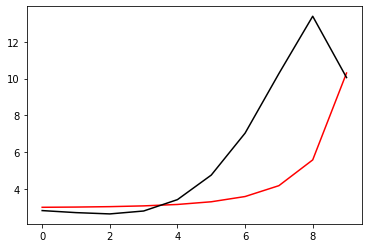

4824 0.12702142752156848 -1.0043753625137253
[ 2.83752288  2.72653357  2.6554423   2.81259948  3.42908736  4.76036917
  7.03612283 10.27106686 13.38888498 10.05335882]


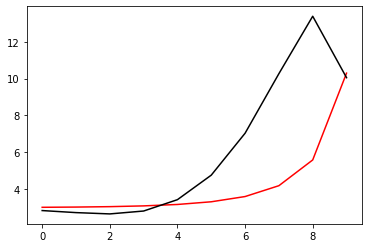

5025 0.1381318869530822 -1.0043240071273696
[ 2.83793602  2.72658236  2.6550006   2.81160024  3.42758602  4.75871883
  7.03525118 10.27328592 13.39892125 10.05353563]


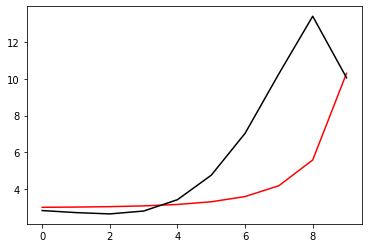

5226 2.1131661729754176 -1.004139756540202
[ 2.83876685  2.72690633  2.65470252  2.81063473  3.42603993  4.75698672
  7.03430934 10.27547531 13.40894188 10.05367522]


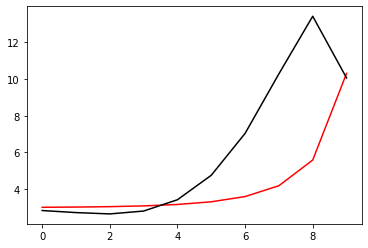

5427 0.12289151030157379 -1.004194089821879
[ 2.84015202  2.72777613  2.65494199  2.81020257  3.4250291   4.75579801
  7.03392195 10.27821737 13.41947725 10.05386004]


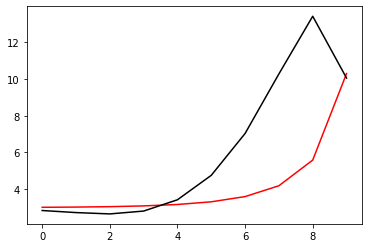

5628 0.12092808539648567 -1.0038273104107425
[ 2.84066825  2.72776083  2.65428564  2.80888224  3.42317037  4.75385263
  7.03293365 10.28054299 13.42971168 10.05400185]


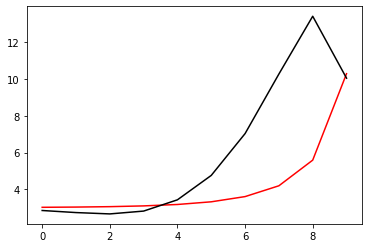

5829 1.1215182775320245 -1.003713640611881
[ 2.8410255   2.72775725  2.65378417  2.80781503  3.42158674  4.75208269
  7.03185956 10.28239892 13.43912664 10.05416871]


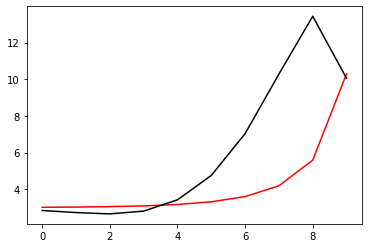

6030 1.1224703534086993 -1.003671462483611
[ 2.84173217  2.72795689  2.65335204  2.80671042  3.41990329  4.7502165
  7.03077704 10.28439466 13.44880894 10.05430803]


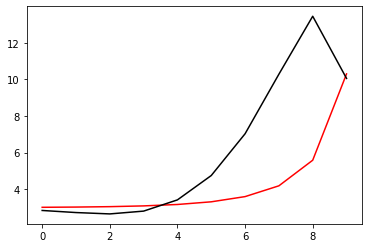

6231 2.11521677758849 -1.003638164080472
[ 2.84249786  2.72828684  2.65311252  2.80585255  3.41851139  4.74867475
  7.0300355  10.28672518 13.45879938 10.05447123]


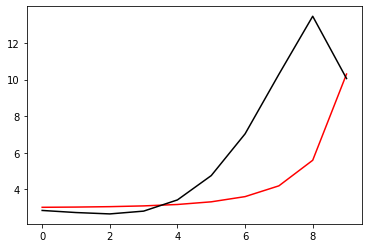

6432 2.242764077223871 -1.003957234521839
[ 2.84338686  2.72871374  2.65294641  2.80505455  3.41718327  4.74722674
  7.02944902 10.28928438 13.46905776 10.05462655]


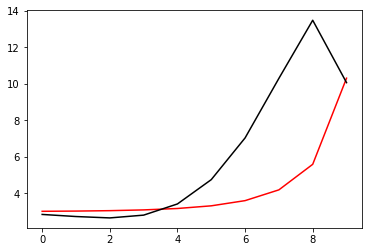

6633 0.12396418060588524 -1.0039189575680216
[ 2.84451084  2.7292839   2.65283648  2.80423804  3.41578067  4.74567272
  7.02875338 10.29174771 13.47921623 10.05480133]


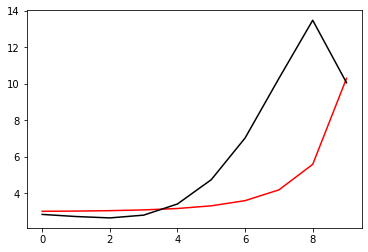

6834 0.12874098444423265 -1.0037084174063082
[ 2.84599859  2.72987851  2.65244104  2.80287885  3.41365678  4.74332862
  7.02733678 10.29366571 13.4889825  10.05493735]


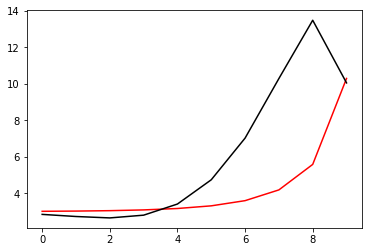

7035 0.1346008020490257 -1.0036134516272797
[ 2.84718972  2.73025383  2.65189958  2.80145045  3.41154776  4.74109379
  7.02613223 10.29587525 13.49902987 10.05511014]


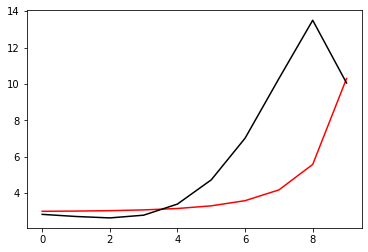

7236 2.1182929142729368 -1.0036612655021788
[ 2.84811857  2.73053302  2.65141374  2.80021154  3.40973478  4.73922006
  7.02529601 10.29839327 13.50927173 10.05525427]


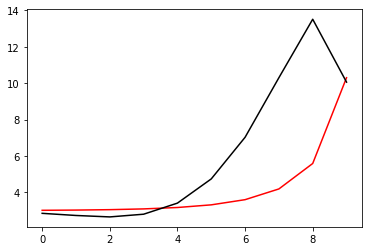

7437 0.12699011181150294 -1.0042982148786972
[ 2.84901778  2.73078857  2.65090959  2.79896355  3.40792819  4.73737601
  7.02452013 10.3009961  13.5195865  10.05543564]


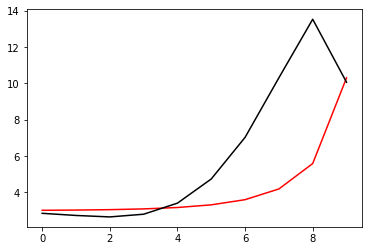

7638 0.1297420169580642 -1.0032452199254458
[ 2.84965933  2.73103783  2.65062271  2.79811398  3.40663453  4.73605803
  7.0241471  10.30375654 13.52979673 10.05558342]


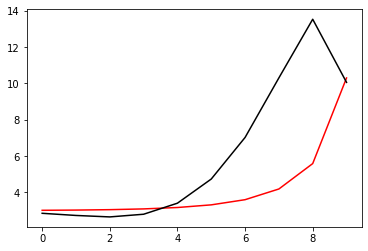

7839 1.1276246910879455 -1.0032188736552876
[ 2.85087908  2.73141755  2.65005527  2.79663927  3.40447361  4.73377848
  7.02290978 10.30591177 13.53965868 10.05574802]


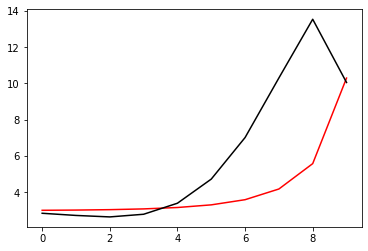

8040 1.128464350576129 -1.0032592364515958
[ 2.85189733  2.73168658  2.64946026  2.79521393  3.40243023  4.73167088
  7.02187754 10.30826948 13.54966622 10.0558961 ]


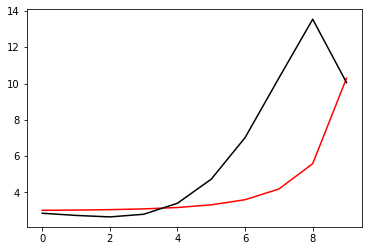

8241 2.1163090180512674 -1.0042806293484525
[ 2.85322746  2.73239257  2.64941586  2.79443837  3.40111391  4.73033442
  7.02161357 10.31133868 13.56028902 10.05607567]


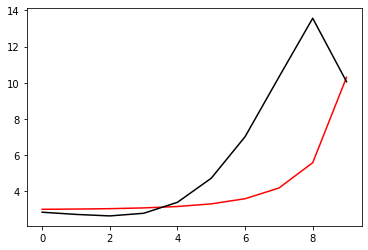

8442 2.200389826988724 -1.0039852925113881
[ 2.85400143  2.73265339  2.64902416  2.79339478  3.39957847  4.72877962
  7.02106586 10.31399672 13.57035656 10.05621666]


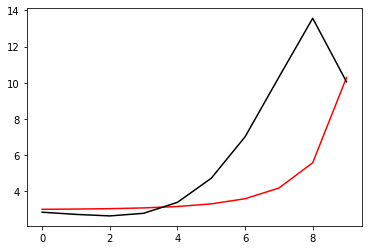

8643 0.13557988422927686 -1.0030712039790108
[ 2.85474953  2.73268257  2.64821022  2.79177194  3.3973633   4.72653107
  7.019926   10.31626326 13.58023474 10.05638828]


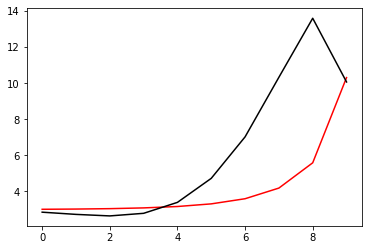

8844 0.14228259414229694 -1.003145064866421
[ 2.85589532  2.73305178  2.64768217  2.79039175  3.39536358  4.72449134
  7.01901157 10.31878071 13.59035509 10.05653421]


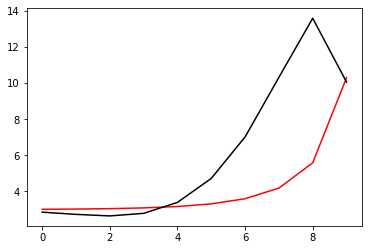

9045 0.1462532645910616 -1.0032109190077294
[ 2.85697622  2.73343178  2.64723185  2.78914602  3.39353877  4.72264069
  7.01826272 10.32139863 13.6004823  10.05670731]


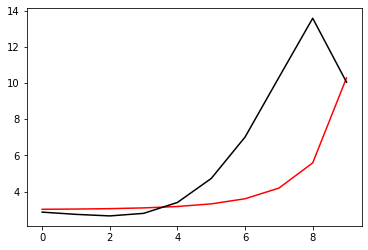

9246 2.123847884812049 -1.0033841623024649
[ 2.85805896  2.73381125  2.64677695  2.78789409  3.39171064  4.72079537
  7.01753369 10.32404878 13.61063201 10.05685302]


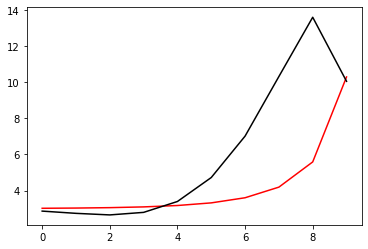

9447 0.12224932232501802 -1.003687446041107
[ 2.85914191  2.73415985  2.64626083  2.78655673  3.38978298  4.71885034
  7.01672163 10.32664185 13.62073398 10.05703044]


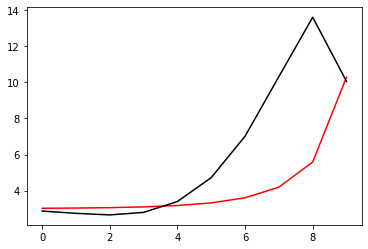

9648 0.13166090895273452 -1.004380507271183
[ 2.86028462  2.73489207  2.64642142  2.78614056  3.38894549  4.7180516
  7.01695942 10.33004612 13.63138085 10.05717554]


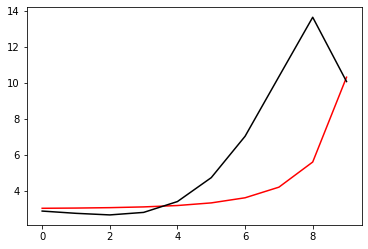

9849 1.1304301769083485 -1.0031593698704617
[ 2.86075025  2.73482285  2.64566996  2.78473426  3.387099    4.71632163
  7.01647738 10.33305199 13.64193224 10.05735902]


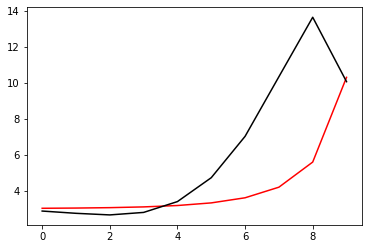

In [119]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.117958438447103 -1.0033707452719158
[ 2.86140335  2.73410824  2.64338808  2.78098893  3.38231551  4.71150086
  7.01359187 10.33594071 13.65745101 10.05759973]


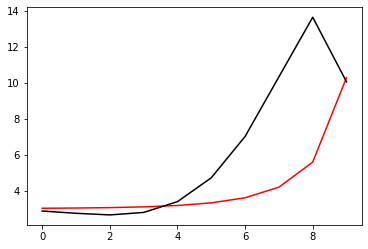

402 2.355709126390395 -1.002851864606892
[ 2.86310188  2.73473432  2.64284975  2.77936472  3.37985228  4.70874868
  7.01164794 10.33705916 13.665837   10.05772265]


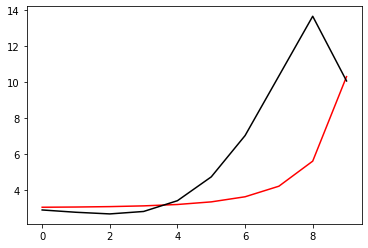

603 0.124424272785328 -1.0038124858269954
[ 2.86492943  2.73547968  2.64241591  2.77783364  3.37747868  4.70609659
  7.00983832 10.33838246 13.67454703 10.0578647 ]


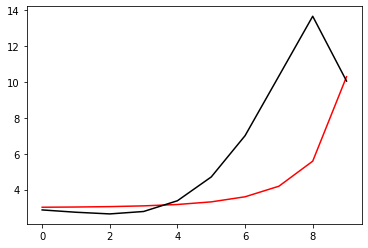

804 0.12507596220232625 -1.0039241320073653
[ 2.86614833  2.73568992  2.64150938  2.77588822  3.37474941  4.70315471
  7.00782077 10.3395963  13.68324749 10.05798922]


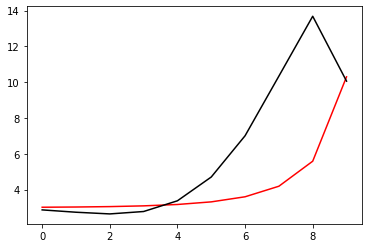

1005 0.15914529688294965 -1.00281740003419
[ 2.86753093  2.73615383  2.64093082  2.77433127  3.37245169  4.70066382
  7.00624227 10.34120628 13.69229458 10.05815141]


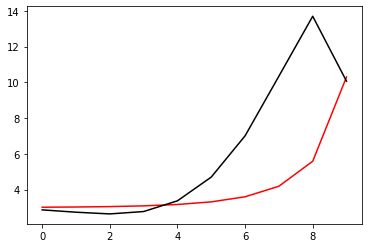

1206 2.122639141073489 -1.0032867142639155
[ 2.86903664  2.73673714  2.64046461  2.77288307  3.37026707  4.69830404
  7.00483262 10.34303955 13.70161464 10.05829404]


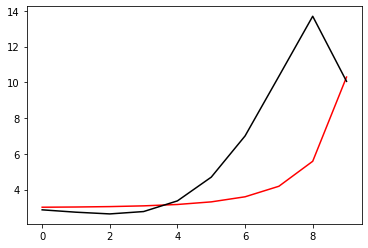

1407 0.1293417365180331 -1.0043132002019837
[ 2.87028336  2.73707556  2.63976253  2.77120946  3.36787362  4.69576429
  7.00329106 10.34480512 13.71092425 10.058455  ]


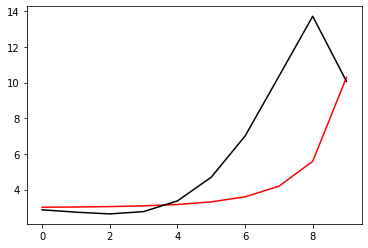

1608 0.13023757475303988 -1.0030235203553515
[ 2.87130089  2.73725817  2.63896567  2.7694907   3.36547009  4.69322929
  7.00174169 10.34652238 13.7201358  10.05857917]


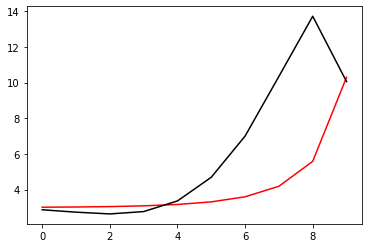

1809 1.129247202281723 -1.0029844546497275
[ 2.87266594  2.73780731  2.63854842  2.76816235  3.36346648  4.69110257
  7.00060702 10.34865567 13.72975546 10.0587342 ]


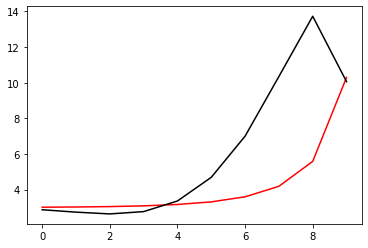

2010 1.144742660593154 -1.004318545828805
[ 2.87399515  2.73829734  2.6380472   2.76672967  3.36134741  4.68886408
  6.99938511 10.35074482 13.73937216 10.05887558]


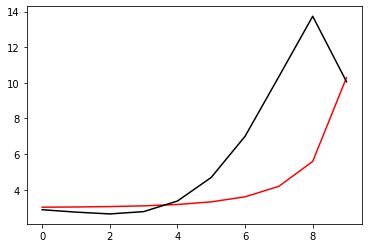

2211 2.1176619080452257 -1.0032830702171822
[ 2.87465495  2.73817534  2.63698296  2.76477713  3.35874635  4.68617659
  6.99774261 10.35243538 13.74860286 10.05903783]


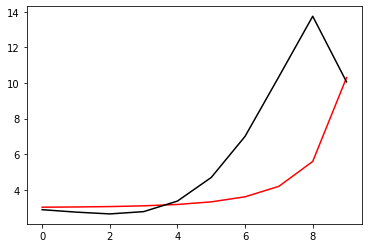

2412 2.324399565153858 -1.0028129237984489
[ 2.87610556  2.73888339  2.63677908  2.7637066   3.35703707  4.68437198
  6.99694613 10.35490507 13.75853577 10.05919132]


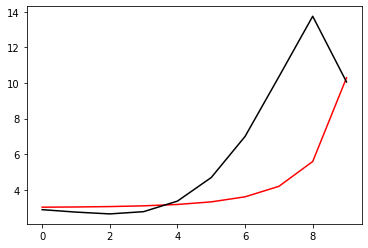

2613 0.1247091868343233 -1.0037523927289584
[ 2.87747286  2.73947477  2.63642521  2.76245852  3.3551335   4.68237317
  6.995979   10.35724916 13.76838851 10.05935446]


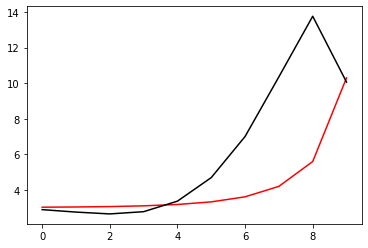

2814 0.12534419084197573 -1.0038593587409648
[ 2.87833083  2.73958627  2.63561573  2.76077736  3.35282022  4.679992
  6.99466422 10.35928574 13.77796732 10.05948381]


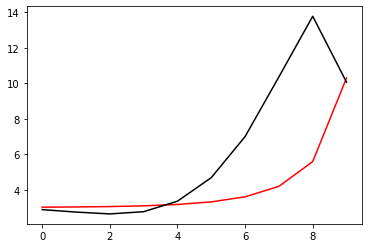

3015 0.15386157544072113 -1.0027874883515022
[ 2.87949317  2.74005569  2.63520729  2.75952849  3.35095351  4.67804527
  6.99373346 10.36161772 13.78774739 10.05965155]


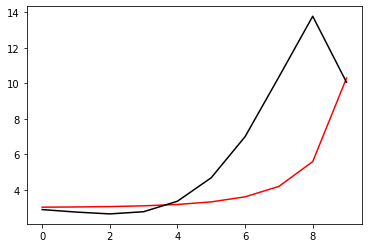

3216 2.1242402591216116 -1.0032060518335568
[ 2.88082545  2.74067252  2.6349223   2.75838116  3.34917076  4.67617079
  6.99287016 10.36401802 13.79759658 10.0597986 ]


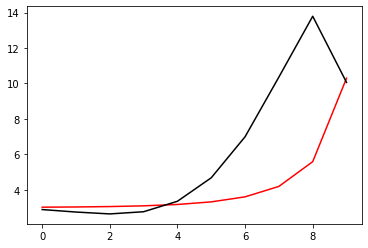

3417 0.124338186654544 -1.0035659241927875
[ 2.88274701  2.74198445  2.63542337  2.75809561  3.34830806  4.67525256
  6.99296957 10.36735005 13.80831327 10.05998111]


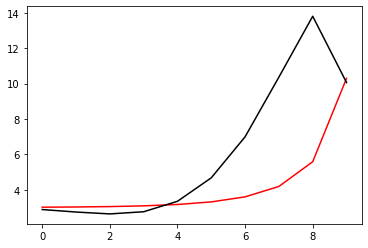

3618 0.13059376009772428 -1.0032396262084782
[ 2.88332563  2.74201565  2.63470105  2.75664886  3.3463661   4.6733791
  6.9923017  10.37014156 13.81864007 10.0601302 ]


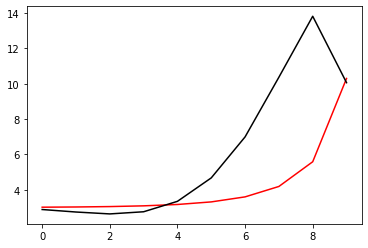

3819 1.1273451652912505 -1.0033139781030334
[ 2.88370229  2.74191633  2.63391848  2.75521705  3.34453012  4.67173524
  6.99203317 10.37351854 13.82965372 10.06031686]


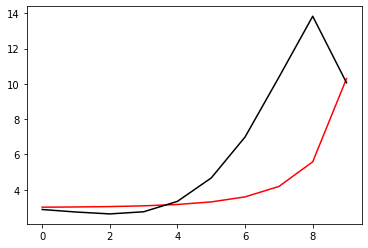

4020 1.1431531869222926 -1.00424555083761
[ 2.88514793  2.7428755   2.6341751   2.75479191  3.34364551  4.67094564
  6.99245443 10.37735055 13.84087158 10.06048016]


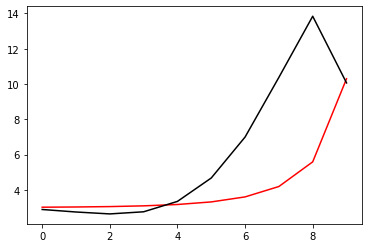

4221 2.113702286081378 -1.0041813071538408
[ 2.88592209  2.74312447  2.63368278  2.75358296  3.34195053  4.6693314
  6.99205127 10.3803662  13.85126722 10.0606544 ]


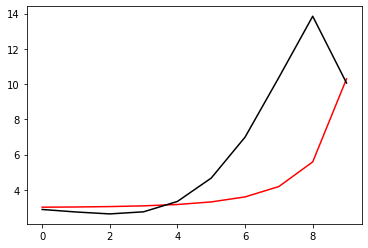

4422 2.1790807557178358 -1.0039014852586028
[ 2.8851032   2.74183195  2.63170453  2.75095698  3.33893753  4.66655466
  6.99072477 10.38275801 13.86128293 10.06079729]


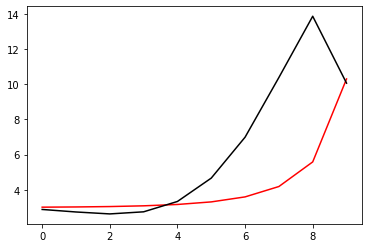

4623 0.12913874628016492 -1.0037071530984654
[ 2.88748261  2.74378841  2.63300069  2.75158457  3.3390748   4.66668165
  6.99184223 10.38694592 13.87248249 10.0609904 ]


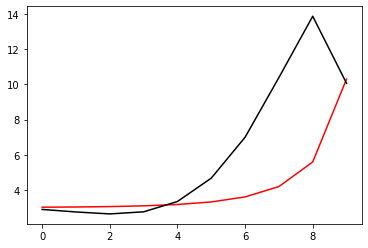

4824 0.14654168801673184 -1.002979928139724
[ 2.88792377  2.74371868  2.63220082  2.7500844   3.33712319  4.66487816
  6.99135954 10.39000765 13.88298385 10.06114407]


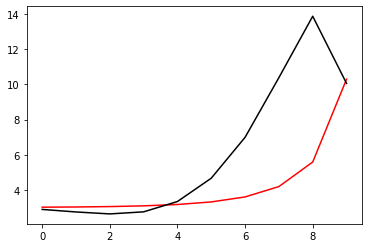

5025 0.13495760095194448 -1.0034350910028131
[ 2.88818828  2.74345928  2.63120051  2.74837857  3.33497241  4.66290145
  6.99075596 10.39301824 13.89348347 10.0613286 ]


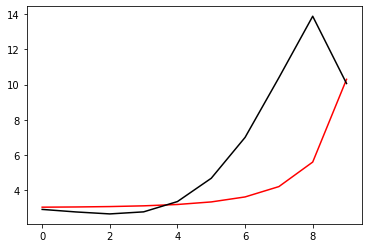

5226 2.1236468988128903 -1.0034678354530655
[ 2.88953828  2.74436004  2.63142064  2.74792828  3.33407059  4.66209831
  6.9911505  10.39676016 13.90444948 10.0614778 ]


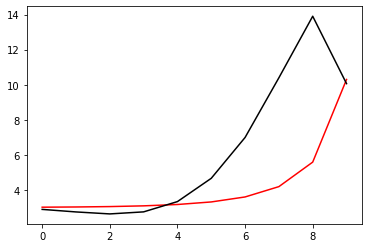

5427 0.12505073329429295 -1.0039101309551088
[ 2.8901971   2.74453723  2.6308864   2.74669689  3.33236861  4.66048711
  6.99074408 10.39972388 13.91466793 10.06165486]


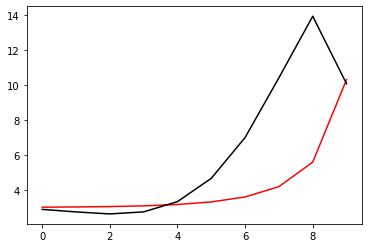

5628 0.1277733894202536 -1.0033910465373086
[ 2.8904519   2.74430494  2.62994184  2.7450665   3.33030464  4.65859638
  6.99020647 10.40275714 13.92513092 10.06181233]


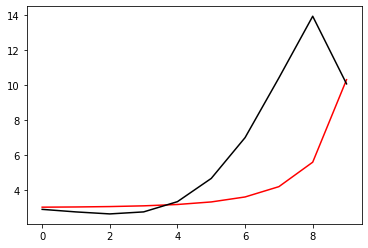

5829 1.1391145000493577 -1.0027865251825656
[ 2.89213073  2.74554675  2.63050782  2.74495685  3.32972583  4.65807707
  6.99081197 10.40660381 13.93609011 10.06198908]


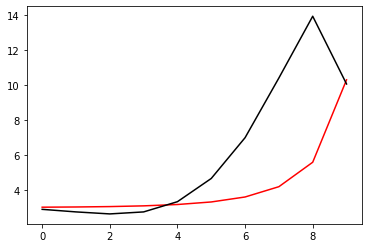

6030 1.128736858768101 -1.0036591269339847
[ 2.89246251  2.7454006   2.62965577  2.74342156  3.32775621  4.65627426
  6.99034613 10.40968011 13.94655578 10.06214303]


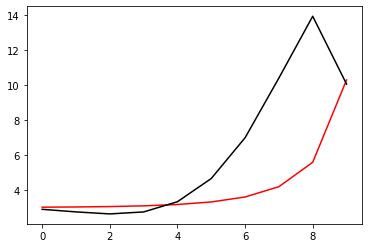

6231 2.1453622797917458 -1.0027067009378783
[ 2.89337203  2.74586118  2.62943287  2.74252811  3.32642721  4.65508881
  6.99044237 10.41323394 13.95741587 10.06232493]


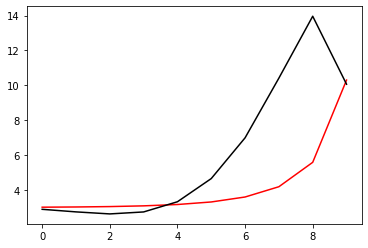

6432 2.171927054283903 -1.0037839693161348
[ 2.89243405  2.74435068  2.62713058  2.73947502  3.32290641  4.65175595
  6.98854404 10.41504593 13.96679032 10.06245416]


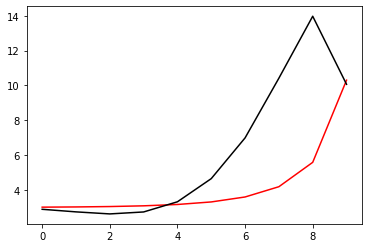

6633 0.13503032822134817 -1.0035207462643598
[ 2.89601664  2.74756129  2.62971486  2.74140874  3.3243613   4.65320379
  6.99096551 10.4204769  13.97909493 10.06266998]


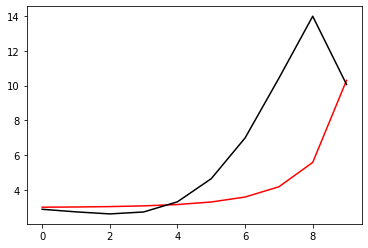

6834 0.1307934828709662 -1.0039599514510817
[ 2.89563446  2.74667481  2.6280941   2.73907648  3.32157286  4.65057
  6.98966833 10.42273224 13.98875116 10.06280591]


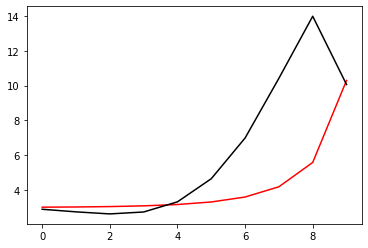

7035 0.13084734837116108 -1.0037332160501373
[ 2.89516267  2.74562658  2.62624542  2.73645849  3.31845303  4.64757472
  6.98799904 10.42462537 13.99806574 10.06297093]


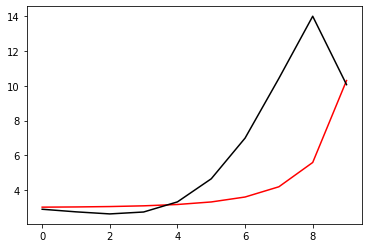

7236 2.1245019873325095 -1.004343356695007
[ 2.89881279  2.74889766  2.62888192  2.73843522  3.31994377  4.64905378
  6.99044975 10.4300873  14.01040831 10.06314475]


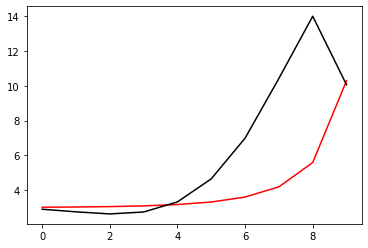

7437 0.12728672897597854 -1.0032239696711789
[ 2.89723549  2.7467943   2.62602627  2.73485742  3.31591529  4.6452118
  6.98801482 10.43131204 14.01913818 10.06329613]


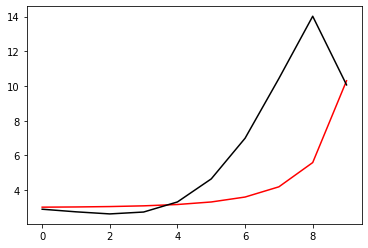

7638 0.13222039597200178 -1.0042666928338804
[ 2.89828166  2.74733956  2.62583231  2.73392651  3.31446606  4.64378736
  6.98769486 10.4342242  14.02914791 10.06343759]


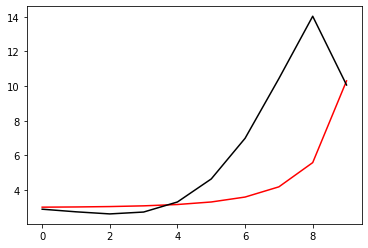

7839 1.1299578827153538 -1.0039722681934258
[ 2.89851935  2.74711184  2.62490295  2.7323076   3.31240099  4.64186726
  6.98707284 10.43708745 14.03932947 10.06362219]


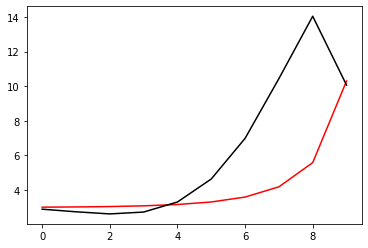

8040 1.1454744768010596 -1.0041962544030898
[ 2.90062368  2.7488282   2.6259793   2.73272749  3.31235982  4.64187649
  6.98816922 10.44135443 14.05061607 10.06378283]


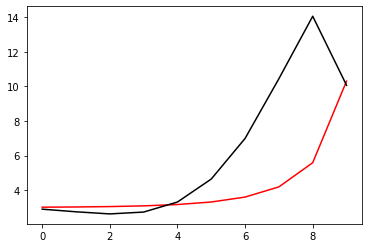

8241 2.166893552262146 -1.0023266826734536
[ 2.90122222  2.74896577  2.62541706  2.73147506  3.31066032  4.64032147
  6.98791194 10.44458177 14.06115991 10.06395804]


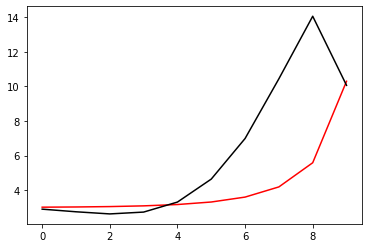

8442 2.196092631756066 -1.002855378381457
[ 2.90255761  2.74989288  2.62568711  2.7310729   3.30978205  4.63947606
  6.98813031 10.44794205 14.07150939 10.06411511]


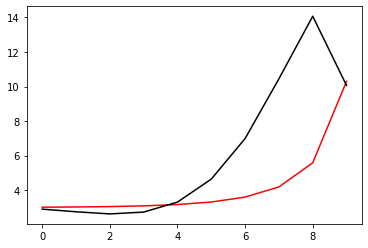

8643 0.14125658014773698 -1.0026011612999368
[ 2.90094607  2.74773566  2.62275602  2.72739129  3.30561373  4.63544151
  6.98542289 10.44879144 14.07976336 10.06424748]


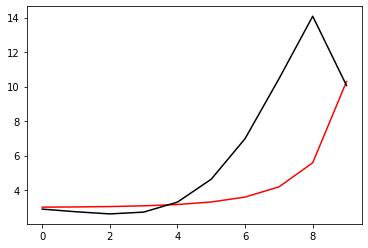

8844 0.14979102842982484 -1.00317826090523
[ 2.90447999  2.75089826  2.62528745  2.72925636  3.30697654  4.63675752
  6.98764385 10.45392538 14.09167433 10.06442878]


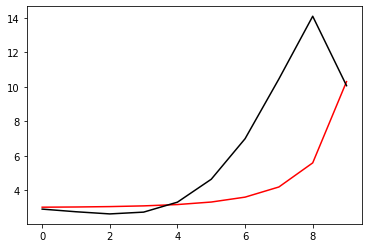

9045 0.15063881013672248 -1.0030790777731569
[ 2.90457436  2.75054126  2.62423771  2.72751508  3.30477441  4.63466353
  6.98677809 10.45644925 14.10143433 10.06459732]


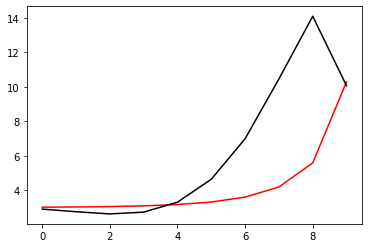

9246 2.129453064577853 -1.0030956578845558
[ 2.90416796  2.74968033  2.62268177  2.72526799  3.30207368  4.63209064
  6.98547218 10.45858958 14.11086544 10.06473862]


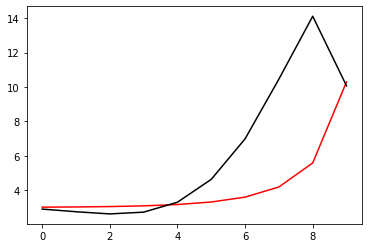

9447 0.12842035679573566 -1.0038527502008578
[ 2.9057902   2.75087847  2.62320436  2.72509695  3.30140767  4.6314436
  6.98588175 10.46214264 14.1214185  10.06491836]


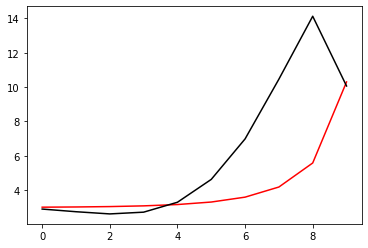

9648 0.1311428925229503 -1.0042468501082218
[ 2.90388341  2.74828802  2.6197263   2.72079642  3.29662517  4.62692619
  6.98300639 10.46330128 14.13041262 10.06504246]


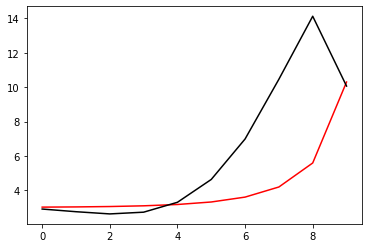

9849 1.1475325688118463 -1.002614795358359
[ 2.90796834  2.75206696  2.62293101  2.72337207  3.29870517  4.62891267
  6.98576811 10.4687541  14.14237232 10.06523926]


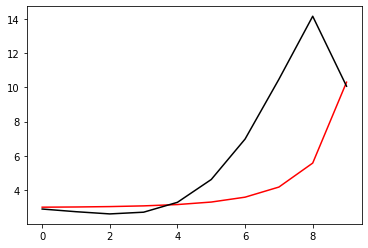

In [120]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.125095142432465 -1.0030622226457016
[ 2.90743419  2.75093764  2.62075991  2.72014216  3.29481423  4.62535598
  6.98449732 10.47352611 14.15992732 10.06551075]


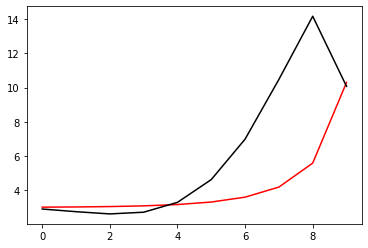

402 2.0875746842698746 -1.0031616701369326
[ 2.91004616  2.75314223  2.62230735  2.72100685  3.29518352  4.62572276
  6.98586532 10.47794352 14.17122666 10.06568823]


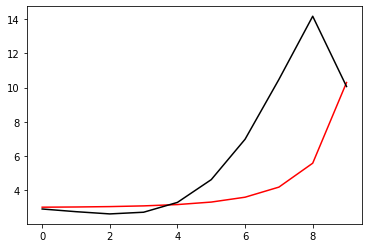

603 0.1290044174817966 -1.0035577129585038
[ 2.90841017  2.75095144  2.61932742  2.71723942  3.29085918  4.62140083
  6.9826481  10.47799449 14.17845369 10.06580622]


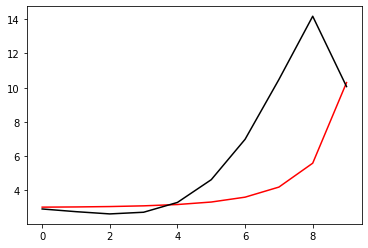

804 0.13471501832545635 -1.0035167487946077
[ 2.91007071  2.75221779  2.61993692  2.71714118  3.29019407  4.62057914
  6.98255173 10.4805817  14.18765599 10.06593545]


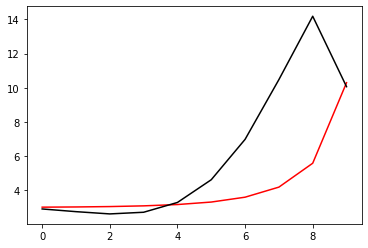

1005 0.131752792080225 -1.0038187151417832
[ 2.90914808  2.7508167   2.61781192  2.71428098  3.28681656  4.61723062
  6.98032075 10.48162197 14.19588774 10.06609057]


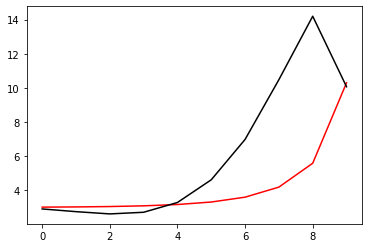

1206 2.130341088417557 -1.003073425969276
[ 2.91137224  2.7527067   2.61909854  2.71490782  3.28692423  4.61723674
  6.98112239 10.48518986 14.20614689 10.06624073]


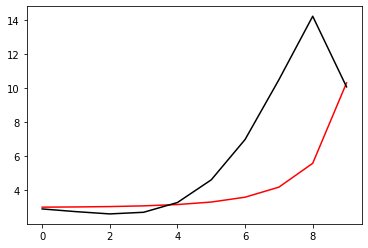

1407 0.12886854081087856 -1.0035605480499832
[ 2.91270371  2.75363154  2.61936485  2.71449238  3.28602879  4.61638407
  6.98136643 10.48864065 14.21668663 10.06640876]


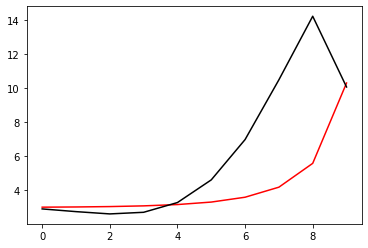

1608 0.13848468920905505 -1.0043559285439225
[ 2.91190921  2.75237543  2.61740899  2.71183738  3.28291844  4.61341193
  6.97969138 10.4904655  14.22586158 10.0665345 ]


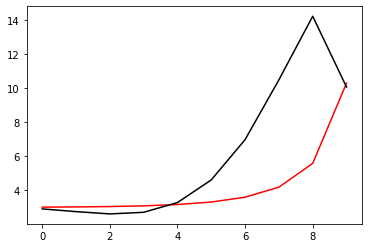

1809 1.1305364946514223 -1.0029483069003986
[ 2.91174015  2.75178275  2.6161402   2.70986232  3.28042357  4.61088945
  6.97814637 10.49196219 14.23428501 10.06667983]


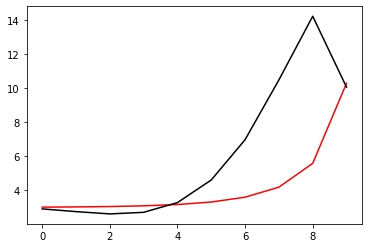

2010 1.1348893785916032 -1.0028074343339044
[ 2.91323989  2.75291079  2.61663812  2.70969156  3.27976056  4.6102132
  6.97844327 10.4952723  14.24447149 10.06683731]


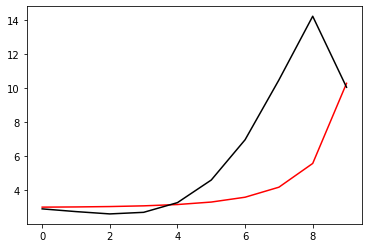

2211 2.122496724716463 -1.0032238146590295
[ 2.91530101  2.75463443  2.61775835  2.71015394  3.27971348  4.61008744
  6.97915241 10.49878924 14.2546727  10.06701066]


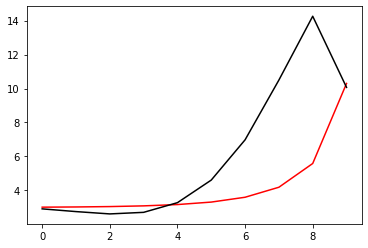

2412 2.1072984551695146 -1.0039074653646616
[ 2.91400019  2.75286566  2.61527847  2.70695177  3.27601473  4.60645399
  6.97669555 10.49967432 14.26277857 10.06712887]


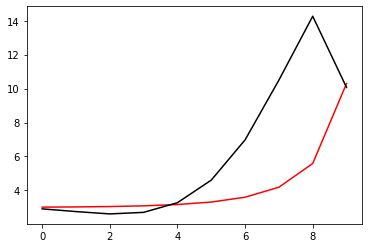

2613 0.13028256736362764 -1.0037576399811476
[ 2.91534063  2.75383919  2.61561862  2.70660093  3.27511566  4.6054255
  6.97643143 10.50213163 14.27184711 10.06727772]


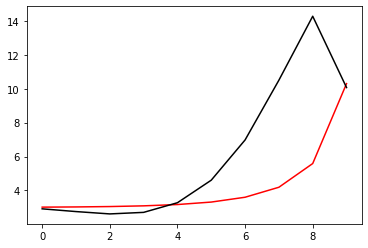

2814 0.1273399602783485 -1.0036155395255848
[ 2.91440264  2.75240376  2.61345163  2.70370771  3.27175474  4.60221687
  6.97457407 10.50386627 14.28101373 10.06740001]


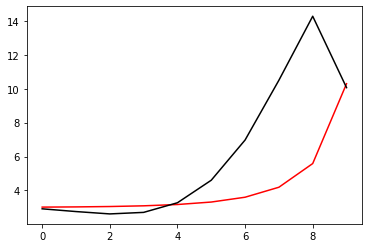

3015 0.14472091680133714 -1.0033904486844267
[ 2.91931801  2.75705276  2.6175603   2.70720132  3.27474892  4.60508681
  6.97814536 10.51000751 14.29353945 10.06762093]


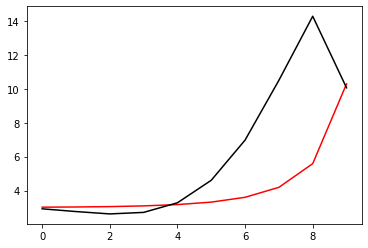

3216 2.1418834276207845 -1.0028392007164804
[ 2.91955475  2.75686454  2.61670817  2.70567465  3.27277648  4.60323675
  6.97753587 10.51278596 14.30348731 10.06776258]


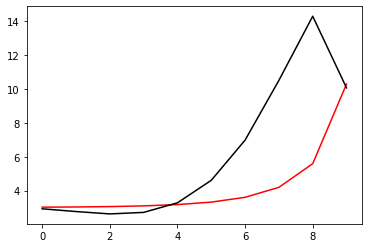

3417 0.14847299977231326 -1.0025006043101303
[ 2.92046437  2.75743258  2.61667611  2.70499391  3.27160896  4.60203588
  6.97724598 10.51539103 14.31279314 10.06792275]


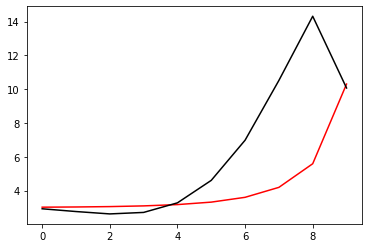

3618 0.1366671758617366 -1.0042729786232043
[ 2.91889725  2.7554561   2.61404678  2.70169086  3.26784434  4.59835
  6.97471665 10.51613589 14.32062717 10.06802706]


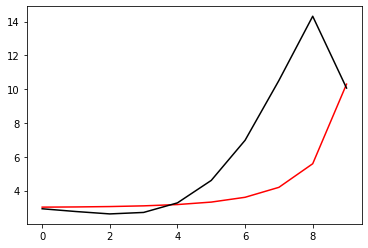

3819 1.131331119098524 -1.0037388125688822
[ 2.91991661  2.75611697  2.61408969  2.70106594  3.26671468  4.59717219
  6.97444001 10.51875337 14.32996321 10.06819906]


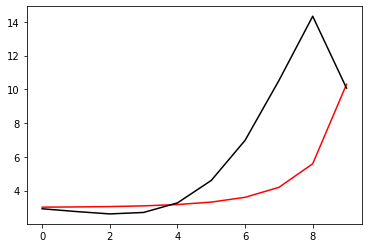

4020 1.1416471073975634 -1.0040594519436639
[ 2.92093919  2.7564926   2.6136057   2.69975516  3.26488117  4.59550504
  6.97423135 10.52230759 14.3410193  10.06836499]


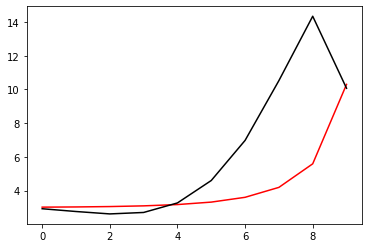

4221 2.119145689448268 -1.0034235652088768
[ 2.92293434  2.75819596  2.61476234  2.70031081  3.26498496  4.59558609
  6.97519071 10.52605693 14.35125797 10.06853119]


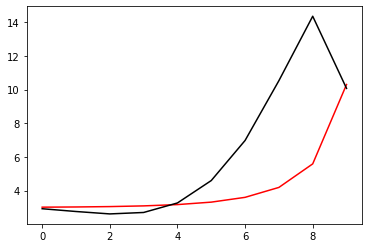

4422 2.0026959731069227 -1.0034320105181833
[ 2.92327284  2.75813721  2.61406745  2.69895554  3.26317167  4.5938336
  6.97453587 10.52854594 14.36059137 10.06865959]


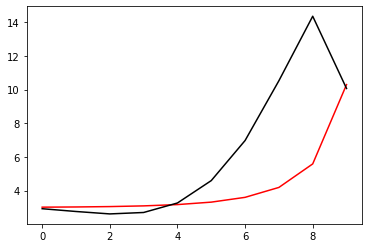

4623 0.13519144767564956 -1.0037207630069866
[ 2.92396061  2.75849072  2.6138372   2.69810063  3.26186973  4.5925652
  6.97428221 10.53130126 14.37006711 10.06882736]


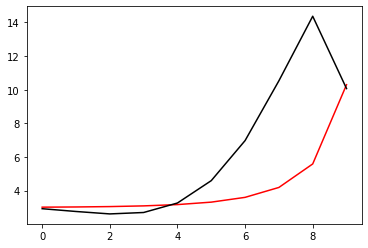

4824 0.13596546302207801 -1.003359987598514
[ 2.92348882  2.75766267  2.61240536  2.69602928  3.25934779  4.59009367
  6.97287436 10.53298777 14.37857726 10.06895035]


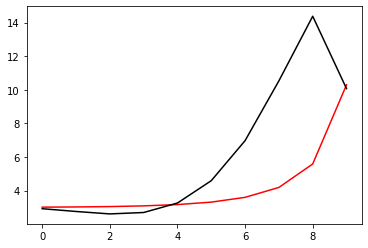

5025 0.14364082713788917 -1.0040974245356378
[ 2.92428975  2.75808906  2.61221175  2.69518877  3.25807074  4.58892148
  6.97288216 10.5362621  14.38883428 10.06912621]


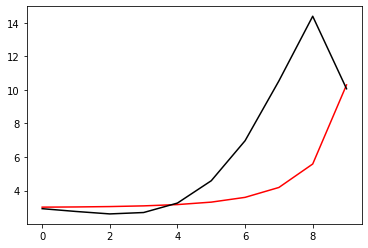

5226 2.1335777515745518 -1.0033212801034057
[ 2.92692691  2.76047266  2.61407251  2.69645499  3.25887521  4.58967404
  6.97445772 10.54055334 14.39957202 10.06927731]


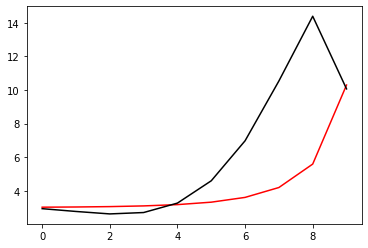

5427 0.13455354468496397 -1.0031003104122151
[ 2.92644987  2.75963967  2.61263338  2.69437109  3.25633613  4.58718463
  6.97303735 10.54223906 14.40809724 10.069428  ]


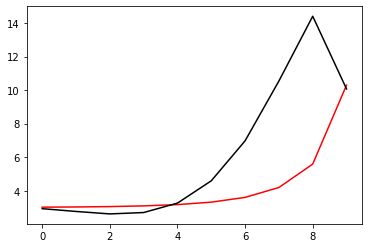

5628 0.13840420772949263 -1.0030984735093802
[ 2.92701643  2.75990786  2.61234404  2.69347152  3.25499633  4.58588056
  6.97274668 10.54495725 14.41755652 10.06955618]


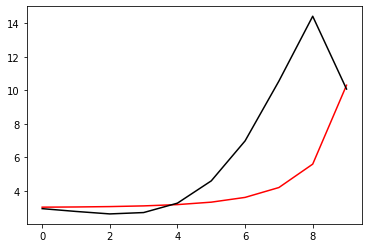

5829 1.1387537825683496 -1.0026888446838393
[ 2.92659092  2.75909293  2.61089371  2.69135788  3.25243412  4.58342138
  6.97148205 10.54699373 14.42662401 10.06971838]


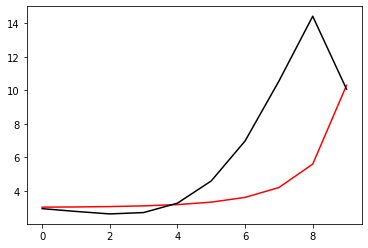

6030 1.1332798904221233 -1.0028246054204886
[ 2.92570225  2.7578875   2.60911504  2.68895612  3.24958606  4.580615
  6.96971358 10.54827819 14.43469701 10.06984096]


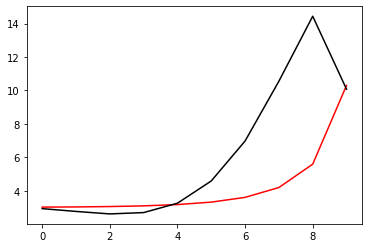

6231 2.1227355875948204 -1.0028929267471987
[ 2.92763734  2.75941188  2.60998547  2.68914195  3.24929371  4.58037719
  6.97058738 10.55232576 14.44561496 10.07001193]


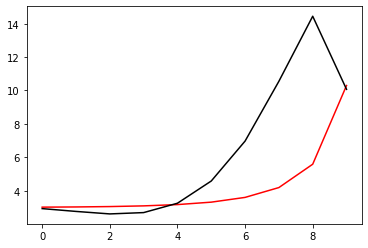

6432 1.9486381492244793 -1.003620568381962
[ 2.92941923  2.76091539  2.61095167  2.68950881  3.24921382  4.58029461
  6.97142672 10.55601691 14.45584513 10.07016227]


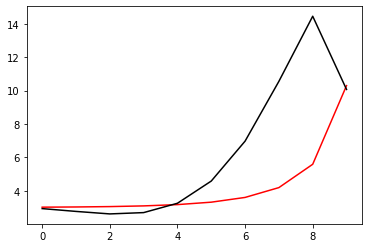

6633 0.13316411844677 -1.0037065002528764
[ 2.92881772  2.75983036  2.60915898  2.68700961  3.2462706   4.57753639
  6.97005876 10.55824235 14.46532578 10.07032394]


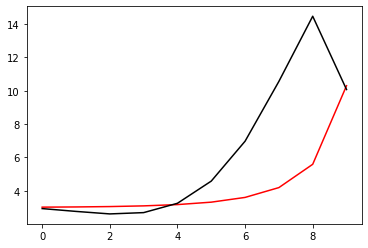

6834 0.13142951320889973 -1.003738380710358
[ 2.92853582  2.7592557   2.60803865  2.68529027  3.24412119  4.57542989
  6.96896498 10.56013367 14.47387296 10.07044316]


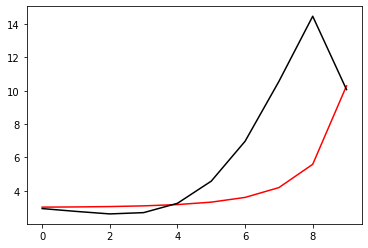

7035 0.1419542866641038 -1.0034190430433383
[ 2.93157069  2.76206766  2.61036177  2.68704665  3.24543845  4.576711
  6.97106986 10.5649179  14.48499134 10.07063697]


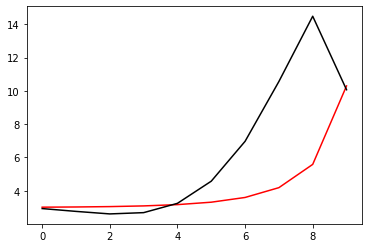

7236 2.13131971775715 -1.0032672921100387
[ 2.93208158  2.76230755  2.61007343  2.68617194  3.24414462  4.57547287
  6.97086139 10.56771432 14.49446415 10.07076973]


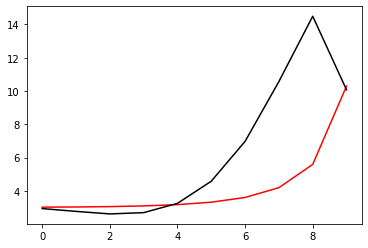

7437 0.1415461074758346 -1.0028494415271465
[ 2.93307317  2.7630802   2.61036042  2.68590155  3.24346604  4.57483487
  6.97120066 10.57097193 14.50432242 10.07094075]


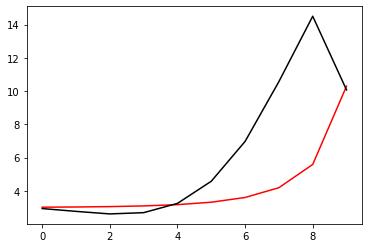

7638 0.1334783294669457 -1.0037306530780326
[ 2.93294225  2.76261769  2.60931292  2.68422049  3.24134087  4.57278034
  6.97025135 10.57316683 14.51335254 10.07107605]


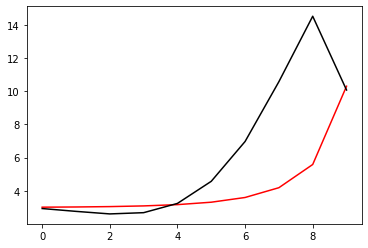

7839 1.135945815876848 -1.0032163938803837
[ 2.93329361  2.76274135  2.6089423   2.68328267  3.23998592  4.5714598
  6.96990591 10.57574113 14.52253035 10.07122667]


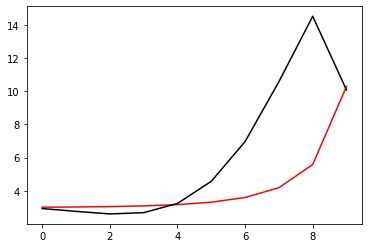

8040 1.1362342509478671 -1.0036513011918504
[ 2.93390775  2.76303716  2.60866412  2.68237618  3.23863393  4.5701677
  6.9696931  10.57862661 14.53219226 10.07136291]


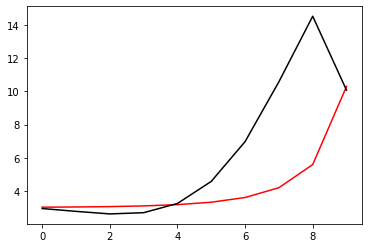

8241 2.1010935342017105 -1.0041099167197636
[ 2.9340867   2.76274835  2.60767985  2.68068701  3.2364958   4.56820512
  6.96910246 10.58158927 14.54233374 10.07154603]


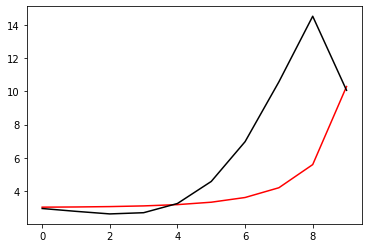

8442 2.1395978471284534 -1.002684477876973
[ 2.93603688  2.76435157  2.60869008  2.68105708  3.23641408  4.56818049
  6.97015377 10.58571862 14.55315528 10.07170442]


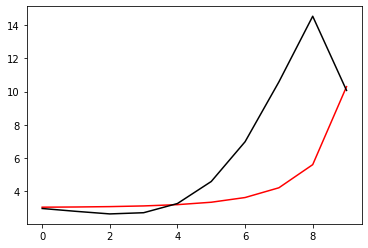

8643 0.13540722981222503 -1.0038509990029152
[ 2.933618    2.7615349   2.60524395  2.6769585   3.23189372  4.5638211
  6.96709198 10.58607984 14.56055675 10.07183171]


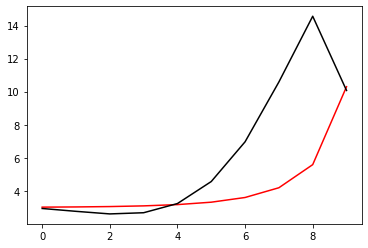

8844 0.13706610823953874 -1.0035740960964468
[ 2.93600073  2.76363307  2.6068055   2.67792072  3.23241753  4.56436907
  6.96861118 10.59049432 14.57145699 10.07198477]


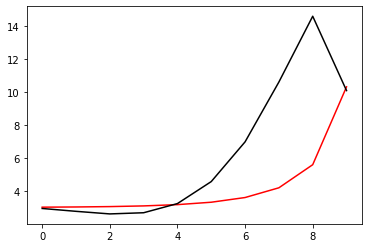

9045 0.14255600082113407 -1.003934425080209
[ 2.93659209  2.76394431  2.60658731  2.67711487  3.23119457  4.56321034
  6.96849512 10.59337746 14.58092751 10.07214855]


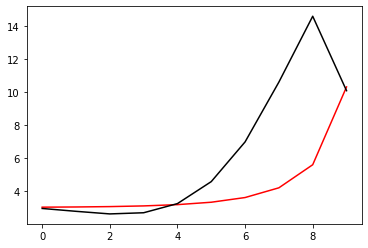

9246 2.135938541570908 -1.0028435989155375
[ 2.93691211  2.76400426  2.60613283  2.67607763  3.22972829  4.56176799
  6.96801195 10.59576992 14.58979396 10.07228305]


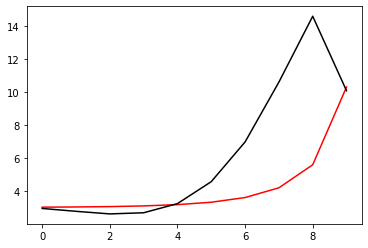

9447 0.13759177475318798 -1.0028375621122403
[ 2.93767662  2.7643764   2.60587867  2.67516406  3.22836917  4.56051597
  6.96795165 10.59896129 14.59981743 10.07243936]


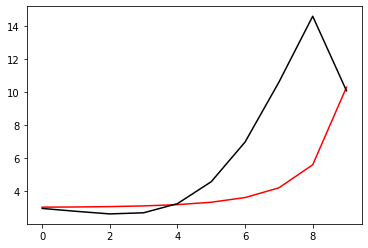

9648 0.13215929389411762 -1.0032782841439898
[ 2.93665107  2.7630759   2.60405622  2.67275859  3.22554503  4.55774325
  6.9661922  10.60015714 14.60755512 10.0725498 ]


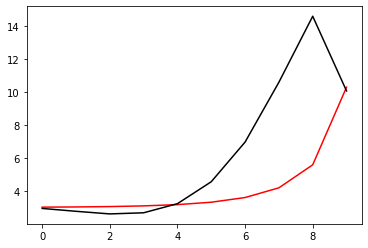

9849 1.1373998355133015 -1.0026773148150767
[ 2.93721794  2.76331572  2.60373074  2.67182247  3.22419096  4.55648945
  6.96607194 10.60317512 14.61726955 10.07270705]


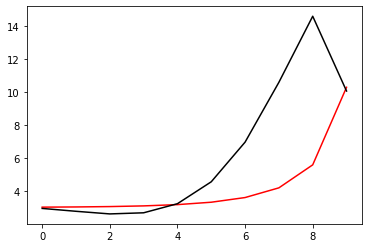

In [121]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.1465747412650398 -1.0026164907928095
[ 2.94115613  2.76665786  2.60611256  2.6731891   3.22487312  4.55734729
  6.96879504 10.61096948 14.63569507 10.07300536]


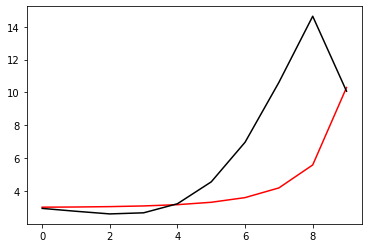

402 2.1750716762217395 -1.0025677156821997
[ 2.93887457  2.76398203  2.60283029  2.66929087  3.22060911  4.55333181
  6.96620276 10.61189892 14.64351264 10.0731296 ]


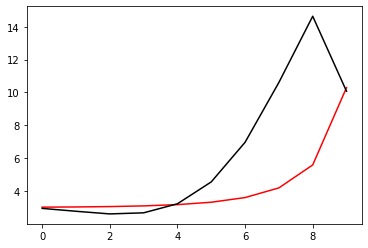

603 0.14287434936769144 -1.0031663232282335
[ 2.94208042  2.76692799  2.6052745   2.67117147  3.22208648  4.55486621
  6.96872734 10.61727189 14.65513473 10.07330992]


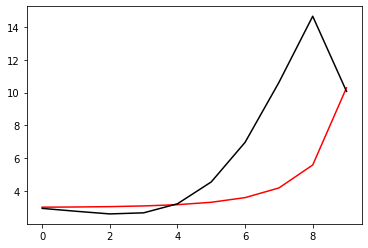

804 0.1437819093265036 -1.0034958728751595
[ 2.94311602  2.7675599   2.60528107  2.67053417  3.22104646  4.55402462
  6.96923666 10.62121525 14.66592378 10.07346841]


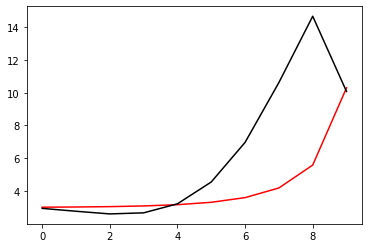

1005 0.14298341691313948 -1.0036754451768828
[ 2.9432387   2.76730852  2.60443218  2.66906691  3.21919967  4.55239816
  6.96898294 10.62441644 14.67598223 10.07364705]


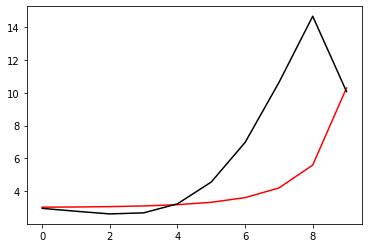

1206 2.1331389614291907 -1.0033601384693127
[ 2.94432784  2.76799587  2.60449906  2.66849882  3.21824399  4.55166611
  6.96963984 10.62854871 14.68696514 10.07379287]


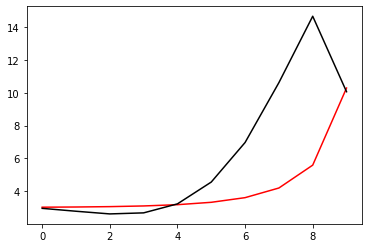

1407 0.1454973291421602 -1.004173280776686
[ 2.94374868  2.76707921  2.60302018  2.66643178  3.21581819  4.54946552
  6.96879224 10.63110738 14.69630971 10.0739697 ]


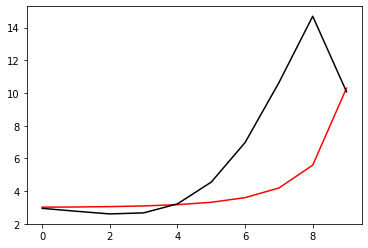

1608 0.13851304907874856 -1.0038073504428642
[ 2.94561908  2.76866135  2.6040749   2.6669072   3.21589946  4.54965993
  6.97010527 10.63546574 14.70709534 10.07411372]


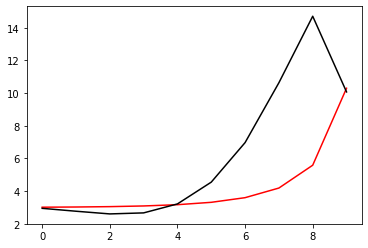

1809 1.139139374658366 -1.0035454562215123
[ 2.94607669  2.76884017  2.6037379   2.66600639  3.21462804  4.54854127
  6.97017259 10.6386774  14.71683799 10.07428756]


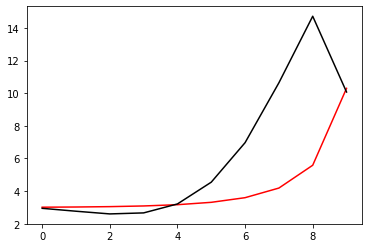

2010 1.1386671839957119 -1.0028750161527848
[ 2.94421324  2.76655064  2.60080942  2.66243528  3.21068497  4.54488131
  6.96803351 10.6402273  14.72546284 10.07441537]


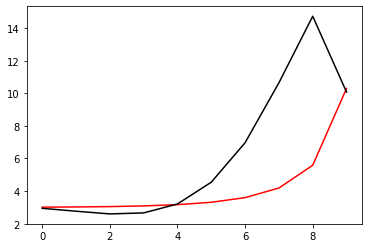

2211 2.109222924767964 -1.0037840686528587
[ 2.94723174  2.769399    2.60323856  2.66437148  3.21227701  4.54657786
  6.9707506  10.64579478 14.73723714 10.07460611]


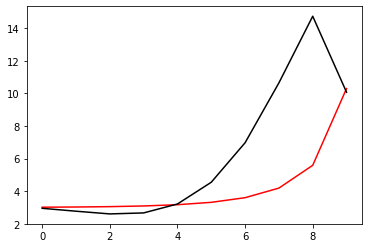

2412 1.9624407727938737 -1.0029913923088616
[ 2.94897386  2.77083263  2.60412778  2.66467007  3.21218353  4.54662468
  6.97198193 10.65017674 14.74814884 10.07477018]


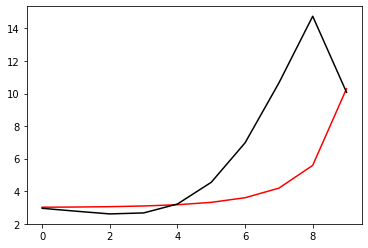

2613 0.14259869273633233 -1.003393497239866
[ 2.94798979  2.76949542  2.60221637  2.66216618  3.20933705  4.54406002
  6.97089092 10.65267695 14.75760999 10.07493414]


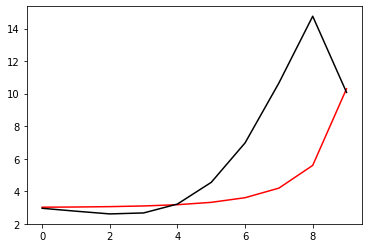

2814 0.13874353434365705 -1.0037980227205592
[ 2.94709431  2.76820365  2.60030828  2.6596248   3.20641402  4.54138067
  6.96964641 10.65498647 14.7668521  10.07506261]


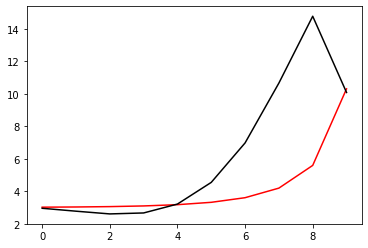

3015 0.1462245524918383 -1.0034363183374233
[ 2.94893722  2.76990713  2.60161586  2.66045225  3.20689899  4.54195839
  6.97121497 10.65936343 14.77740838 10.07524087]


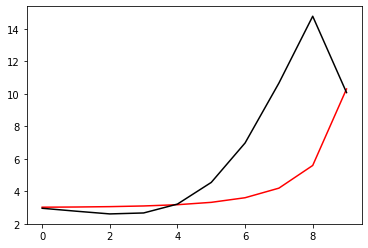

3216 2.1437074211749607 -1.0030149000204946
[ 2.95024788  2.7708872   2.60203127  2.66026519  3.20633251  4.54159427
  6.97217662 10.6636983  14.78849859 10.07540039]


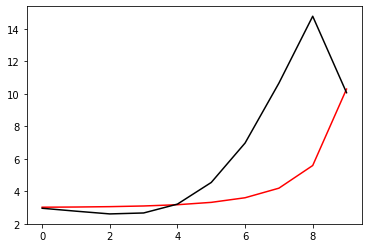

3417 0.13706629601597325 -1.0034226127188142
[ 2.94945988  2.76984831  2.60050275  2.65819711  3.20392606  4.53939589
  6.97125947 10.66606509 14.79753821 10.07555661]


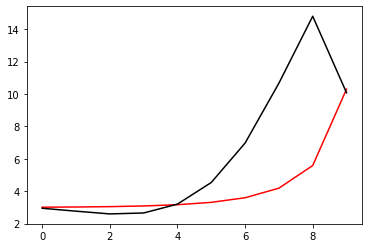

3618 0.14019134606432573 -1.0038181830148623
[ 2.95080462  2.77089893  2.60102131  2.65813414  3.2034833   4.5391182
  6.97221251 10.67023757 14.80830827 10.07570729]


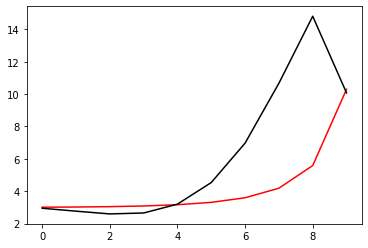

3819 1.1356848729325837 -1.0032541870814595
[ 2.94771692  2.76741812  2.59692902  2.65342008  3.19842179  4.53438325
  6.96907756 10.67091355 14.81618883 10.07586046]


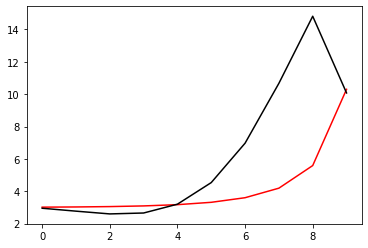

4020 1.1451274759330685 -1.0033946326153835
[ 2.95248676  2.77205973  2.60118485  2.65719806  3.20184735  4.53787013
  6.97348364 10.6780008  14.82929178 10.07605121]


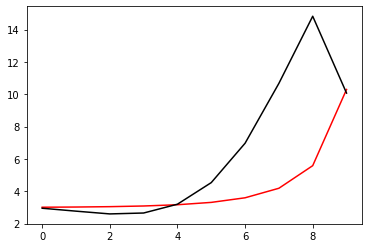

4221 2.1023299541021303 -1.0038524401240898
[ 2.95199039  2.77119072  2.59972034  2.65511236  3.19938389  4.53564531
  6.97267429 10.68070792 14.8388792  10.07620402]


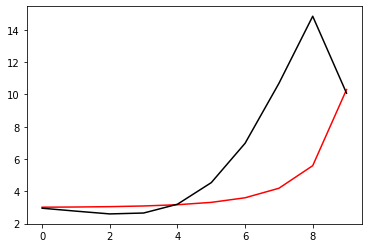

4422 1.823973014087196 -1.0035855586818585
[ 2.95159556  2.77050749  2.59851609  2.6533459   3.19727612  4.53377987
  6.97218221 10.68364567 14.8486089  10.07635277]


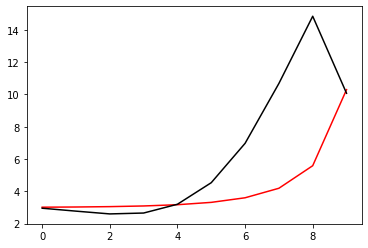

4623 0.14632335452621104 -1.003722768544429
[ 2.95324825  2.77191592  2.59943961  2.65372537  3.19729933  4.53397121
  6.97357612 10.68819559 14.85967359 10.07653479]


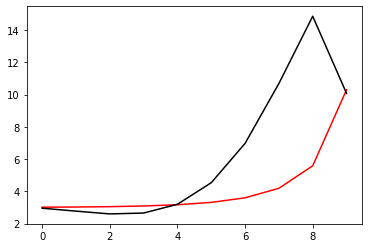

4824 0.147509863096188 -1.0034914187364392
[ 2.95391661  2.77233123  2.59936428  2.65310799  3.1963449   4.53323741
  6.97415228 10.69209254 14.87024762 10.07668695]


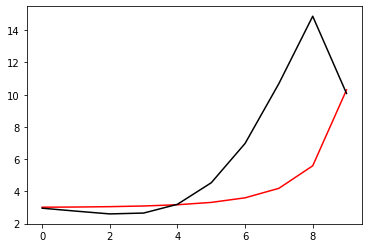

5025 0.14746379916565802 -1.0034233097593663
[ 2.95395029  2.77204698  2.59853447  2.65169928  3.19459461  4.53175861
  6.97411983 10.69560313 14.88065115 10.07686929]


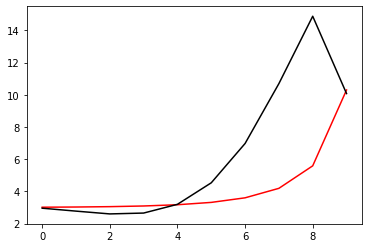

5226 2.1370374910526126 -1.0031769484598432
[ 2.95440779  2.7722417   2.59822995  2.65084625  3.19340472  4.53080323
  6.97451038 10.69937183 14.89114475 10.07702012]


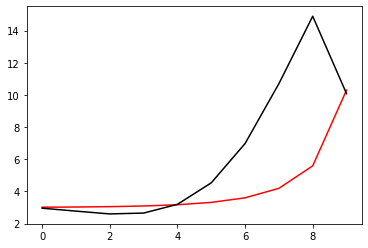

5427 0.14827157505420693 -1.004033089594052
[ 2.95603003  2.77347735  2.598856    2.65083408  3.19299733  4.530619
  6.97572651 10.70408287 14.90269167 10.07721499]


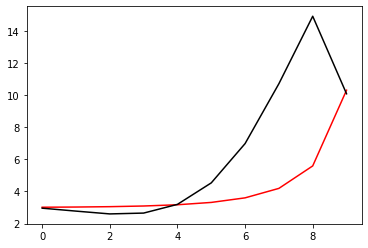

5628 0.14304323847623043 -1.003352351826653
[ 2.95560483  2.77285374  2.59779209  2.64926909  3.19112431  4.52898059
  6.97539233 10.70704373 14.91228715 10.07734705]


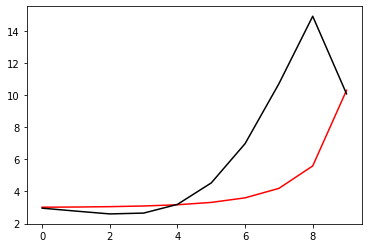

5829 1.143821020118822 -1.0035005276993945
[ 2.95701308  2.7739692   2.59838065  2.64928429  3.19078428  4.528868
  6.97663327 10.71168108 14.92365701 10.07754145]


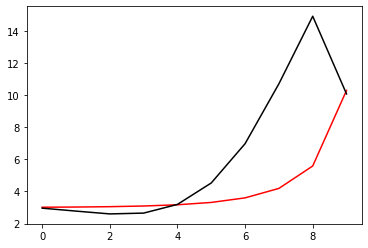

6030 1.1503493568875192 -1.003006679855008
[ 2.95724042  2.77393919  2.59785944  2.64822589  3.18940952  4.52776748
  6.97694847 10.71546941 14.93423926 10.07770193]


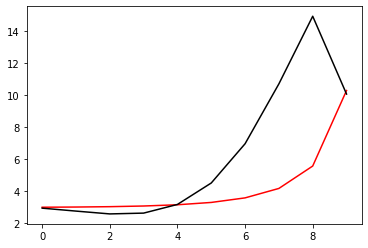

6231 2.1185873431559523 -1.0031949008261989
[ 2.95703136  2.77347545  2.59690633  2.64673748  3.18761021  4.52625734
  6.97688661 10.7189344  14.94455647 10.07787687]


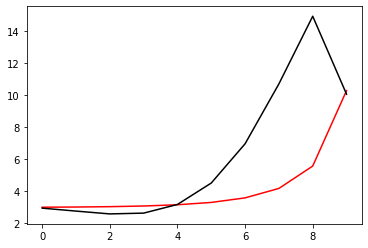

6432 1.780430342958854 -1.0032991368070783
[ 2.9576261   2.7738232   2.59677048  2.64607007  3.18663506  4.52557548
  6.97765789 10.72323459 14.95570382 10.0780318 ]


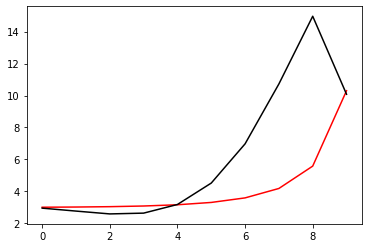

6633 0.1472692567153913 -1.003381172343925
[ 2.95816846  2.77413887  2.59662095  2.64540604  3.18568205  4.5249412
  6.97851425 10.7276675  14.9670224  10.07823113]


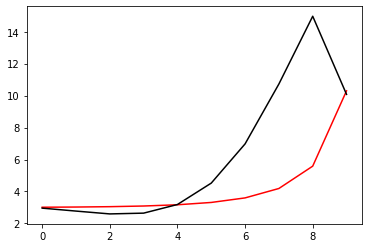

6834 0.14966547972225394 -1.0034843661266717
[ 2.95868399  2.77442789  2.59644494  2.64471738  3.18471259  4.52431226
  6.97941922 10.7322106  14.97850079 10.07839265]


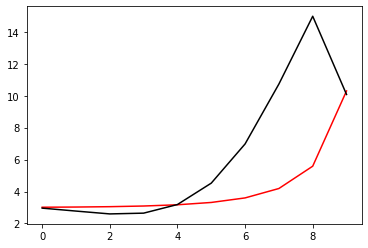

7035 0.15084467074477198 -1.003601621379958
[ 2.95916633  2.77466818  2.5962064   2.6439562   3.18366951  4.52362527
  6.98030682 10.73679819 14.99007107 10.07859331]


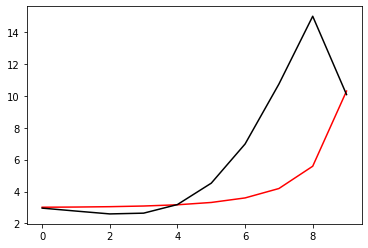

7236 2.1333793649994637 -1.0037068598674945
[ 2.95963207  2.77487827  2.59592595  2.64314459  3.18257449  4.52289751
  6.9811835  10.74141873 15.00170109 10.07875735]


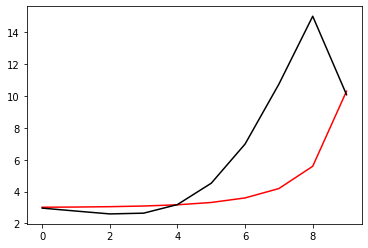

7437 0.14447529716280466 -1.0037956002490693
[ 2.96008744  2.77506713  2.59561517  2.64229603  3.18144084  4.52213829
  6.98204845 10.74605517 15.01335716 10.07896005]


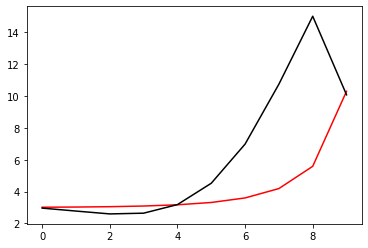

7638 0.14546168298042123 -1.0038711563587133
[ 2.96053246  2.77523698  2.59527844  2.64141652  3.18027485  4.52135161
  6.98289936 10.75069528 15.02501768 10.0791251 ]


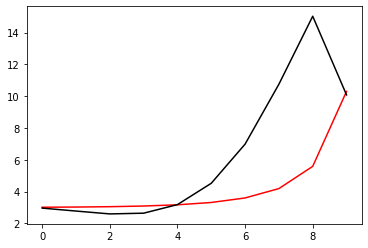

7839 1.150672272807044 -1.0039297126536653
[ 2.96096935  2.77539235  2.59492253  2.64051456  3.17908554  4.52054478
  6.98373864 10.75533377 15.03667092 10.07932611]


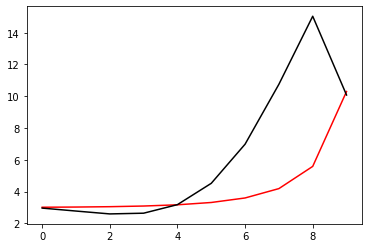

8040 1.1594116548545903 -1.0039658419429116
[ 2.9613971   2.77553378  2.59454931  2.63959298  3.17787585  4.5197193
  6.98456398 10.75996296 15.04830557 10.07949342]


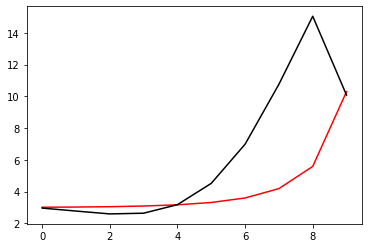

8241 2.0958866745457576 -1.004001979518956
[ 2.96179369  2.77563886  2.59413645  2.63863025  3.17662617  4.51885949
  6.98536698 10.76458534 15.05993557 10.07969033]


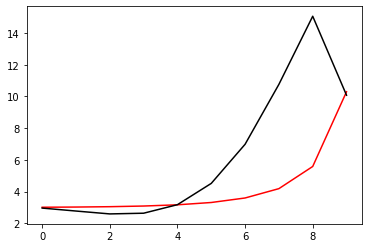

8442 1.749039174254739 -1.0038730013876616
[ 2.96237819  2.77592972  2.59390817  2.63785107  3.17555883  4.51818005
  6.98634607 10.76937402 15.07170961 10.07986199]


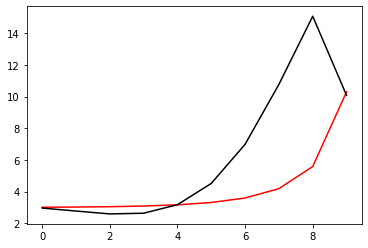

8643 0.1534870297604918 -1.0037434827143956
[ 2.96293043  2.77618739  2.59364685  2.63703944  3.17445992  4.51747043
  6.9872969  10.77413565 15.0834488  10.08006279]


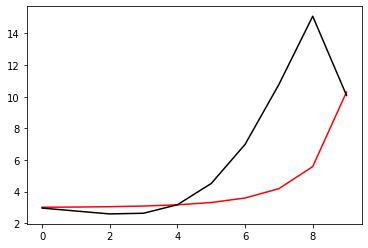

8844 0.15123409426229498 -1.0036278381355201
[ 2.96345752  2.77641852  2.59335874  2.63620125  3.17333498  4.51673566
  6.98822391 10.77887448 15.09515869 10.08022977]


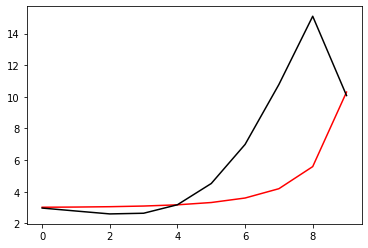

9045 0.15387987356234292 -1.003523064455829
[ 2.96396097  2.77662506  2.59304617  2.63533911  3.17218679  4.51597862
  6.98912999 10.78359374 15.10684414 10.08043205]


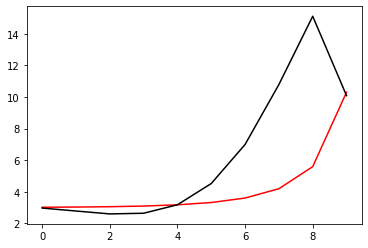

9246 2.13809902694351 -1.0034325816693048
[ 2.96444407  2.77681073  2.59271321  2.63445752  3.17102035  4.51520491
  6.99002171 10.78830161 15.11851579 10.08059731]


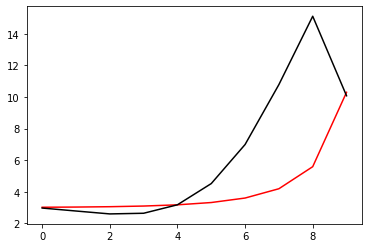

9447 0.14619560043221133 -1.0033523338800274
[ 2.9649122   2.77698125  2.59236585  2.63356254  3.16984154  4.51441985
  6.99090326 10.79300102 15.13017638 10.08079924]


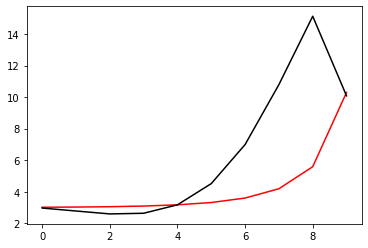

9648 0.14995155787707945 -1.003283367677883
[ 2.96536345  2.77713466  2.59200206  2.63265214  3.16864846  4.51362193
  6.99177406 10.79769308 15.14182951 10.08096525]


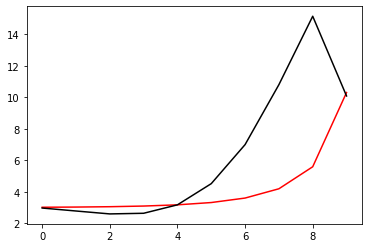

9849 1.148531592760959 -1.0032232063561741
[ 2.96580225  2.77727572  2.59162689  2.63173162  3.16744662  4.51281684
  6.99263994 10.80238396 15.15348227 10.081165  ]


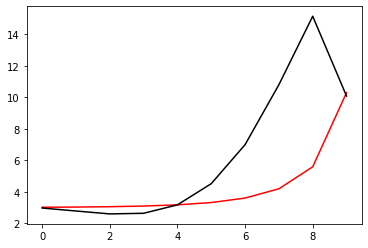

In [122]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.0853676727347543 -1.004006434284428
[ 2.96527834  2.77664904  2.59047253  2.6299479   3.16543627  4.511705
  6.99463169 10.81134784 15.17612657 10.08151012]


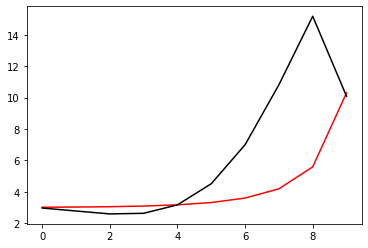

402 1.7255840638899471 -1.0038638910501205
[ 2.96610048  2.77720088  2.59054394  2.62950507  3.1647245   4.5113663
  6.99589618 10.8163664  15.18810929 10.08169281]


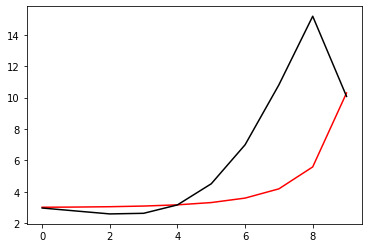

603 0.15540020701811158 -1.003733731039977
[ 2.96669709  2.77749799  2.59033272  2.62875783  3.16370082  4.51073525
  6.99693012 10.82125575 15.20005034 10.08189707]


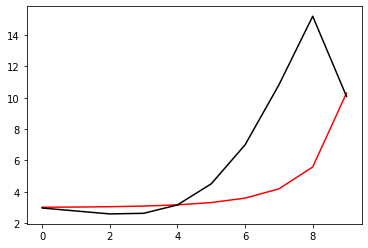

804 0.15295610288271239 -1.003619379546567
[ 2.9672355   2.77772886  2.590048    2.62793171  3.16259704  4.51003061
  6.99790813 10.82611415 15.21197182 10.08206637]


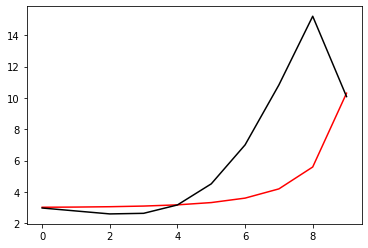

1005 0.155545881024576 -1.003515574033703
[ 2.96774133  2.77792445  2.58972586  2.62706701  3.16145546  4.50929263
  6.99886229 10.83096066 15.22388296 10.08227498]


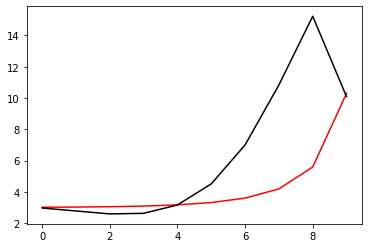

1206 2.1386111443968105 -1.0034255752410515
[ 2.96822352  2.77809553  2.58937893  2.62617801  3.16029152  4.50853695
  6.9998073  10.8358087  15.23579789 10.0824421 ]


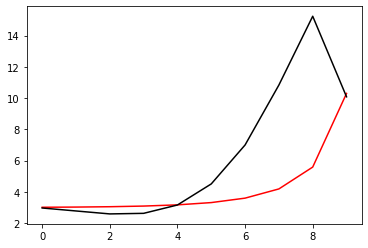

1407 0.14799684527217707 -1.0033453494452826
[ 2.96868927  2.7782501   2.58901595  2.625274    3.15911456  4.50777219
  7.00074996 10.84066288 15.24772076 10.08265254]


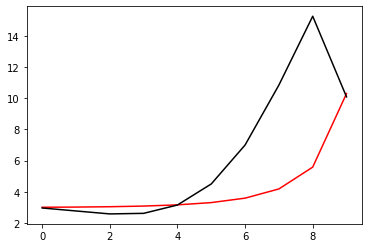

1608 0.15152433469203785 -1.0032759527180228
[ 2.96913757  2.77838724  2.5886361   2.62435433  3.1579242   4.50699833
  7.00169099 10.84552555 15.25965659 10.08282251]


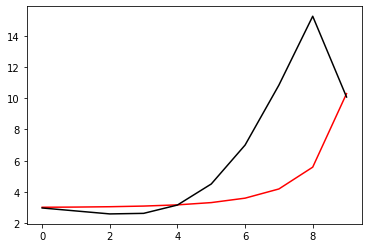

1809 1.150129148022858 -1.0032150706124254
[ 2.96957289  2.77851172  2.5882445   2.62342445  3.15672616  4.50622128
  7.00263649 10.85040338 15.27161335 10.08302535]


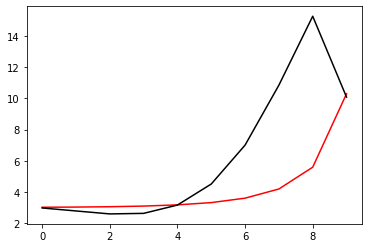

2010 1.15317832222077 -1.0031623746004872
[ 2.96999318  2.77862123  2.58783864  2.62248174  3.15551785  4.50543876
  7.003585   10.85529662 15.28359365 10.08319911]


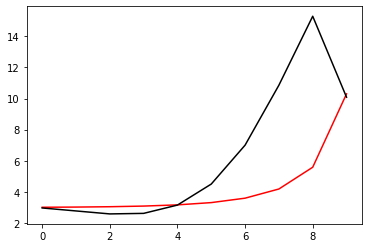

2211 2.112543986017549 -1.003127227359416
[ 2.97037311  2.77868886  2.58739049  2.62149797  3.15427247  4.50462821
  7.00452306 10.86020614 15.29561246 10.08340108]


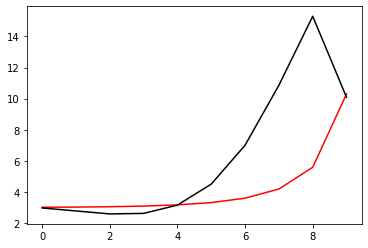

2412 1.6722563159187729 -1.0032560183213144
[ 2.97085415  2.7788563   2.5870424   2.62061668  3.15313556  4.50393859
  7.0056047  10.86529126 15.30783118 10.08358071]


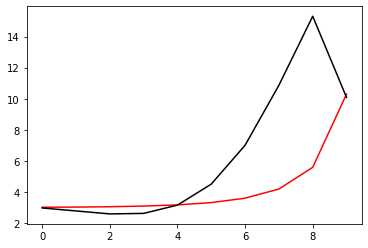

2613 0.15404541841853367 -1.003374731898446
[ 2.97131144  2.77900019  2.58667161  2.6197143   3.15198027  4.50323549
  7.00668178 10.87038583 15.32007049 10.08378893]


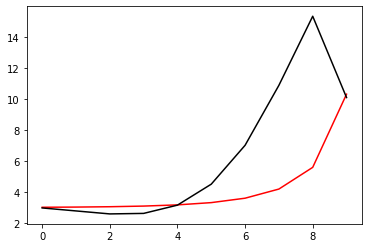

2814 0.15569647422224986 -1.003485673829301
[ 2.97174613  2.77912138  2.58627876  2.61879133  3.15080715  4.5025198
  7.00775607 10.87549326 15.3323356  10.08396486]


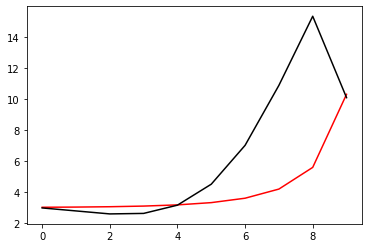

3015 0.1572613606075985 -1.0035859784320262
[ 2.97216264  2.77922442  2.58586851  2.61785262  3.14962126  4.50179687
  7.00883333 10.88061999 15.3446337  10.08417689]


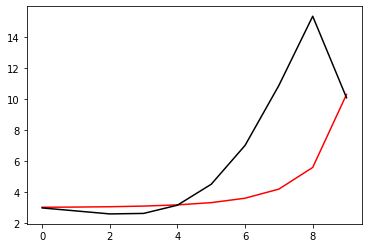

3216 2.13600144534271 -1.0036785983383982
[ 2.97256527  2.7793137   2.58544547  2.61690311  3.14842811  4.50107318
  7.00992177 10.88577668 15.35697765 10.08435234]


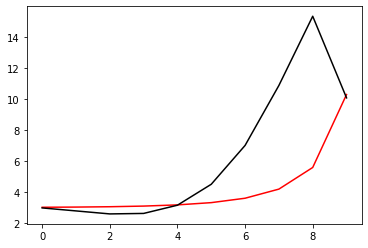

3417 0.15124989043248677 -1.003758817129286
[ 2.97295905  2.77939438  2.58501485  2.615948    3.14723275  4.50035332
  7.01102508 10.89096587 15.36936902 10.08456647]


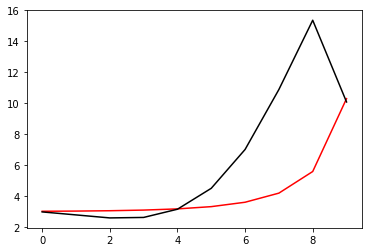

3618 0.15195564510068743 -1.0038283586460304
[ 2.97334426  2.77946651  2.58457657  2.61498719  3.1460352   4.4996378
  7.01214484 10.89619087 15.38181285 10.08474395]


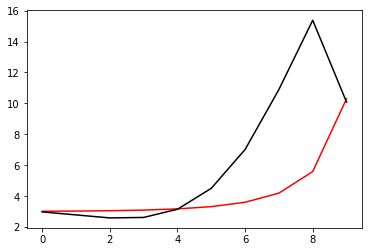

3819 1.1571376933784991 -1.003882574961441
[ 2.97372237  2.77953173  2.58413245  2.61402272  3.14483785  4.49892948
  7.01328469 10.9014565  15.394315   10.08495834]


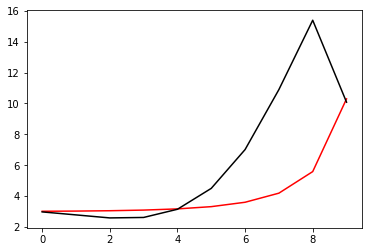

4020 1.167125967645222 -1.0039146716647263
[ 2.97409265  2.779589    2.58368118  2.61305309  3.14363908  4.4982268
  7.01444344 10.90676244 15.40687606 10.0851401 ]


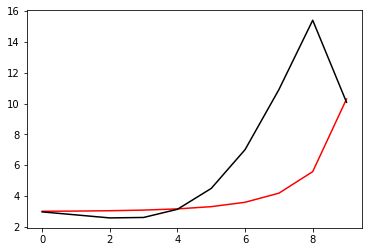

4221 2.0672146997137943 -1.003950651529497
[ 2.97441902  2.77959957  2.58318216  2.6120374   3.14240043  4.49749868
  7.01560567 10.9121177  15.41952814 10.08535321]


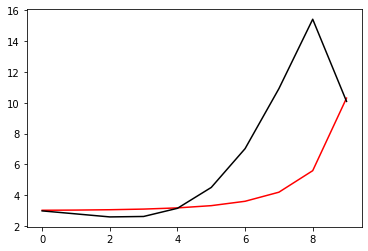

4422 1.667882365491501 -1.0038293165564733
[ 2.97493823  2.77980233  2.58287558  2.61121559  3.14135882  4.49697366
  7.01698156 10.91770094 15.43241541 10.08554246]


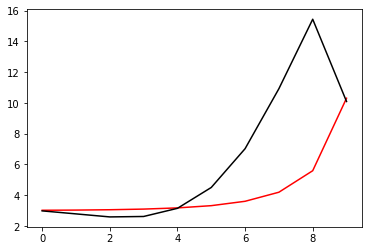

4623 0.15929838771329066 -1.0037059050354287
[ 2.97542811  2.77997571  2.58254064  2.61036795  3.14029623  4.49643687
  7.01836314 10.92331809 15.44536171 10.0857621 ]


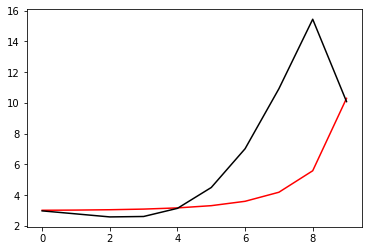

4824 0.15629412084125494 -1.0035941001235227
[ 2.97589366  2.78012385  2.58218077  2.60949743  3.13921547  4.49589154
  7.01975499 10.92897604 15.45837603 10.08594986]


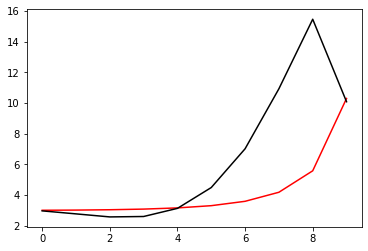

5025 0.15879356269381598 -1.003490999845596
[ 2.97633653  2.78024824  2.58179739  2.6086055   3.13811821  4.49533987
  7.02116038 10.93467989 15.471465   10.08617398]


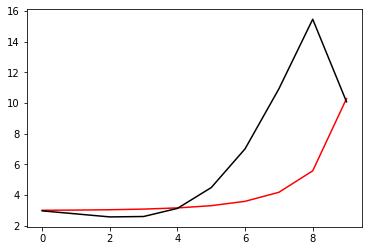

5226 2.1389068310159423 -1.0034010197748926
[ 2.97675888  2.78035096  2.58139261  2.60769453  3.1370075   4.49478631
  7.02258646 10.94044078 15.48464316 10.08636319]


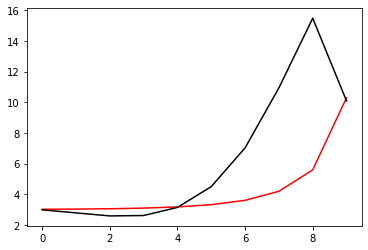

5427 0.15167199916689275 -1.0033203511278865
[ 2.97716577  2.78043707  2.58097149  2.60676955  3.13588827  4.49423552
  7.02403745 10.94626237 15.49791348 10.08659034]


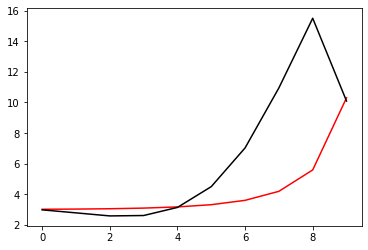

5628 0.15466437687326778 -1.0032499463374787
[ 2.97755577  2.78050486  2.58053209  2.60582859  3.13475879  4.49368658
  7.02551414 10.95214837 15.51128222 10.08678336]


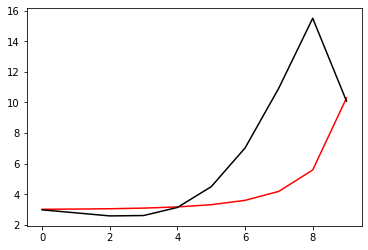

5829 1.1534475760338456 -1.0031876907362833
[ 2.97793245  2.78055794  2.58007817  2.60487561  3.13362341  4.49314449
  7.02702281 10.95810692 15.5247589  10.08701199]


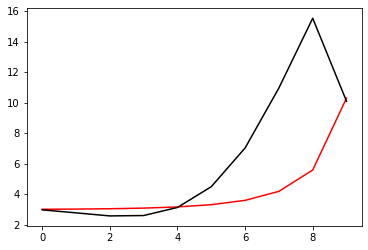

6030 1.1563961021153326 -1.0031330605622357
[ 2.97829394  2.78059409  2.57960722  2.60390801  3.13247971  4.49260755
  7.02856341 10.96414082 15.53834879 10.0872111 ]


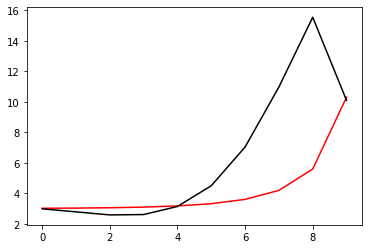

6231 2.0920397656917245 -1.0030983043304302
[ 2.97860562  2.78057649  2.57908089  2.60288718  3.13129107  4.49204525
  7.03011886 10.97025464 15.55207701 10.08744019]


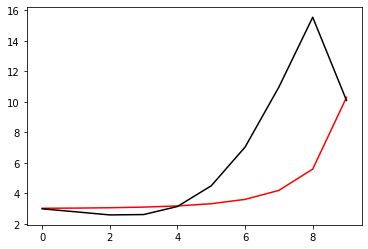

6432 1.6207417742588812 -1.0032284631586212
[ 2.97900856  2.7806469   2.57864198  2.6019574   3.13020396  4.49160744
  7.03184355 10.9766061  15.56609917 10.08764795]


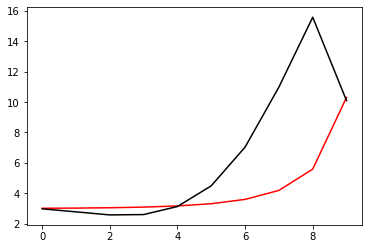

6633 0.157210467386588 -1.0033475496100663
[ 2.97938897  2.78069293  2.57817862  2.60100584  3.12910203  4.49116969
  7.03359825 10.98303657 15.58024252 10.08788613]


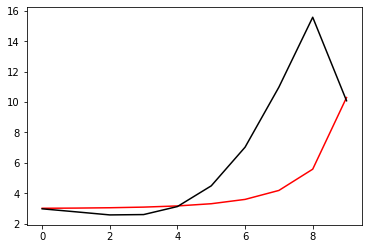

6834 0.15875864032304424 -1.0034578757748907
[ 2.97974758  2.78071499  2.57769097  2.60003264  3.12798574  4.4907334
  7.03538643 10.98955301 15.5945169  10.08809377]


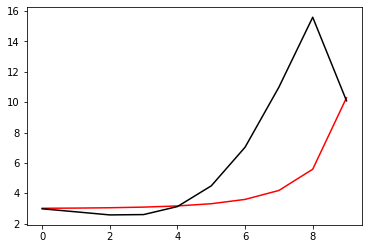

7035 0.1609398631495735 -1.003556540316047
[ 2.98008832  2.78071701  2.57718305  2.59904207  3.12685978  4.49030415
  7.03721543 10.99616545 15.60893417 10.08833902]


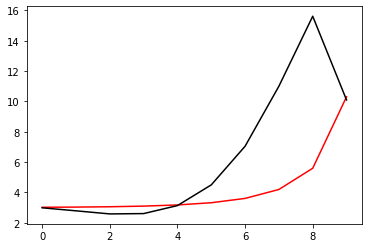

7236 2.135898349691799 -1.0036471011919326
[ 2.98041403  2.78070179  2.57665781  2.5980375   3.12572852  4.48988823
  7.03909523 11.00288952 15.62351435 10.08854982]


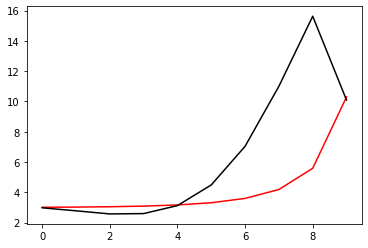

7437 0.1559191100150898 -1.0037248012274431
[ 2.98072948  2.78067413  2.57612006  2.59702377  3.12459684  4.4894906
  7.04103109 11.00973108 15.6382632  10.08880103]


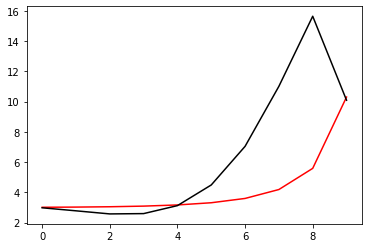

7638 0.15660527040923206 -1.003791216779247
[ 2.98103486  2.7806339   2.5755695   2.59600068  3.123465    4.48911274
  7.0430271  11.01669858 15.65319254 10.08901758]


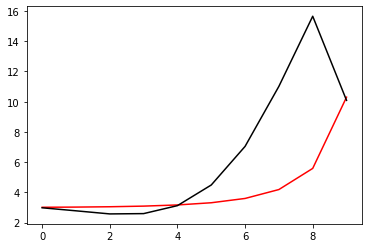

7839 1.1616723363268888 -1.0038420431256383
[ 2.98133097  2.78058192  2.57500708  2.59496947  3.12233489  4.48875782
  7.04508905 11.02380193 15.6683152  10.08927345]


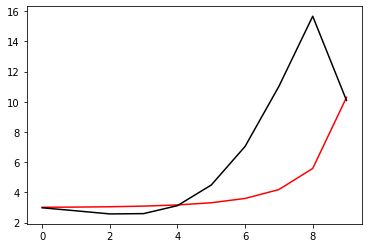

8040 1.1727463551871253 -1.0038696855969595
[ 2.98161726  2.78051724  2.57443154  2.59392882  3.12120541  4.4884256
  7.04721879 11.03104674 15.68363949 10.08949834]


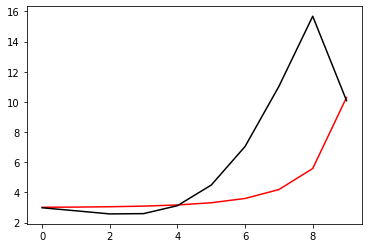

8241 2.0209583320917406 -1.003906351281907
[ 2.98183913  2.78038157  2.57378209  2.59281758  3.12001902  4.48806943
  7.04939393 11.0384506  15.69922038 10.08975793]


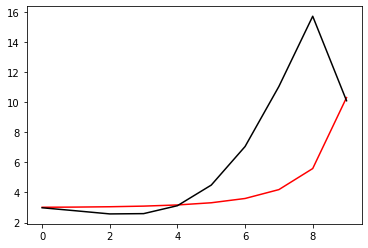

8442 1.6296074573676262 -1.0037876873858194
[ 2.98224993  2.78043056  2.57331582  2.59189278  3.11902979  4.48793472
  7.0518393  11.04619919 15.71519673 10.0899957 ]


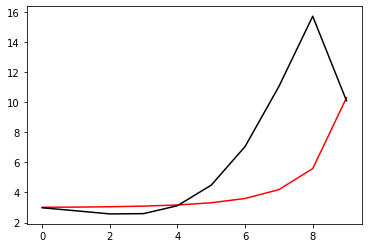

8643 0.16316703492725115 -1.0036668979121648
[ 2.98263054  2.78044608  2.57281571  2.59093861  3.1180234   4.48780965
  7.05434972 11.05410386 15.73140237 10.0902666 ]


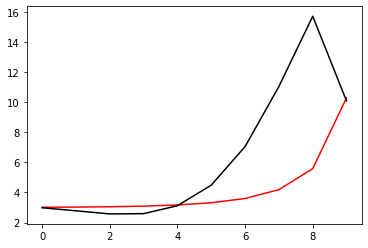

8844 0.15981950159824787 -1.0035566847421271
[ 2.98298398  2.7804304   2.5722835   2.58995673  3.11700208  4.48769823
  7.05693339 11.06217998 15.74785789 10.09050877]


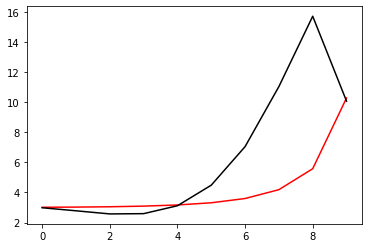

9045 0.16238425985398175 -1.0034538790764793
[ 2.98331177  2.7803847   2.57172026  2.58894838  3.11596773  4.48760406
  7.05959772 11.0704414  15.76458143 10.09078981]


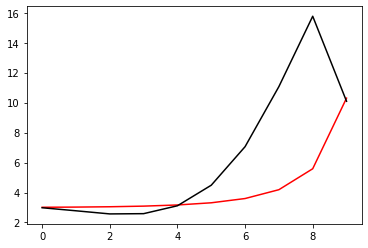

9246 2.1369435997240505 -1.003363564454051
[ 2.98361447  2.78030926  2.57112625  2.5879143   3.11492243  4.48753226
  7.06235423 11.07891    15.78160238 10.09103987]


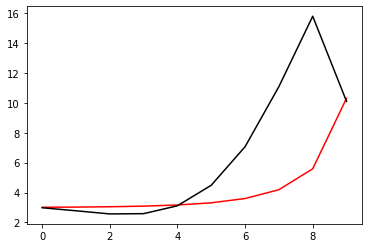

9447 0.15592055680721872 -1.0032818887485242
[ 2.9838968   2.78020863  2.57050592  2.58685905  3.11387113  4.48748863
  7.06521102 11.08759807 15.79893473 10.09133072]


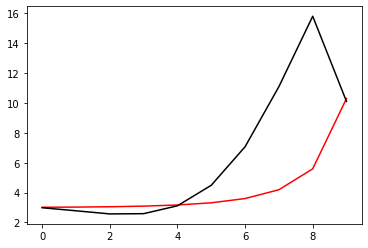

9648 0.15814934609767783 -1.0032095495556688
[ 2.98415755  2.78008111  2.56985738  2.58578091  3.11281293  4.48747449
  7.06817449 11.09652077 15.81659952 10.09159155]


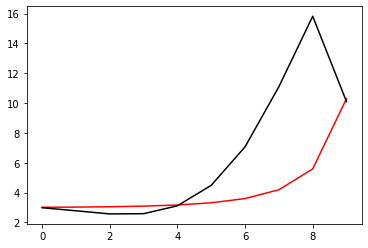

9849 1.1572546161277144 -1.0031447125920077
[ 2.98439907  2.77992886  2.56918279  2.58468243  3.11175139  4.48749569
  7.07125558 11.10569768 15.83462135 10.09189178]


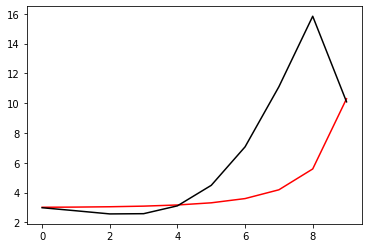

In [123]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 2.0340553880833103 -1.0030234460530127
[ 2.98416332  2.77908128  2.56751328  2.58238209  3.1096499   4.48748814
  7.07705078 11.1231925  15.8695819  10.0924303 ]


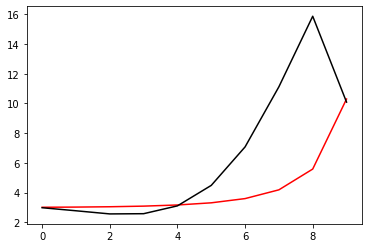

402 1.5835236311056238 -1.0031786576739032
[ 2.98465758  2.77918442  2.56711967  2.58161278  3.10898809  4.48802753
  7.08092409 11.1336689  15.88906855 10.0927431 ]


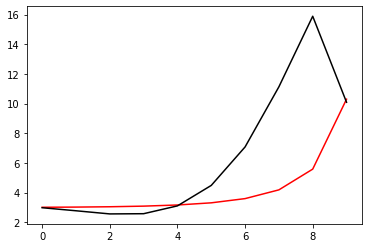

603 0.16055813199085378 -1.0032998878167152
[ 2.98487513  2.77899075  2.56641241  2.58052108  3.10801083  4.48828931
  7.08461797 11.14415649 15.90878618 10.09306508]


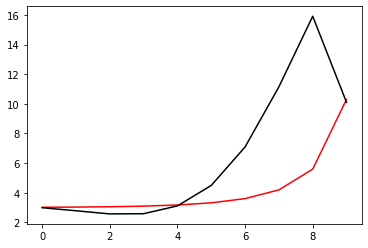

804 0.1620063863061405 -1.0034080202824227
[ 2.98504253  2.77873615  2.56563791  2.57936506  3.10698886  4.48855859
  7.0884345  11.15496    15.92898274 10.09335594]


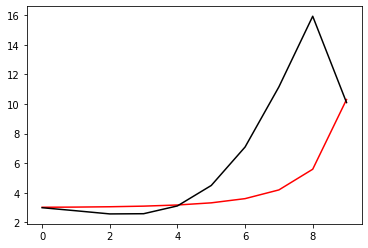

1005 0.16525418751602136 -1.003502427972865
[ 2.9851814   2.77844356  2.564821    2.57817192  3.105952    4.48886849
  7.09241303 11.16612675 15.94969361 10.09370146]


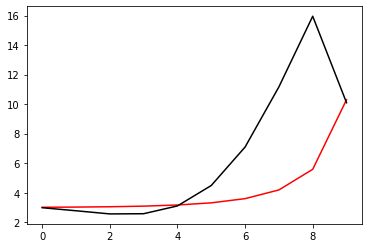

1206 2.1314324307199537 -1.003587966775068
[ 2.98529445  2.77811575  2.56396513  2.57694644  3.10490723  4.48923017
  7.09657421 11.17769332 15.97095735 10.09401916]


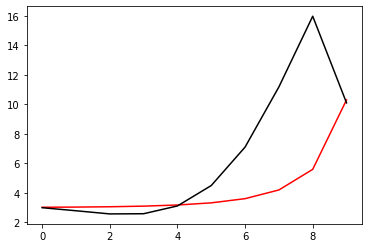

1407 0.16169991847533907 -1.0036598425917895
[ 2.98538647  2.77775744  2.56307519  2.57569401  3.10386075  4.48965139
  7.10093046 11.189681   15.99279324 10.0943777 ]


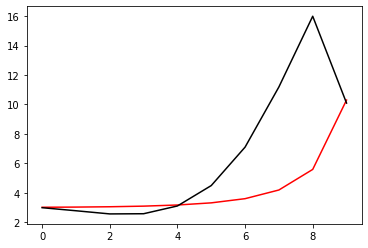

1608 0.16260811516762497 -1.0037192241216248
[ 2.98545708  2.77736779  2.56215032  2.57441424  3.10281342  4.49013596
  7.10549351 11.20211627 16.01523126 10.09472094]


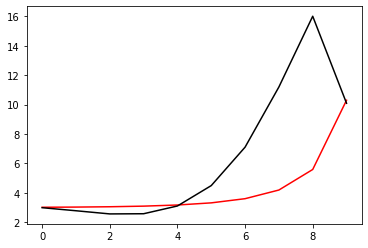

1809 1.16673436546017 -1.0037629255115421
[ 2.98550599  2.77694618  2.56118996  2.57310716  3.1017665   4.49068812
  7.11027564 11.21502646 16.03830196 10.09510141]


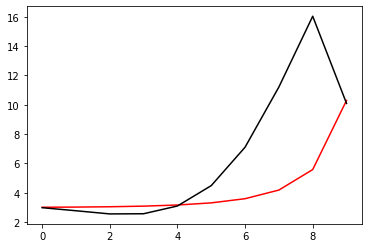

2010 1.179574611766468 -1.0037817876816852
[ 2.98553309  2.77649194  2.56019318  2.57177198  3.10071999  4.49131008
  7.11528597 11.22843438 16.06202978 10.09545428]


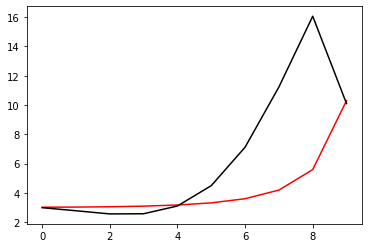

2211 1.8735153080893021 -1.003821981554437
[ 2.98544976  2.77591152  2.55906326  2.57031171  3.09958168  4.49192503
  7.12048737 11.24237824 16.08651303 10.09585955]


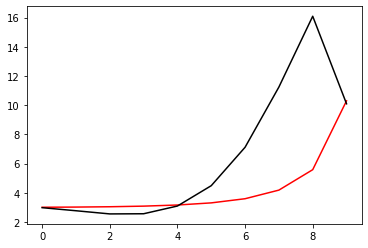

2412 1.6385169316694306 -1.0037044845694645
[ 2.98552822  2.77547908  2.55807557  2.56900164  3.09862431  4.49279779
  7.12612358 11.25704953 16.11185961 10.09624197]


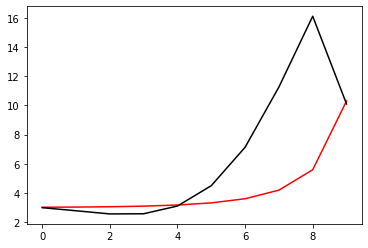

2613 0.16761540736453984 -1.0035851807705622
[ 2.98556727  2.77499593  2.55703365  2.56764675  3.09765273  4.49373125
  7.1319979  11.27226813 16.13791048 10.09666522]


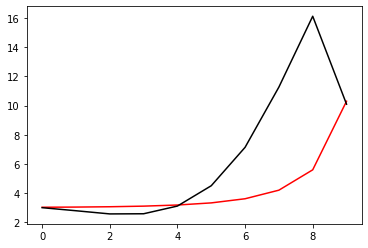

2814 0.16428218038332576 -1.003474656035008
[ 2.98557076  2.77446553  2.55594076  2.56625021  3.09667013  4.49472919
  7.13811806 11.28805081 16.16467649 10.09707794]


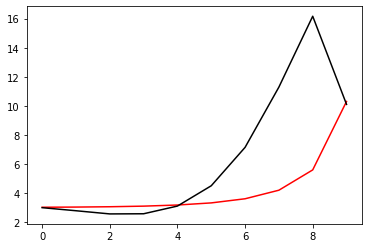

3015 0.16732709681430563 -1.003368918691213
[ 2.98554286  2.77389209  2.55480108  2.56481605  3.09568004  4.49579429
  7.14448727 11.30440402 16.19215315 10.09752252]


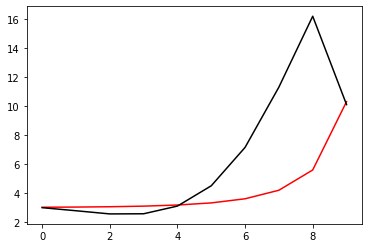

3216 2.124476936663565 -1.003274395179089
[ 2.98548443  2.77327662  2.55361581  2.56334555  3.09468353  4.49692735
  7.15110788 11.32133469 16.22033778 10.09794572]


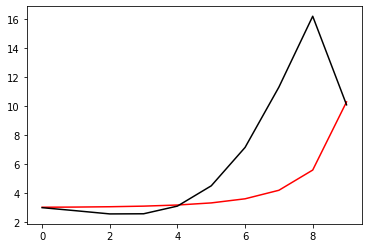

3417 0.16215129476639614 -1.0031867156326464
[ 2.98540583  2.77263008  2.55239603  2.56184906  3.09368864  4.4981311
  7.15797277 11.33882068 16.24918391 10.09841777]


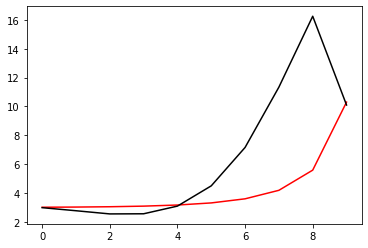

3618 0.1632907026306015 -1.0031059889519458
[ 2.98531277  2.77195876  2.55114814  2.56033224  3.0926987   4.49940351
  7.16506968 11.35683357 16.27864044 10.09886981]


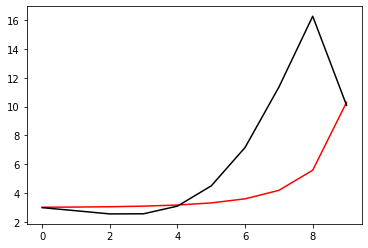

3819 1.1629854036287113 -1.0030310484834801
[ 2.98521332  2.77127151  2.54988114  2.55880315  3.09171886  4.50074286
  7.17238243 11.37533314 16.30864098 10.09935942]


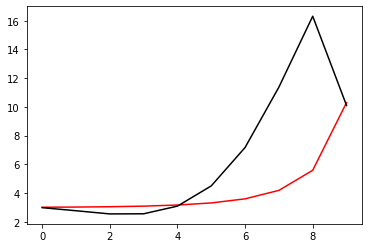

4020 1.165614589422899 -1.0029602694487882
[ 2.98511531  2.77057686  2.54860346  2.55726889  3.0907525   4.50214403
  7.17988731 11.3942641  16.3391025  10.09982629]


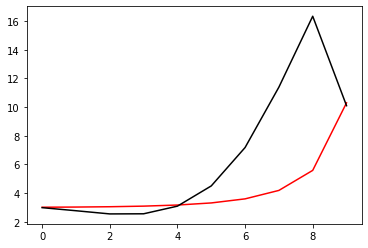

4221 1.7972963670686584 -1.0029341384767463
[ 2.98493383  2.76978645  2.54722377  2.55563589  3.08970526  4.50351477
  7.1875023  11.41357342 16.37000723 10.10032569]


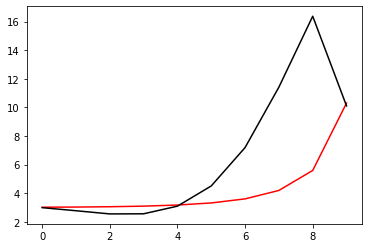

4422 1.5915293557510757 -1.0030611901309938
[ 2.98487276  2.76910681  2.54595     2.55411162  3.08878074  4.50504699
  7.19538515 11.43333583 16.4013387  10.10080708]


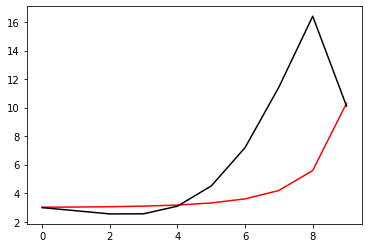

4623 0.16697055303128305 -1.0031763978438952
[ 2.98483433  2.76844266  2.54468734  2.55259838  3.08787219  4.50661199
  7.20335867 11.4533024  16.43282376 10.10131673]


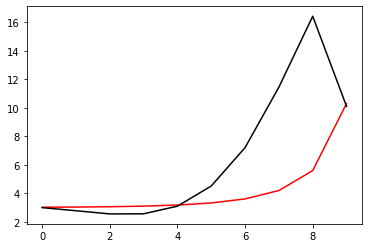

4824 0.16906523741270763 -1.0032816445354191
[ 2.98482614  2.76780107  2.54344154  2.55109947  3.08697837  4.50819897
  7.21138933 11.47339962 16.46437312 10.10179891]


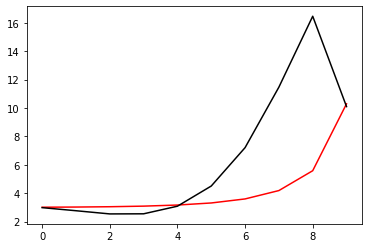

5025 0.1757478738874705 -1.0033744559235291
[ 2.98485769  2.76719035  2.54221914  2.54961878  3.08609872  4.50979854
  7.21944665 11.49355973 16.49590794 10.10231062]


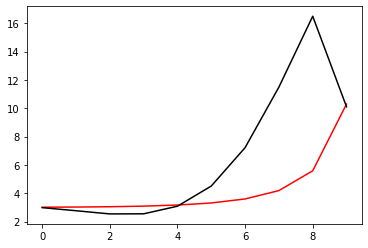

5226 2.1050299863872133 -1.00346128514635
[ 2.98492691  2.76660709  2.54101501  2.54814909  3.0852233   4.51139595
  7.22750409 11.51373589 16.52738492 10.10279067]


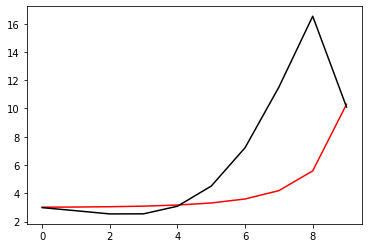

5427 0.17435031603113144 -1.0035356076556945
[ 2.98504476  2.76606078  2.53983657  2.54669497  3.08435224  4.51298274
  7.23553269 11.53386354 16.55873283 10.10329945]


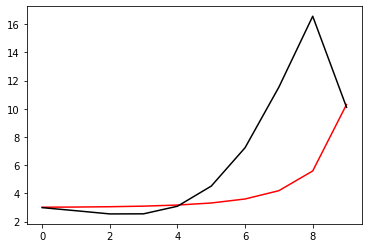

5628 0.17618942538334192 -1.0035974147042726
[ 2.98521291  2.76555126  2.53868159  2.5452518   3.083478    4.51454657
  7.24350862 11.55389958 16.58991419 10.10377441]


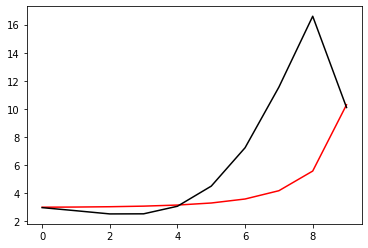

5829 1.1776499869681825 -1.0036450044634655
[ 2.98542984  2.7650753   2.53754484  2.5438123   3.08259099  4.51607436
  7.25141041 11.57380913 16.62090361 10.10427702]


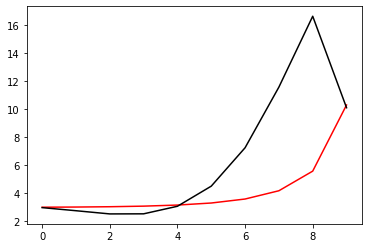

6030 1.2016291317704921 -1.0036612423119826
[ 2.98569979  2.76463538  2.53642685  2.54237488  3.08168725  4.5175586
  7.259222   11.59356188 16.65167783 10.10474661]


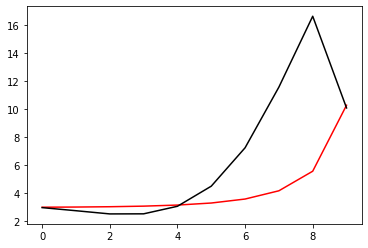

6231 1.5132225783958555 -1.003695509390449
[ 2.98593382  2.76413775  2.53523002  2.54084011  3.08066914  4.51891078
  7.26688096 11.61315496 16.68230562 10.10524133]


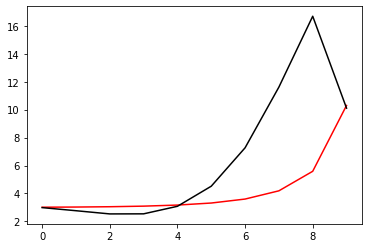

6432 1.6299403879336418 -1.0035670759561277
[ 2.98638978  2.76383977  2.53421054  2.53946238  3.07978817  4.5203757
  7.27460756 11.63273015 16.71283907 10.10571081]


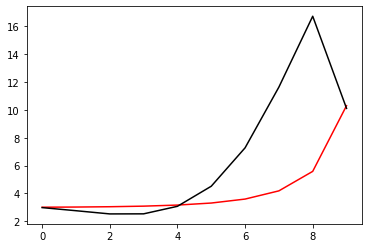

6633 0.18008232325636986 -1.003437252313185
[ 2.986884    2.76356103  2.53319017  2.53806395  3.07886424  4.5217655
  7.28219805 11.6520799  16.74311724 10.10620084]


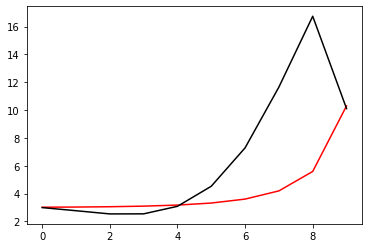

6834 0.178580777144266 -1.0033147813507761
[ 2.98741639  2.76330063  2.53216699  2.53664196  3.07789375  4.52307591
  7.28964624 11.6711944  16.77313883 10.10666063]


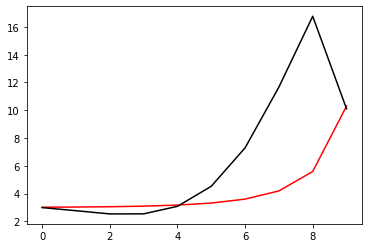

7035 0.18645007492888577 -1.003198709924595
[ 2.98799079  2.7630613   2.53114249  2.53519676  3.07687603  4.52430515
  7.29694733 11.69006307 16.80289841 10.10714449]


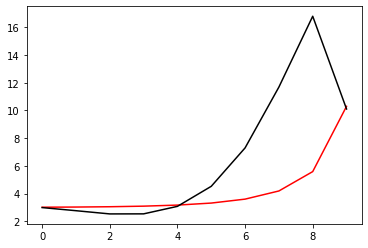

7236 2.0855218389270154 -1.0030972740835176
[ 2.98859112  2.76282703  2.53010067  2.53371273  3.07579685  4.5254425
  7.30409822 11.70869618 16.83242413 10.10759312]


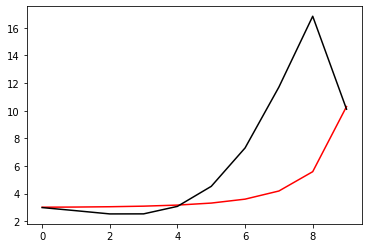

7437 0.17744870714658817 -1.0030046548224667
[ 2.98922722  2.76260778  2.52905102  2.53219838  3.07466284  4.52649055
  7.31109118 11.72706609 16.86168088 10.1080693 ]


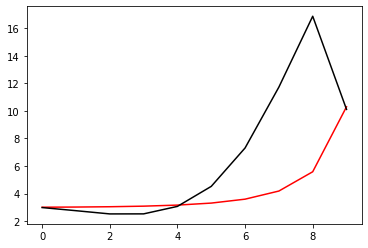

7638 0.17875110924931864 -1.002921164593345
[ 2.9898976   2.76240199  2.52799161  2.53065131  3.07347125  4.52744619
  7.31792177 11.74516482 16.8906639  10.10850506]


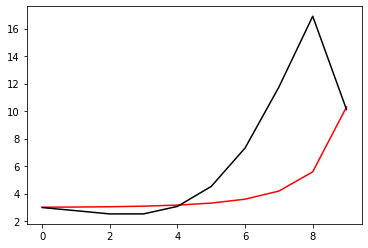

7839 1.1778413582825675 -1.0028470711766833
[ 2.99060186  2.7622092   2.5269216   2.52907036  3.07222064  4.52830784
  7.32458757 11.76298695 16.91937001 10.10897139]


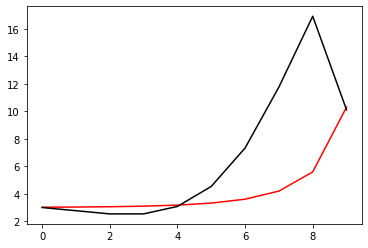

8040 1.1821633937438503 -1.0027795817348064
[ 2.99133952  2.76202914  2.52584061  2.52745484  3.07091014  4.52907445
  7.33108652 11.78052696 16.94779461 10.10940207]


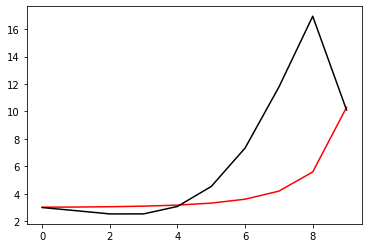

8241 1.5275816808714482 -1.0027589193039672
[ 2.9920216   2.76176821  2.52465141  2.52570612  3.06944363  4.52966089
  7.33736494 11.79779911 16.97601697 10.10986675]


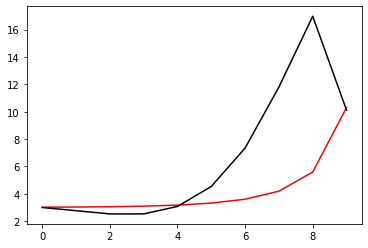

8442 1.4796322649147213 -1.0029026733182649
[ 2.99280847  2.76159051  2.52352093  2.52399313  3.06799108  4.53023572
  7.34357951 11.81491132 17.00407913 10.11029627]


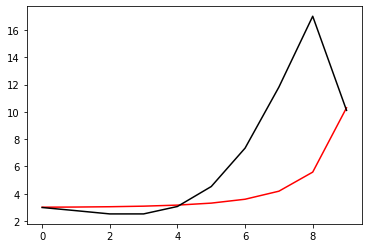

8643 0.18353160074310018 -1.0030317181434771
[ 2.99362791  2.76142659  2.52238099  2.52224702  3.06647968  4.53071553
  7.34962255 11.83172179 17.03183502 10.11074459]


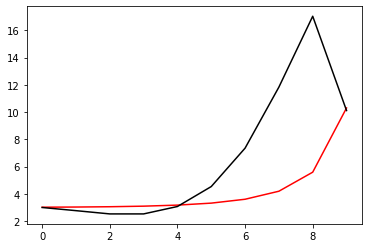

8844 0.18725550440920052 -1.0031481029213192
[ 2.99447916  2.76127615  2.52123135  2.52046755  3.06490944  4.53110112
  7.35549618 11.84823273 17.05928706 10.1111591 ]


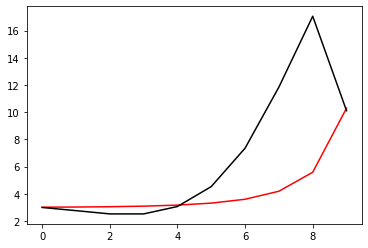

9045 0.19958772579061754 -1.0032563323124661
[ 2.99537992  2.76115558  2.52008704  2.51866865  3.06329357  4.53140546
  7.36121286 11.86445225 17.08643792 10.11160728]


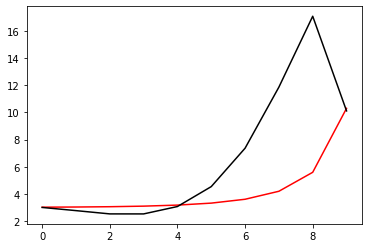

9246 2.0519817144095422 -1.003357837141921
[ 2.99629727  2.76103467  2.51892013  2.51682504  3.06161093  4.53161545
  7.36677682 11.88041379 17.11334157 10.11201327]


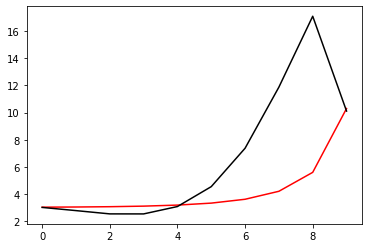

9447 0.19369306902959255 -1.0034432158627533
[ 2.99724686  2.76093058  2.51774841  2.51495421  3.05987745  4.53174277
  7.37218843 11.89609376 17.13995557 10.11244726]


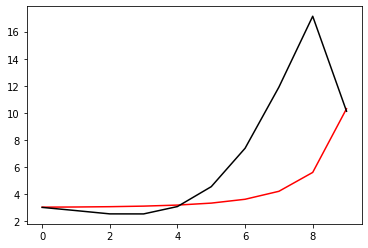

9648 0.19602207831387597 -1.003512448181493
[ 2.99822684  2.76084257  2.51657176  2.5130566   3.05809433  4.53179003
  7.37745267 11.91149858 17.16628529 10.11284791]


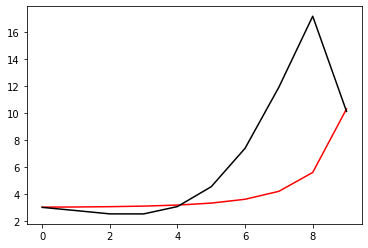

9849 1.1929066350491497 -1.0035653900124382
[ 2.9992292   2.76076371  2.51538394  2.51112658  3.05625689  4.53175442
  7.38257043 11.92663359 17.19233767 10.11327249]


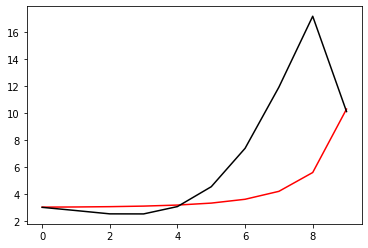

In [124]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

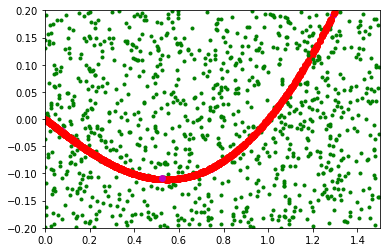

In [125]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, Negative[i])
for i in range (10):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()